# Исследование объявлений о продаже квартир

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Цель - научиться определять рыночную стоимость объектов недвижимости. Задача проекта — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных.

## Изучение данных из файла

In [1]:
# импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# открытие файла
df = pd.read_csv('/content/real_estate_data.csv', sep='\t')

# функция для изучения данных
def open_info(data):
    # вывод 5 строк данных
    print('*******************************************************')
    print('Представление датафрейма')
    display(data.head())
    print('*******************************************************')
    # вывод информации о датафрейме
    print('Общая информация о датафрейме')
    print('')
    print(data.info())
    print('*******************************************************')
    # вывод информации о распределении данных
    print('Распределение данных')
    display(data.describe())
    print('*******************************************************')
    # проверка на наличие дубликатов
    print('Дубликаты:', data.duplicated().sum())
    print('*******************************************************')
    # проверка на наличие пропусков
    print('Пропуски:', data.isnull().sum())
    
open_info(df)

*******************************************************
Представление датафрейма


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


*******************************************************
Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-nu

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*******************************************************
Дубликаты: 0
*******************************************************
Пропуски: total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


### Вывод

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Общие сведения  
    
В файле 22 столбца и 23699 строк. Соответственно в таблице представлены данные по 23699 объектам.  

**Информация по данным в столбцах**  
•	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
•	balcony — число балконов  
•	ceiling_height — высота потолков (м)  
•	cityCenters_nearest — расстояние до центра города (м)  
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
•	first_day_exposition — дата публикации  
•	floor — этаж  
•	floors_total — всего этажей в доме  
•	is_apartment — апартаменты (булев тип)  
•	kitchen_area — площадь кухни в квадратных метрах (м²)  
•	last_price — цена на момент снятия с публикации  
•	living_area — жилая площадь в квадратных метрах(м²)  
•	locality_name — название населённого пункта  
•	open_plan — свободная планировка (булев тип)  
•	parks_around3000 — число парков в радиусе 3 км  
•	parks_nearest — расстояние до ближайшего парка (м)  
•	ponds_around3000 — число водоёмов в радиусе 3 км  
•	ponds_nearest — расстояние до ближайшего водоёма (м)  
•	rooms — число комнат  
•	studio — квартира-студия (булев тип)  
•	total_area — площадь квартиры в квадратных метрах (м²)  
•	total_images — число фотографий квартиры в объявлении  

**Тип данных**  
17 столбцов с количественными данными: 3 с целочисленными: 'total_images', 'rooms', 'floor' - 14 с вещественными: 'last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'. 3 столбца с категориальными данными: 'first_day_exposition', 'is_apartment', 'locality_name'. 2 столбца с логическим типом данных: 'is_apartment', 'open_plan'.

После предварительного анализа материала отметим следующее.
В датафрейме представлены квартиры площадью от 12 кв.м до 900 кв.м, среди квартиры-студии, квартиры свободной планировки и типовые квартиры от 1 до 19 комнат. Этажность домов, в которых находятся квартиры от 1 этажа до 60 этажей.

Что кажется странным - высота потолков от 1 м до 100 м. Это выглядит аномальным. Представлены квартиры с жилой площадью начинаю от 2 кв.м, что тоже необычно. Как и кухня площадью 1.3 кв.м. Возможно, имеют место ошибки при загразке данных - 2 вместо 20, 20 вместо 2 и т.п. Высота потолков может указываться на глаз или недостаточно внимательно - 100 м?


## Предобработка данных

### Работа с пропусками

В 14 столбцах имеются пропуски. Рассмотрим каждый столбец отдельно. Начнем с того, где меньше всего пропусков.

#### Анализ пропущенных значений в столбце 'locality_name' (название населённого пункта)

In [3]:
# срез с пропущенными значениями столбца 'locality_name'
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


49 пропущенных наименований. Можно восстановить названия населенных пунктов, опираясь на данные о расстоянии от центра и аэропорта. Но сначала проанализируем имеющиеся данные. 

In [4]:
# выводим список уникальных значений столбца 'locality_name'
df['locality_name'].value_counts().head(40)

Санкт-Петербург              15721
посёлок Мурино                 522
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
Колпино                        338
посёлок Парголово              327
Гатчина                        307
деревня Кудрово                299
Выборг                         237
Петергоф                       201
Сестрорецк                     183
Красное Село                   178
Кудрово                        173
деревня Новое Девяткино        144
Сертолово                      142
Ломоносов                      133
Кириши                         125
Сланцы                         112
Волхов                         111
Тосно                          104
Кингисепп                      104
Кронштадт                       96
Никольское                      93
Коммунар                        89
Сосновый Бор                    87
Кировск                         84
Отрадное                        80
посёлок Бугры       

##### Удаление дубликатов в столбце 'locality_name'

Как видим, в таблице присутствуют варианты названий одного и того же населенного пункта со словами "посЁлок" и "посЕлок", а также видим, что в некоторых случаях слова "посёлок" или "деревня" выпущены из названия. Приведем все к единоообразию. Для начала заменим "поселок" на "посёлок".

In [5]:
# замена части наименований
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')
# проверка
df['locality_name'].value_counts().head(40)

Санкт-Петербург              15721
посёлок Мурино                 556
посёлок Шушары                 440
Всеволожск                     398
Пушкин                         369
Колпино                        338
посёлок Парголово              327
Гатчина                        307
деревня Кудрово                299
Выборг                         237
Петергоф                       201
Сестрорецк                     183
Красное Село                   178
Кудрово                        173
деревня Новое Девяткино        144
Сертолово                      142
Ломоносов                      133
Кириши                         125
посёлок Бугры                  114
Сланцы                         112
Волхов                         111
Тосно                          104
Кингисепп                      104
Кронштадт                       96
Никольское                      93
Коммунар                        89
Сосновый Бор                    87
Кировск                         84
Отрадное            

Для того чтобы понять, что и где заменять, соберем отдельные срезы по типам населённых пунктов: посёлок, городской посёлок, посёлок городского типа, деревня, без типа населённого типа и т.д. Пропущенные значения заменем на "не определен".

In [6]:
# замена всех пропущенных значений в столбце 'locality_name' на "не определен"
df['locality_name'].fillna('не определен', inplace=True)
# проверка
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [7]:
# срез с наименованиями городских посёлков
g_pos = df[df['locality_name'].str.contains("городской посёлок")]
g_pos['locality_name'].value_counts()

# срез с наименованиями посёлков
pos = df[df['locality_name'].str.contains("посёлок")] # так как в срез попадают посёлки городского типа, мы их исключаем
pos = pos[pos['locality_name'].str.contains("посёлок городского типа")==False]
pos = pos[pos['locality_name'].str.contains("городской посёлок")==False]
pos = pos[pos['locality_name'].str.contains("коттеджный посёлок")==False]
pos = pos[pos['locality_name'].str.contains("посёлок станции")==False]
pos = pos[pos['locality_name'].str.contains("посёлок при железнодорожной станции")==False]
pos['locality_name'].value_counts()

# срез с наименованиями посёлков городского типа
pos_gor_t = df[df['locality_name'].str.contains("посёлок городского типа")]
pos_gor_t['locality_name'].value_counts()

# срез с наименованиями коттеджных посёлков
kot_pos = df[df['locality_name'].str.contains("коттеджный посёлок")]
kot_pos['locality_name'].value_counts()

# срез с наименованиями посёлков станций
pos_st = df[df['locality_name'].str.contains("посёлок станции")]
pos_st['locality_name'].value_counts()

# срез с наименованиями посёлков при железнодорожных станциях
pos_z_st = df[df['locality_name'].str.contains("посёлок при железнодорожной станции")]
pos_z_st['locality_name'].value_counts()

# срез с наименованиями деревень
der = df[df['locality_name'].str.contains("деревня")]
der['locality_name'].value_counts()

# срез с наименованиями без типа населённого пункта (исключаем из него все наименованиями с типами)
gor = df[df['locality_name'].str.contains("посёлок")==False]
gor = gor[gor['locality_name'].str.contains("городской посёлок")==False]
gor = gor[gor['locality_name'].str.contains("деревня")==False]
gor = gor[gor['locality_name'].str.contains("село")==False]
gor = gor[gor['locality_name'].str.contains("садовое товарищество")==False]
gor = gor[gor['locality_name'].str.contains("садоводческое некоммерческое товарищество")==False]
gor['locality_name'].value_counts()

# срез с наименованиями сёл
selo = df[df['locality_name'].str.contains("село")]
selo['locality_name'].value_counts()

# срез с наименованиями садовых товариществ
sad_tov = df[df['locality_name'].str.contains("садовое товарищество")]
sad_tov['locality_name'].value_counts()

# срез с наименованиями садоводческих некоммерческих товариществ
sad_nekom_tov = df[df['locality_name'].str.contains("садоводческое некоммерческое товарищество")]
sad_nekom_tov['locality_name'].value_counts()

садоводческое некоммерческое товарищество Лесная Поляна    1
Name: locality_name, dtype: int64

Сравним срезы по названиям, чтобы избежать таких дубликатов, как "Мурино", "посёлок Мурино" и т.д. Для этого заменим все пропущенные значения на "не определен" и создадим четыре списка:

а) список со всеми названиями населённых пунктов, встречающихся в столбце 'locality_name' без типовых наименований: посёлок, деревня и т.п.;  
б) список с названиями населённых пунктов, встречающихся в столбце 'locality_name' с типовым наименованием "посёлок";  
в) список с названиями населённых пунктов, встречающихся в столбце 'locality_name' с типовым наименованием "городской посёлок";
г) список с названиями населённых пунктов, встречающихся в столбце 'locality_name' с типовым наименованием "посёлок при железнодорожной станции";

Нам нужно сделать четыре проверки.  

Так как у нас могут быть совпадения названий из-за того, что не указывается тип населённого пункта, мы сверяем все срезы с первым списком.  

Так как при заполнении данных могла быть не учтена разница между посёлком, посёлком городского типа, посёлком станции мы сверяем срезы посёлков городского типа, городских посёлков, посёлков станций со вторым списком.   

Так как при заполнении данных могут быть для одного населённого пункта варианты: городской посёлок/посёлок городского типа, мы сверяем срез с посёлками городского типа с третьим списком.

Так как посёлки станции и посёлки при железнодорожно станции могут оказаться одними и теми же населёнными пунктами, мы сверяем срез посёлков станций с четвертым списком.

In [8]:
# списки наименований для проверки
# Список 1
gor_list = gor['locality_name'].unique().tolist()
print(gor_list)
# Список 2
pos_list = pos['locality_name'].unique().tolist()
print(pos_list)
# Список 3
g_pos_list = g_pos['locality_name'].unique().tolist()
print(g_pos_list)
# Список 4
pos_z_st_list = pos_z_st['locality_name'].unique().tolist()
print(pos_z_st_list)

['Санкт-Петербург', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Коммунар', 'Колпино', 'Гатчина', 'Выборг', 'Кронштадт', 'Кировск', 'Павловск', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Красное Село', 'Сясьстрой', 'Сланцы', 'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Кудрово', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Тихвин', 'Тосно', 'Бокситогорск', 'Пикалёво', 'Подпорожье', 'не определен', 'Приморск', 'Новая Ладога', 'Лодейное Поле', 'Светогорск', 'Любань', 'Каменногорск', 'Высоцк']
['посёлок Шушары', 'посёлок Парголово', 'посёлок Мурино', 'посёлок Металлострой', 'посёлок Молодцово', 'посёлок Аннино', 'посёлок Плодовое', 'посёлок Торковичи', 'посёлок Первомайское', 'посёлок Понтонный', 'посёлок Новый Свет', 'посёлок Романовка', 'посёлок Бугры', 'посёлок Оредеж', 'посёлок Молодёжное', 'посёлок Победа', 'посёлок Стрельна', 'посёлок Александровская', 'посёлок Терволово', 'посёлок Петровское', 'посёлок Сельцо', 'посёло

In [9]:
# Проверка по списку 1

# проверка на совпадения с наименованиями городских посёлков
povt = g_pos[g_pos['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt # совпадений нет
# проверка на совпадения с наименованиями посёлков
povt1 = pos[pos['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt1 # совпадения: посёлок Мурино, Усть-Луга, Любань, Кингисеппский, Коммунары
# проверка на совпадения с наименованиями посёлков городского типа
povt2 = pos_gor_t[pos_gor_t['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt2 # совпадений нет
# проверка на совпадения с наименованиями коттеджных посёлков
povt3 = kot_pos[kot_pos['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt3 # совпадений нет
# проверка на совпадения с наименованиями посёлков станций
povt4 = pos_st[pos_st['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt4 # совпадений нет
# проверка на совпадения с наименованиями посёлков при железнодорожных станциях 
povt5 = pos_z_st[pos_z_st['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt5 # совпадений нет
# проверка на совпадения с наименованиями деревень
povt6 = der[der['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt6 # совпадения: деревня Кудрово
# проверка на совпадения с наименованиями сёл
povt7 = selo[selo['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt7 # совпадения: село Русско-Высоцкое, Никольское
# проверка на совпадения с наименованиями садовых товариществ
povt8 = sad_tov[sad_tov['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt8 # совпадений нет
# проверка на совпадения с наименованиями садоводческих некоммерческих товариществ
povt9 = sad_nekom_tov[sad_nekom_tov['locality_name'].str.contains('Ломоносов|Сертолово|Петергоф|Пушкин|Коммунар|Колпино|Гатчина|Выборг|Кронштадт|Кировск|Павловск|Всеволожск|Волхов|Кингисепп|Приозерск|Сестрорецк|Красное Село|Сясьстрой|Сланцы|Ивангород|Мурино|Шлиссельбург|Никольское|Зеленогорск|Сосновый Бор|Кудрово|Кириши|Луга|Волосово|Отрадное|Тихвин|Тосно|Бокситогорск|Пикалёво|Подпорожье|Приморск|Новая Ладога|Лодейное Поле|Светогорск|Любань|Каменногорск|Высоцк')]['locality_name'].value_counts()
povt9 # совпадений нет


# Проверка по списку 2

# проверка на совпадения с наименованиями городских посёлков
povt10 = g_pos[g_pos['locality_name'].str.contains('Шушары|Парголово|Мурино|Металлострой|Молодцово|Аннино|Плодовое|Торковичи|Первомайское|Понтонный|Новый Свет|Романовка|Бугры|Оредеж|Молодёжное|Победа|Стрельна|Александровская|Терволово|Петровское|Сельцо|Тельмана|Севастьяново|Новогорелово|Цвелодубово|Заводской|Зимитицы|Барышево|Рябово|Поляны|Елизаветино|Запорожское|Мичуринское|Песочный|Сосново|Ильичёво|Войсковицы|Ропша|Щеглово|Гаврилово|Петро-Славянка|Репино|Углово|Старая Малукса|Сапёрный|Семрино|Глажево|Кобринское|Цвылёво|Мельниково|Пудость|Усть-Луга|Селезнёво|Глебычево|Жилпосёлок|Войскорово|Стеклянный|Мыза-Ивановка|Житково|Сумино|Возрождение|Кикерино|Пригородный|Торфяное|Суходолье|Красная Долина|Лисий Нос|Левашово|Жилгородок|Новый Учхоз|Гончарово|Почап|Сапёрное|Платформа 69-й километр|Каложицы|Белоостров|Алексеевка|Серебрянский|Лукаши|Кингисеппский|Ушаки|Форт Красная Горка|Коммунары|Починок|Гладкое|Тёсово-4|Коробицыно|Кобралово|Любань|Семиозерье|Лесное|Совхозный|Ленинское|Суйда|Перово|Гарболово|Котельский|Красносельское|Ромашки|Плоское|Кирпичное|Шугозеро|Пушное|Усть-Ижора|Громово|Калитино|Высокоключевой|Пансионат Зелёный Бор|Рабитицы|Дружноселье|Пчевжа|Володарское|Дзержинского')]['locality_name'].value_counts()
povt10 # совпадений нет
# проверка на совпадения с наименованиями посёлков городского типа
povt11 = pos_gor_t[pos_gor_t['locality_name'].str.contains('Шушары|Парголово|Мурино|Металлострой|Молодцово|Аннино|Плодовое|Торковичи|Первомайское|Понтонный|Новый Свет|Романовка|Бугры|Оредеж|Молодёжное|Победа|Стрельна|Александровская|Терволово|Петровское|Сельцо|Тельмана|Севастьяново|Новогорелово|Цвелодубово|Заводской|Зимитицы|Барышево|Рябово|Поляны|Елизаветино|Запорожское|Мичуринское|Песочный|Сосново|Ильичёво|Войсковицы|Ропша|Щеглово|Гаврилово|Петро-Славянка|Репино|Углово|Старая Малукса|Сапёрный|Семрино|Глажево|Кобринское|Цвылёво|Мельниково|Пудость|Усть-Луга|Селезнёво|Глебычево|Жилпосёлок|Войскорово|Стеклянный|Мыза-Ивановка|Житково|Сумино|Возрождение|Кикерино|Пригородный|Торфяное|Суходолье|Красная Долина|Лисий Нос|Левашово|Жилгородок|Новый Учхоз|Гончарово|Почап|Сапёрное|Платформа 69-й километр|Каложицы|Белоостров|Алексеевка|Серебрянский|Лукаши|Кингисеппский|Ушаки|Форт Красная Горка|Коммунары|Починок|Гладкое|Тёсово-4|Коробицыно|Кобралово|Любань|Семиозерье|Лесное|Совхозный|Ленинское|Суйда|Перово|Гарболово|Котельский|Красносельское|Ромашки|Плоское|Кирпичное|Шугозеро|Пушное|Усть-Ижора|Громово|Калитино|Высокоключевой|Пансионат Зелёный Бор|Рабитицы|Дружноселье|Пчевжа|Володарское|Дзержинского')]['locality_name'].value_counts()
povt11 # совпадение: посёлок городского типа Рябово
# проверка на совпадения с наименованиями коттеджных посёлков
povt12 = kot_pos[kot_pos['locality_name'].str.contains('Шушары|Парголово|Мурино|Металлострой|Молодцово|Аннино|Плодовое|Торковичи|Первомайское|Понтонный|Новый Свет|Романовка|Бугры|Оредеж|Молодёжное|Победа|Стрельна|Александровская|Терволово|Петровское|Сельцо|Тельмана|Севастьяново|Новогорелово|Цвелодубово|Заводской|Зимитицы|Барышево|Рябово|Поляны|Елизаветино|Запорожское|Мичуринское|Песочный|Сосново|Ильичёво|Войсковицы|Ропша|Щеглово|Гаврилово|Петро-Славянка|Репино|Углово|Старая Малукса|Сапёрный|Семрино|Глажево|Кобринское|Цвылёво|Мельниково|Пудость|Усть-Луга|Селезнёво|Глебычево|Жилпосёлок|Войскорово|Стеклянный|Мыза-Ивановка|Житково|Сумино|Возрождение|Кикерино|Пригородный|Торфяное|Суходолье|Красная Долина|Лисий Нос|Левашово|Жилгородок|Новый Учхоз|Гончарово|Почап|Сапёрное|Платформа 69-й километр|Каложицы|Белоостров|Алексеевка|Серебрянский|Лукаши|Кингисеппский|Ушаки|Форт Красная Горка|Коммунары|Починок|Гладкое|Тёсово-4|Коробицыно|Кобралово|Любань|Семиозерье|Лесное|Совхозный|Ленинское|Суйда|Перово|Гарболово|Котельский|Красносельское|Ромашки|Плоское|Кирпичное|Шугозеро|Пушное|Усть-Ижора|Громово|Калитино|Высокоключевой|Пансионат Зелёный Бор|Рабитицы|Дружноселье|Пчевжа|Володарское|Дзержинского')]['locality_name'].value_counts()
povt12 # совпадение: коттеджный посёлок Лесное
# проверка на совпадения с наименованиями посёлков станций
povt13 = pos_st[pos_st['locality_name'].str.contains('Шушары|Парголово|Мурино|Металлострой|Молодцово|Аннино|Плодовое|Торковичи|Первомайское|Понтонный|Новый Свет|Романовка|Бугры|Оредеж|Молодёжное|Победа|Стрельна|Александровская|Терволово|Петровское|Сельцо|Тельмана|Севастьяново|Новогорелово|Цвелодубово|Заводской|Зимитицы|Барышево|Рябово|Поляны|Елизаветино|Запорожское|Мичуринское|Песочный|Сосново|Ильичёво|Войсковицы|Ропша|Щеглово|Гаврилово|Петро-Славянка|Репино|Углово|Старая Малукса|Сапёрный|Семрино|Глажево|Кобринское|Цвылёво|Мельниково|Пудость|Усть-Луга|Селезнёво|Глебычево|Жилпосёлок|Войскорово|Стеклянный|Мыза-Ивановка|Житково|Сумино|Возрождение|Кикерино|Пригородный|Торфяное|Суходолье|Красная Долина|Лисий Нос|Левашово|Жилгородок|Новый Учхоз|Гончарово|Почап|Сапёрное|Платформа 69-й километр|Каложицы|Белоостров|Алексеевка|Серебрянский|Лукаши|Кингисеппский|Ушаки|Форт Красная Горка|Коммунары|Починок|Гладкое|Тёсово-4|Коробицыно|Кобралово|Любань|Семиозерье|Лесное|Совхозный|Ленинское|Суйда|Перово|Гарболово|Котельский|Красносельское|Ромашки|Плоское|Кирпичное|Шугозеро|Пушное|Усть-Ижора|Громово|Калитино|Высокоключевой|Пансионат Зелёный Бор|Рабитицы|Дружноселье|Пчевжа|Володарское|Дзержинского')]['locality_name'].value_counts()
povt13 # совпадение: посёлок станции Громово
# проверка на совпадения с наименованиями посёлков при железнодорожных станциях
povt14 = pos_z_st[pos_z_st['locality_name'].str.contains('Шушары|Парголово|Мурино|Металлострой|Молодцово|Аннино|Плодовое|Торковичи|Первомайское|Понтонный|Новый Свет|Романовка|Бугры|Оредеж|Молодёжное|Победа|Стрельна|Александровская|Терволово|Петровское|Сельцо|Тельмана|Севастьяново|Новогорелово|Цвелодубово|Заводской|Зимитицы|Барышево|Рябово|Поляны|Елизаветино|Запорожское|Мичуринское|Песочный|Сосново|Ильичёво|Войсковицы|Ропша|Щеглово|Гаврилово|Петро-Славянка|Репино|Углово|Старая Малукса|Сапёрный|Семрино|Глажево|Кобринское|Цвылёво|Мельниково|Пудость|Усть-Луга|Селезнёво|Глебычево|Жилпосёлок|Войскорово|Стеклянный|Мыза-Ивановка|Житково|Сумино|Возрождение|Кикерино|Пригородный|Торфяное|Суходолье|Красная Долина|Лисий Нос|Левашово|Жилгородок|Новый Учхоз|Гончарово|Почап|Сапёрное|Платформа 69-й километр|Каложицы|Белоостров|Алексеевка|Серебрянский|Лукаши|Кингисеппский|Ушаки|Форт Красная Горка|Коммунары|Починок|Гладкое|Тёсово-4|Коробицыно|Кобралово|Любань|Семиозерье|Лесное|Совхозный|Ленинское|Суйда|Перово|Гарболово|Котельский|Красносельское|Ромашки|Плоское|Кирпичное|Шугозеро|Пушное|Усть-Ижора|Громово|Калитино|Высокоключевой|Пансионат Зелёный Бор|Рабитицы|Дружноселье|Пчевжа|Володарское|Дзержинского')]['locality_name'].value_counts()
povt14 # совпадений нет

# Проверка по списку 3
povt15 = pos_gor_t[pos_gor_t['locality_name'].str.contains('Янино-1|Большая Ижора|Павлово|Лесогорский|Новоселье|Фёдоровское|Мга|Назия|Виллози|Будогощь|Рощино|Советский|Свирьстрой')]['locality_name'].value_counts()
povt15 # совпадения: посёлок городского типа Рощино, Советский, Мга, Лесогорский, Назия, Павлово, Большая Ижора 

# Проверка по списку 4
povt16 = pos_st[pos_st['locality_name'].str.contains('Вещево|Приветнинское')]['locality_name'].value_counts()
povt16 # совпадения: посёлок станции Вещево, посёлок станции Приветнинское

посёлок станции Вещево           4
посёлок станции Приветнинское    2
Name: locality_name, dtype: int64

После выявления дубликатов, заполняем пропуски. При заполнении пропусков выбираем более компактный вариант.

In [10]:
# замена наименований
df['locality_name'] = df['locality_name'].str.replace('посёлок Мурино','Мурино')
df['locality_name'] = df['locality_name'].str.replace('посёлок Усть-Луга','Усть-Луга')
df['locality_name'] = df['locality_name'].str.replace('посёлок Любань','Любань')
df['locality_name'] = df['locality_name'].str.replace('посёлок Кингисеппский','Кингисеппский')
df['locality_name'] = df['locality_name'].str.replace('посёлок Коммунары','Коммунары')
df['locality_name'] = df['locality_name'].str.replace('село Русско-Высоцкое','Русско-Высоцкое')
df['locality_name'] = df['locality_name'].str.replace('деревня Кудрово','Кудрово')
df['locality_name'] = df['locality_name'].str.replace('село Никольское','Никольское')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Рябово','посёлок Рябово')
df['locality_name'] = df['locality_name'].str.replace('коттеджный посёлок Лесное','посёлок Лесное')
df['locality_name'] = df['locality_name'].str.replace('посёлок станции Громово','посёлок Громово')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Рощино','городской посёлок Рощино')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Советский','городской посёлок Советский')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Мга','городской посёлок Мга')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Лесогорский','городской посёлок Лесогорский')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Назия','городской посёлок Назия')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Павлово','городской посёлок Павлово')
df['locality_name'] = df['locality_name'].str.replace('посёлок городского типа Большая Ижора','городской посёлок Большая Ижора')
df['locality_name'] = df['locality_name'].str.replace('посёлок при железнодорожной станции Приветнинское','посёлок станции Приветнинское')
df['locality_name'] = df['locality_name'].str.replace('посёлок при железнодорожной станции Вещево','посёлок станции Вещево')
# проверка
print(df['locality_name'].value_counts().head(60))

Санкт-Петербург                            15721
Мурино                                       590
Кудрово                                      472
посёлок Шушары                               440
Всеволожск                                   398
Пушкин                                       369
Колпино                                      338
посёлок Парголово                            327
Гатчина                                      307
Выборг                                       237
Петергоф                                     201
Сестрорецк                                   183
Красное Село                                 178
деревня Новое Девяткино                      144
Сертолово                                    142
Ломоносов                                    133
Кириши                                       125
посёлок Бугры                                114
Сланцы                                       112
Волхов                                       111
Тосно               

##### Восстановление пропущенных значений в столбце 'locality_name'

Попробуем заменить значения "не определен" на названия населенных пунктов, опираясь на данные о расстоянии домов до аэропорта и центра. Для этого сделаем два среза: один срез со значениями "не определен" и расстояниями, второй - с наименованиями всех населенных пунктов и расстояний.  

**Срез locality0 (малый срез)**

In [11]:
# срез данных со значением 'не определен' в столбце 'locality_name'
locality0 = df.loc[(df.locality_name == 'не определен')]
# срез данных 'locality0' по трем столбцам
locality0 = locality0.loc[:, 'locality_name':'cityCenters_nearest']
locality0

,locality_name,airports_nearest,cityCenters_nearest
1097,не определен,23478.0,4258.0
2033,не определен,NaN,NaN
2603,не определен,22041.0,17369.0
2632,не определен,22041.0,17369.0
3574,не определен,27419.0,8127.0
4151,не определен,25054.0,3902.0
4189,не определен,21774.0,3039.0
4670,не определен,26534.0,5382.0
5343,не определен,10556.0,9538.0
5707,не определен,21460.0,16788.0


8 строк с пропусками в столбце 'locality_name' на данном этапе мы не сможем восстановить, так как нам не хватает данных по расстояниям до аэропорта и центра. Их мы пока оставим без изменения и вернёмся к ним позже. Чтобы восстановить остальные пропуски, попробуем определить на каком расстоянии от центра и аэропорта находятся населённые пункты. Логично предположить, что ближе всего к центру будут дома, расположенные в Санкт-Петербурге. Посмотрим, какие расстояния им соответствуют.  

**Срез locality_all (большой срез)**

In [12]:
# создание среза по трем столбцам
locality_all = df.loc[:, 'locality_name':'cityCenters_nearest']
# срез большого среза по наименованию "Санкт-Петербург"
loc_spb = locality_all[locality_all['locality_name'] == 'Санкт-Петербург']
# loc_spb.describe()
# удаление нулевых значений
loc_spb = loc_spb.loc[(loc_spb['airports_nearest'] != 0)]
loc_spb.describe()

,airports_nearest,cityCenters_nearest
count,15635.000000,15659.000000
mean,28047.980045,11600.576346
std,11555.256446,4841.362582
min,6450.000000,181.000000
25%,18585.000000,8326.000000
50%,26758.000000,12244.000000
75%,36614.000000,14943.000000
max,54784.000000,29493.000000


У нас есть минимальные и максимальные расстояния и четыре квартиля расстояний характерных для домов, расположенных в Санкт-Петербурге. Однако на этом же расстоянии могут оказаться дома других населенных пунктов. Посмотрим, расстояния какого квартиля характерны только для домов Санкт-Петербурга. Ориентироваться будем на расстояния до центра, так как они меньших значений, следовательно, вероятнее всего, на таком же расстоянии будет меньше домов других населённых пунктов.

In [13]:
# Первый квартиль
#locality_all[(locality_all['cityCenters_nearest'] < 8326)&(locality_all['locality_name'] != 'Санкт-Петербург')]
# Второй квартиль
#locality_all[(locality_all['cityCenters_nearest'] < 12244)&(locality_all['locality_name'] != 'Санкт-Петербург')]
# Третий квартиль
locality_all[(locality_all['cityCenters_nearest'] < 14943)&(locality_all['locality_name'] != 'Санкт-Петербург')]
# Четвертый квартиль
#locality_all[(locality_all['cityCenters_nearest'] < 29493)&(locality_all['locality_name'] != 'Санкт-Петербург')]

,locality_name,airports_nearest,cityCenters_nearest
1097,не определен,23478.0,4258.0
3574,не определен,27419.0,8127.0
4151,не определен,25054.0,3902.0
4189,не определен,21774.0,3039.0
4670,не определен,26534.0,5382.0
5343,не определен,10556.0,9538.0
7114,не определен,14031.0,8582.0
7330,не определен,25925.0,4627.0
7600,не определен,37123.0,12332.0
8568,не определен,24233.0,4065.0


Расстояния первого, второго и третьего квартилей характерны только для домов Санкт-Петербуга. Следовательно, все пропущенные значения столбца 'locality_name' с данными по расстоянию до центра меньше 14943 можно заменить на "Санкт-Петербург".

In [14]:
df.loc[(df.cityCenters_nearest < 14598)&(df.locality_name=='не определен'), 'locality_name'] = 'Санкт-Петербург'
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.0,23,NaN,...,NaN,0.0,не определен,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0
6765,20,4895892.0,60.7,2015-03-12T00:00:00,2,NaN,24.0,31.9,3,NaN,...,12.2,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,NaN,...,16.7,NaN,не определен,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
13223,1,2919911.0,29.4,2015-03-12T00:00:00,1,2.75,24.0,21.1,2,NaN,...,NaN,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,470.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,8.0,2.0,не определен,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14273,2,4422000.0,60.0,2016-03-23T00:00:00,2,2.75,23.0,32.0,14,NaN,...,11.9,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,90.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,92.0


Сразу бросается в глаза то, что для нескольких пропусков характерны одни и те же расстояния до аэропорта и центра. Проверим, какому населенному пункту они соответствуют.

In [15]:
df.loc[(df['airports_nearest']==22041)&(df['cityCenters_nearest']==17369)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.8,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.7,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.2,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
2846,4,2325000.0,27.8,2016-09-21T00:00:00,1,NaN,NaN,19.40,15,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,307.0
4617,4,4275062.0,61.2,2017-04-27T00:00:00,2,NaN,NaN,32.00,12,NaN,...,12.2,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,72.0
5784,4,4262941.0,59.9,2017-04-02T00:00:00,2,NaN,NaN,31.70,18,NaN,...,11.9,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
6765,20,4895892.0,60.7,2015-03-12T00:00:00,2,NaN,24.0,31.90,3,NaN,...,12.2,0.0,не определен,22041.0,17369.0,0.0,NaN,1.0,374.0,468.0
10013,4,4558637.0,64.4,2016-09-21T00:00:00,2,NaN,NaN,31.70,19,NaN,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,320.0
10027,4,4650259.0,67.5,2017-04-01T00:00:00,2,NaN,NaN,31.30,20,NaN,...,14.4,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,116.0


Так как данные расстояния характерны для домов Санкт-Петербурга делаем замену по этим значениям.

In [16]:
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==22041)&(df['cityCenters_nearest']==17369), 'locality_name'] = 'Санкт-Петербург'
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,34.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.0,23,NaN,...,NaN,0.0,не определен,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,NaN,NaN,68.1,4,NaN,...,16.7,NaN,не определен,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
13690,7,3500000.0,71.0,2016-06-23T00:00:00,3,2.75,2.0,45.6,1,False,...,8.0,2.0,не определен,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,NaN,...,10.0,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21119,8,3500000.0,43.2,2018-11-11T00:00:00,2,NaN,4.0,NaN,2,NaN,...,NaN,NaN,не определен,19744.0,31897.0,0.0,NaN,0.0,NaN,9.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,NaN,...,41.6,1.0,не определен,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0


Осталось 5 строк, которые можно заменить. Поскольку строк немного, найдем точечно населенные пункты для которых характерны оставшиеся данные по расстояниям и сделаем замену.

In [17]:
# поиск
df.loc[(df['airports_nearest']==21460)&(df['cityCenters_nearest']==16788)] # Санкт-Петербург
# замена
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==21460)&(df['cityCenters_nearest']==16788), 'locality_name'] = 'Санкт-Петербург'
# поиск
#df.loc[(df['airports_nearest']==19659)&(df['cityCenters_nearest']==31813)] # нет значения
#df.loc[(df['airports_nearest']==20234)&(df['cityCenters_nearest']==23659)] # нет значения
#df.loc[(df['airports_nearest']==19744)&(df['cityCenters_nearest']==31897)] # нет значения
#df.loc[(df['airports_nearest']==60195)&(df['cityCenters_nearest']==41294)] # нет значения

По точным значениям расстояния до аэропорта и центра мы смогли заменить только один пропуск. Попробуем найти названия населенных пунктов в диапазоне значений столбцов 'airports_nearest' и 'cityCentres_nearest', максимально их ограничив, отступив по 100. Сделаем два таких диапазона.

**Первый диапазон**

In [18]:
loc1 = locality_all.query('19559 < airports_nearest < 20334 and 23559 < cityCenters_nearest < 31997')
loc1.sort_values(by='airports_nearest')

,locality_name,airports_nearest,cityCenters_nearest
2526,Пушкин,19571.0,31725.0
8732,Павловск,19575.0,31729.0
8986,не определен,19659.0,31813.0
8139,Пушкин,19715.0,30358.0
12716,Пушкин,19715.0,30358.0
6781,Пушкин,19715.0,30358.0
6691,Пушкин,19715.0,30358.0
14757,Пушкин,19715.0,30358.0
837,Пушкин,19715.0,30358.0
4155,Пушкин,19715.0,30358.0


Значения для замены найдены: Павловск, Санкт-Петербург, Пушкин. С некоторой долей условности выбирался тот населённый пункт, который имел расстояния, минимально отличающиеся от заданных.

In [19]:
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==19659)&(df['cityCenters_nearest']==31813), 'locality_name'] = 'Павловск'
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==19744)&(df['cityCenters_nearest']==31897), 'locality_name'] = 'Пушкин'
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==20234)&(df['cityCenters_nearest']==23659), 'locality_name'] = 'Санкт-Петербург'
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,NaN,...,41.6,1.0,не определен,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,75.0


**Второй диапазон**

In [20]:
loc2 = locality_all.query('58000 < airports_nearest < 63000 and 39000 < cityCenters_nearest < 43000')
loc2.sort_values(by='airports_nearest')

,locality_name,airports_nearest,cityCenters_nearest
21276,не определен,60195.0,41294.0
5659,посёлок Репино,61451.0,42550.0
2454,посёлок Репино,61484.0,42583.0
17162,Сестрорецк,61664.0,42763.0
19984,Сестрорецк,61872.0,42971.0


Выбираем значение наиболее близкое к заданному и делаем замену.

In [21]:
df.loc[(df['locality_name']=='не определен')&(df['airports_nearest']==60195)&(df['cityCenters_nearest']==41294), 'locality_name'] = 'посёлок Репино'
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,не определен,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,не определен,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Для оставшихся 8 строк мы не сможем восстановить наименования населённых пунктов, поскольку и восстановить какие-либо расстояния в данном случае не представляется возможным из-за пропущенных значений. Таким образом, данные строки мы удаляем из исследования. Их отсутствие не может существенно исказить результаты исследования, так как их доля не превышает и 1%. 

In [22]:
# удаление строк
df = df.loc[df['locality_name'] != 'не определен']
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Анализ пропущенных значений в столбце 'floors_total' (количество этажей в доме)

In [23]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9189
floors_total               86
living_area              1902
floor                       0
is_apartment            20921
studio                      0
open_plan                   0
kitchen_area             2276
balcony                 11515
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15612
ponds_around3000         5510
ponds_nearest           14581
days_exposition          3180
dtype: int64

In [24]:
# срез с пропущенными значениями столбца 'floors_total'
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


В стобце 'floors_total' 86 пропусков. Данные о количестве этажей, где это возможно, восстановим с учетом расстояния до аэропорта. Однако нужно отметить, что в данных есть неточности, которые могут привести к ошибочному заполнению пропусков в столбце 'floors_total'. Так, на расстоянии 8426 до аэропорта находятся дома с 22, 23, 25 и 16 этажами.

In [25]:
df.loc[(df.airports_nearest == 8426.00)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5344,3,5350000.0,53.02,2016-11-30T00:00:00,2,NaN,22.0,29.480000,3,NaN,...,16.83,NaN,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,569.0
11292,1,2925000.0,25.15,2016-06-01T00:00:00,1,NaN,NaN,NaN,7,NaN,...,NaN,0.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,78.0
14153,1,1995000.0,23.17,2016-06-22T00:00:00,1,NaN,NaN,NaN,4,NaN,...,NaN,0.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,34.0
15266,12,2970000.0,36.40,2017-01-20T00:00:00,1,NaN,22.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,88.0
16388,7,3800000.0,35.00,2016-06-13T00:00:00,1,2.8,23.0,16.000000,16,False,...,8.50,2.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,327.0
18471,7,3850000.0,35.50,2016-01-29T00:00:00,1,NaN,25.0,15.700000,15,False,...,8.50,1.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,360.0
19080,5,3277000.0,38.84,2017-01-24T00:00:00,1,NaN,22.0,11.000000,19,NaN,...,15.50,0.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,68.0
19691,16,7000000.0,52.80,2018-11-15T00:00:00,2,2.7,16.0,28.900002,13,True,...,9.50,1.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,165.0
23053,2,3390000.0,38.00,2017-02-24T00:00:00,1,NaN,22.0,17.650000,19,NaN,...,10.18,NaN,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,533.0
23658,6,3063600.0,43.80,2016-11-28T00:00:00,1,2.7,NaN,14.000000,8,NaN,...,15.50,2.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,246.0


Точно определиться с этажностью дома в таком случае мы не сможем. Для целей исследования нам не нужно точно знать, в доме с какой этажностью находится квартира. Нам нужно знать, что квартира находится либо на первом этаже, либо на последнем, либо на любом другом, кроме первого и последнего. В таком случае точную этажность нам нужно восстановить только в тех случаях, где квартира находится не на первом этаже. Помня об этом, сделаем срез по неопределенным значениям в столбце 'floors_total' и посмотрим, сколько значений можно восстановить, зная расстояние до аэропорта, центра, парков и водоёмов.

In [26]:
# замена всех пропущенных значений в столбце 'floors_total' на "не определен"
df['floors_total'].fillna('не определен', inplace=True)
# проверка
df[df['floors_total'].isna()]
# срез данных со значением 'не определен' в столбце 'floors_total'
fl_total0 = df.loc[(df.floors_total == 'не определен')]
fl_total0
# срез данных 'fl_total0'
fl_total0 = fl_total0.loc[:, 'floors_total':'ponds_nearest']
fl_total0

,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
186,не определен,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN
237,не определен,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0
457,не определен,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0
671,не определен,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0
1757,не определен,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,не определен,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0
22656,не определен,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0
22808,не определен,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN
23590,не определен,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN


При восстановлении пропусков будем ориентироваться на наименование населённых пунктов.

In [27]:
#fl_total0[(fl_total0.locality_name == 'посёлок Бугры')] # нельзя
#fl_total0[(fl_total0.locality_name == 'посёлок городского типа Токсово')] # нельзя
#fl_total0[(fl_total0.locality_name == 'деревня Новое Девяткино')] # нельзя
#fl_total0[(fl_total0.locality_name == 'посёлок Щеглово')]
#fl_total0[(fl_total0.locality_name == 'посёлок Шушары')] # нельзя
#fl_total0[(fl_total0.locality_name == 'городской посёлок Новоселье')] # нельзя
#fl_total0[(fl_total0.locality_name == 'посёлок Стрельна')]
#fl_total0[(fl_total0.locality_name == 'Павловск')]
#fl_total0[(fl_total0.locality_name == 'Красное Село')]
#fl_total0[(fl_total0.locality_name == 'Кудрово')] # нельзя
#fl_total0[(fl_total0.locality_name == 'Мурино')]
#fl_total0[(fl_total0.locality_name == 'Санкт-Петербург')]

Посёлок Щеглово, посёлок Стрельна, Павловск, Красное Село, Мурино, Санкт-Петербург - в строках с этими наименованиями возможно восстановить этажность дома по расстоянию до аэропорта. На следующем шаге, попробуем найти строки, удовлетворяющие двум условиям: тот же населённый пункт и то же расстояние до аэропорта.

In [28]:
# Посёлок Стрельна
fl_total0[(fl_total0.locality_name == 'посёлок Стрельна')]
df.loc[(df.locality_name == 'посёлок Стрельна')&(df.airports_nearest == 28276)] # расстояние на два дома с этажностью 13 и 15, но поскольку квартира на 15 этаже, выбираем этажность - 15
# Павловск
fl_total0[(fl_total0.locality_name == 'Павловск')]
df.loc[(df.locality_name == 'Павловск')&(df.airports_nearest == 19659)] # не с чем сравнивать
# Красное Село
fl_total0[(fl_total0.locality_name == 'Красное Село')]
df.loc[(df.locality_name == 'Красное Село')&(df.airports_nearest == 25295)]
df.loc[(df.locality_name == 'Красное Село')&(df.airports_nearest == 25382)] # есть вероятность, что дома разные, различаются количеством парков
# Мурино
fl_total0[(fl_total0.locality_name == 'Мурино')]
df.loc[(df.locality_name == 'Мурино')&(df.airports_nearest == 51553)] # не с чем сравнивать
# так как по Санкт-Петербургу значений много, формируем отдельный срез
# Санкт-Петербург
fl_total_spb = fl_total0[(fl_total0.locality_name == 'Санкт-Петербург')]
# формируем список расстояний до аэропорта
fl_total_spb['airports_nearest'].value_counts()
# анализируем строки по соответствующим расстояниям
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 22041)] # выбор между 24 и 23 этажам, так как ни одна квартира не находится на последнем этаже при любой этажности, восстанавливаем значение 24, так как его больше
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 47303)] # этажность 5, но она не подходит, так как во всех случаях, где она не определена, квартира находится выше 5 этажа
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 35234)] # не с чем сравнивать
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 19095)] # не с чем сравнивать
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 7050)] # не та этажность
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 8426)] # дома с разной этажностью, при любой из них квартиры находятся не на последнем этаже, заполняем самым распространенным - 22
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 39886)]# дома с разной этажностью, при любой из них квартиры находятся не на последнем этаже, заполняем самым распространенным - 12
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 37364)]# дома с разной этажностью, при любой из них квартиры находятся не на последнем этаже, заполняем самым распространенным - 21
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 37625)] # этажность от 18 до 25, заполняем для одной квартиры, так как вторая на 18 этаже
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 22735)]# дома с разной этажностью, при любой из них квартиры находятся не на последнем этаже, заполняем самым распространенным - 25
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 39393)] # этажность 8 и 9, квартиры с пропусками на 8 этаже, не заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 39412)] # этажность 7 и 8, квартира на 5, заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 43074)] # этажность от 23 до 25, квартира на 22, заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 23606)] # заполняем 7
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 43685)] # этажность от 15 до 17, квартира на 2, заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 12838)] # заполняем 25
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 43642)] # заполняем 16
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 47204)] # не та этажность
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 43058)] # заполняем 22
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 20160)] # есть различия в расстоянии до центра и количестве парков рядом
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 35231)] # этажность от 17 до 25, квартира на 2, заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 9412)] # заполняем 17
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 23982)] # заполняем 24
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 30766)] # этажность от 10 до 18, квартира на 4, заполняем 18
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 18978)] # этажность от 11 до 19, квартира на 4
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 39197)] # заполняем 17
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 26402)] # заполняем 23
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 19533)] # не с чем сравнивать
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 51340)] # этажность от 11 до 25, квартира на 3, заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 51333)] # этажность от 23 до 25, квартира на 23, не заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 9222)] # заполняем 22
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 12148)] # этажность от 9 до 15, квартира на 9, не заполняем
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 17618)] # заполняем 25
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 36628)] # заполняем 24
df.loc[(df.locality_name == 'Санкт-Петербург')&(df.airports_nearest == 17720)] # этажность от 2 до 20, квартира на 6, не заполняем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
744,16,5500000.0,42.60,2016-03-09T00:00:00,1,2.90,10.0,19.1,9,NaN,...,12.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,755.0
3975,12,12371278.0,82.00,2016-09-21T00:00:00,2,3.00,5.0,33.9,4,False,...,15.6,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,765.0
7116,19,10660000.0,66.10,2019-04-18T00:00:00,2,2.82,7.0,26.3,2,NaN,...,24.3,1.0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,NaN
7662,4,8220312.0,80.12,2017-05-06T00:00:00,2,NaN,не определен,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,93.0
8822,14,49968900.0,398.00,2017-07-12T00:00:00,9,3.00,2.0,160.1,1,False,...,41.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
9234,12,8255565.0,68.40,2017-10-03T00:00:00,1,3.00,5.0,20.6,1,False,...,15.2,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,388.0
9247,12,16436127.0,123.00,2017-04-20T00:00:00,3,3.00,5.0,66.0,5,False,...,17.6,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,554.0
10439,9,5900000.0,43.00,2018-11-02T00:00:00,1,NaN,12.0,10.0,8,NaN,...,22.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,NaN
10619,11,18480000.0,128.20,2017-11-07T00:00:00,4,2.80,6.0,79.3,5,NaN,...,17.2,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,NaN
14643,10,11500000.0,90.00,2018-10-05T00:00:00,3,NaN,16.0,64.6,14,NaN,...,17.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,44.0


Поскольку для Павловска и Мурино других данных с выбранными значениями нет, пропуски с данными наименованиями мы не закрываем. Остальные пропуски заполняются по условиям. Если на указанном расстоянии по данным находятся дома разной этажности, выбираем ту, что встречается чаще, но при условии, что этаж квартиры при любой этажности дома не оказывается на последнем этаже. Если при одном из значений квартира оказывается на последнем этаже, то пропуск не заполняется.

In [29]:
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 28276)&(df.locality_name=='посёлок Стрельна'), 'floors_total'] = 15
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 25295)&(df.locality_name=='Красное Село'), 'floors_total'] = 5
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 22041)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 24
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 8426)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 22
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 39886)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 12
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 37364)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 21
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 37625)&(df.locality_name=='Санкт-Петербург')&(df.floor==11), 'floors_total'] = 24
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 22735)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 25
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 39412)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 7
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 43074)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 23
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 23606)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 7
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 43685)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 16
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 12838)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 25
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 43642)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 16
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 43058)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 22
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 35231)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 17
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 9412)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 17
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 23982)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 24
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 30766)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 18
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 18978)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 18
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 39197)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 17
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 26402)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 23
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 51340)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 25
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 9222)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 22
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 17618)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 25
df.loc[(df.floors_total == 'не определен')&(df.airports_nearest == 36628)&(df.locality_name=='Санкт-Петербург'), 'floors_total'] = 24
# проверка
df[df['floors_total'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3031,9,6400000.0,56.70,2018-03-27T00:00:00,2,NaN,не определен,32.00,12,NaN,...,12.00,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,231.0
3438,10,4100000.0,38.00,2018-04-14T00:00:00,1,NaN,не определен,19.00,12,NaN,...,10.30,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,95.0
3817,1,1640000.0,23.98,2015-08-25T00:00:00,1,NaN,не определен,NaN,1,NaN,...,NaN,0.0,посёлок Щеглово,61908.0,34085.0,0.0,NaN,0.0,NaN,378.0
3831,5,4850000.0,37.40,2019-03-02T00:00:00,1,NaN,не определен,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4848,15,13000000.0,98.00,2017-02-08T00:00:00,3,NaN,не определен,NaN,18,NaN,...,NaN,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,29.0
4901,5,2200000.0,24.00,2018-10-22T00:00:00,0,NaN,не определен,NaN,6,NaN,...,NaN,NaN,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5146,10,3085024.0,33.33,2018-10-06T00:00:00,1,NaN,не определен,11.00,12,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,140.0
5187,5,3300000.0,25.40,2018-11-02T00:00:00,0,NaN,не определен,NaN,15,NaN,...,NaN,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6030,3,10900000.0,116.23,2017-05-05T00:00:00,4,NaN,не определен,NaN,24,NaN,...,NaN,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,83.0
6136,10,5467707.0,58.13,2018-11-04T00:00:00,3,NaN,не определен,31.00,6,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25866.0,1.0,251.0,1.0,350.0,110.0


Таким образом, после заполнения пропусков остаются неопределенными 43 значения, т.е. мы заполнили половину из всех пропусков в столбце 'floors_total'. Так как 43 пропуска - это 0.2% от всех данных, строки с неопределенной этажностью удаляем.

In [30]:
# удаление строк
df = df.loc[df['floors_total'] != 'не определен']
# проверка
df[df['locality_name'] == 'не определен']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Анализ пропущенных значений в столбце 'living_area' (жилая площадь)

In [31]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9148
floors_total                0
living_area              1886
floor                       0
is_apartment            20878
studio                      0
open_plan                   0
kitchen_area             2249
balcony                 11493
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15587
ponds_around3000         5500
ponds_nearest           14557
days_exposition          3177
dtype: int64

In [32]:
# срез с пропущенными значениями столбца 'living_area'
liv0 = df[df['living_area'].isna()]
liv0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В стобце 'living_area' 1886 пропусков. Если предположить, что квартиры имеют примерно одну и ту же жилую площадь в зависимости от того, сколько в ней комнат, то можно заполнить строки медианными значениями, отталкиваясь от населённого пункта, количества комнат, общей площади. Кроме того, чтобы данные оказались более точными, медианные значения для квартир открытой планировки и студий, будем считать отдельно. Так как в квартирах со свободной планировкой жилая площадь может отличаться от жилой площади типовых квартир.  

Но прежде чем мы перейдём к восстановлению значений, нужно посмотреть, нет ли у нас аномальных значений по жилой площади и по общей площади.

In [33]:
# срез данных liv0
liv0 = liv0.loc[:, 'total_area':'cityCenters_nearest']
liv0
# срез данных liv
liv = df.loc[:, 'total_area':'cityCenters_nearest']
liv

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0
1,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0
2,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0
3,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0
4,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0
23695,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN
23696,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN
23697,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0


In [34]:
df['total_area'].describe()

count    23648.000000
mean        60.337527
std         35.635664
min         12.000000
25%         40.000000
50%         52.000000
75%         69.762500
max        900.000000
Name: total_area, dtype: float64

Минимальная площадь квартиры - 12 кв.м. Посмотрим, что это за квартиры.

In [35]:
liv.query('total_area == 12')

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
19904,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,False,False,NaN,NaN,Санкт-Петербург,21314.0,964.0


Однокомнатная квартира с жилой площадью - 10 кв.м., в которые, видимо, входит и кухня.

In [36]:
df['living_area'].describe()

count    21762.000000
mean        34.460058
std         22.031663
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Как известно, по нормативам жилая площадь не может быть меньше 6 кв.м. на одного человека. В таблице же минимальное значение - 2. Посмотрим внимательно на строки, где жилая площадь меньше 6 кв.м.

In [37]:
liv.query('living_area < 6')

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
3242,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,False,False,11.0,NaN,Санкт-Петербург,19272.0,13073.0
13915,52.0,2018-02-06T00:00:00,2,3.0,6.0,2.0,2,NaN,False,False,9.0,NaN,Санкт-Петербург,32453.0,6521.0
17582,22.0,2018-08-11T00:00:00,0,NaN,25.0,5.0,8,NaN,True,False,NaN,2.0,Санкт-Петербург,22735.0,11618.0
21758,23.0,2018-01-01T00:00:00,0,NaN,24.0,2.0,22,NaN,True,False,NaN,NaN,Мурино,NaN,NaN
21943,77.6,2019-02-28T00:00:00,4,2.5,9.0,5.4,1,NaN,False,False,9.8,NaN,Санкт-Петербург,29338.0,11270.0
23574,139.0,2015-11-24T00:00:00,3,3.0,8.0,3.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,33255.0,5975.0


Видим, что площадь в этих квартирах указана аномальная. С учетом того, что общая площадь достаточно большая, предположим, что при загрузке данных произошла какая-то ошибка и запятая съехала. Вернём на место. Для одной из квартир-студий так сделать не получится, так как в этом случае жилая площадь будет превышать общую. Заменим это значение на среднее для студий.

In [38]:
df.loc[3242, 'living_area'] = 30
df.loc[13915, 'living_area'] = 20
df.loc[21758, 'living_area'] = 20
df.loc[21943, 'living_area'] = 54
df.loc[23574, 'living_area'] = 30
# смотрим медиану для квартир студий Санкт-Петербурга соответсвующего метража
df.query('studio == True and locality_name == "Санкт-Петербург" and total_area == 22').describe()
# делаем замену
df.loc[17582, 'living_area'] = 16.7
# проверка
df['living_area'].describe()

count    21762.000000
mean        34.466965
std         22.026818
min          6.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Теперь аномальных значений нет, можно работать с пропусками. Далее разделим срез liv0 на три части с учетом квартир-студий, квартир открытой планировки и типовых квартир.

**Квартиры свободной планировки**

In [39]:
liv0_open = liv0.loc[(liv0.open_plan == True)]
liv0_open

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
780,26.1,2018-02-20T00:00:00,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,Мурино,NaN,NaN
5749,25.0,2017-08-30T00:00:00,0,2.80,35.0,NaN,26,NaN,False,True,NaN,2.0,Санкт-Петербург,18732.0,20444.0
7818,27.3,2018-04-06T00:00:00,0,NaN,20.0,NaN,9,NaN,False,True,NaN,2.0,Санкт-Петербург,15990.0,13853.0
17783,157.0,2016-04-01T00:00:00,5,NaN,11.0,NaN,5,NaN,False,True,NaN,0.0,Санкт-Петербург,28399.0,7101.0
19392,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,False,True,NaN,NaN,Санкт-Петербург,25257.0,6060.0


Итак, в этом перечне есть одна квартира свободной планировки, где на самом деле планировка уже сделана - квартира имеет пять комнат. Пропуск в 'living_area' мы будем заполнять медианой соответсвующей пятикомнатным квартирам Санкт-Петербурга.

In [40]:
df.loc[(df['rooms'] == 5)&(df['total_area'] == 157)&(df['locality_name'] == 'Санкт-Петербург')]['living_area'].median()

98.9

In [41]:
df.loc[(df['open_plan'] == True)&(df['rooms'] == 5)&(df['total_area'] == 157)&(df['locality_name'] == 'Санкт-Петербург')&(df['living_area'].isna()), 'living_area'] = 98.9
# проверка
df.loc[(df['open_plan'] == True)&(df['rooms'] == 5)&(df['total_area'] == 157)&(df['locality_name'] == 'Санкт-Петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17783,3,48763000.0,157.0,2016-04-01T00:00:00,5,NaN,11.0,98.9,5,NaN,...,NaN,0.0,Санкт-Петербург,28399.0,7101.0,2.0,290.0,3.0,221.0,90.0


В остальных строках квартир свободной планировки пропуски заполняем медианным значением жилой площади свободных квартир в соответствующем населенном пункте (Мурино и Санкт-Петербург) и соответсвующего метража.

Здесь и далее мы заполняем площади по населённым пунктам, так как в зависимости от населённого пункта площади могут отличаться.

In [42]:
# список 10 городов
df['locality_name'].value_counts().head(10)
# медианная площадь однокомнатных квартир по городам
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Санкт-Петербург')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Мурино')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Кудрово')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'посёлок Шушары')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Всеволжск')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Пушкин')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Колпино')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'посёлок Парголово')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Гатчина')]['total_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['locality_name'] == 'Выборг')]['total_area'].median())
# медианная площадь однокомнатных квартир
print(df.loc[(df['rooms'] == 1)]['total_area'].median())

37.4
35.4
35.68
38.3
nan
37.05
34.0
38.815
36.0
33.45
36.6


В случае отсутствия необходимого медианного значения по городу, ориентируемся на медианное значение без привязки к городу.

**Квартиры свободной планировки Санкт-Петербурга**

In [43]:
for total_area in df.loc[(df['locality_name'] == 'Санкт-Петербург')&(df['rooms'] == 0)&(df['open_plan'] == True)]['total_area'].unique():
    median = df.loc[df['total_area'] == total_area, 'living_area'].median()
    df.loc[(df['total_area'] == total_area)&(df['locality_name'] == 'Санкт-Петербург')&(df['rooms'] == 0)&(df['open_plan'] == True)&(df['living_area'].isna()), 'living_area'] = median
# проверка
df.loc[(df['locality_name'] == 'Санкт-Петербург')&(df['rooms'] == 0)&(df['open_plan'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0
4437,10,3200000.0,25.00,2017-10-16T00:00:00,0,NaN,9.0,18.6,9,NaN,...,NaN,2.0,Санкт-Петербург,11943.0,11710.0,1.0,518.0,1.0,232.0,97.0
4683,2,3650000.0,35.00,2018-02-01T00:00:00,0,NaN,25.0,23.4,25,NaN,...,NaN,NaN,Санкт-Петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100.0
5749,20,3590000.0,25.00,2017-08-30T00:00:00,0,2.80,35.0,17.0,26,NaN,...,NaN,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
6472,13,3620000.0,28.00,2017-11-10T00:00:00,0,2.70,20.0,18.0,17,NaN,...,NaN,2.0,Санкт-Петербург,35068.0,16167.0,0.0,NaN,0.0,NaN,37.0
6612,18,3590000.0,26.80,2017-11-10T00:00:00,0,NaN,24.0,19.0,20,NaN,...,NaN,NaN,Санкт-Петербург,11022.0,12679.0,0.0,NaN,0.0,NaN,15.0
7008,4,5200000.0,32.30,2017-09-14T00:00:00,0,NaN,11.0,25.5,4,NaN,...,NaN,NaN,Санкт-Петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,86.0
7818,11,3300000.0,27.30,2018-04-06T00:00:00,0,NaN,20.0,19.0,9,NaN,...,NaN,2.0,Санкт-Петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0
9412,5,2100000.0,16.00,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,NaN,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


В строке с данными квартиры площадью 371 кв.м. жилая площадь осталась незаполненной из-за отсутствия медианного значения. Заполним пропуск медианным значением по квартирам Санкт-Петербурга площадью от 300 до 400 кв.м.

In [44]:
# вычисляем медиану
df.query('locality_name == "Санкт-Петербург" and 300 < total_area < 400')['living_area'].median()
# заполняем пропуск
df.loc[(df['total_area'] == 371)&(df['locality_name'] == 'Санкт-Петербург')&(df['living_area'].isna()), 'living_area'] = 187

**Квартира свободной планироки Мурино**

In [45]:
for total_area in df.loc[(df['locality_name'] == 'Мурино')&(df['rooms'] == 0)&(df['open_plan'] == True)]['total_area'].unique():
    median = df.loc[df['total_area'] == total_area, 'living_area'].median()
    df.loc[(df['total_area'] == total_area)&(df['locality_name'] == 'Мурино')&(df['rooms'] == 0)&(df['open_plan'] == True)&(df['living_area'].isna()), 'living_area'] = median

# проверка
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


**Квартиры-студии**

In [46]:
liv0_studio = liv0.loc[(liv0.studio == True)]
liv0_studio

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
608,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN
2409,27.0,2018-03-23T00:00:00,0,NaN,18.0,NaN,4,NaN,True,False,NaN,NaN,посёлок Петро-Славянка,20605.0,27165.0
3147,31.0,2017-12-30T00:00:00,0,2.6,12.0,NaN,12,NaN,True,False,NaN,NaN,Тосно,NaN,NaN
3874,21.4,2015-02-11T00:00:00,0,2.7,3.0,NaN,2,NaN,True,False,NaN,NaN,Всеволожск,NaN,NaN
5958,30.3,2018-09-07T00:00:00,0,NaN,25,NaN,13,NaN,True,False,NaN,NaN,Санкт-Петербург,22735.0,11618.0
8454,19.0,2019-03-12T00:00:00,0,3.0,6.0,NaN,2,NaN,True,False,NaN,NaN,Санкт-Петербург,12430.0,7316.0
18028,31.0,2019-04-17T00:00:00,0,NaN,25.0,NaN,2,NaN,True,False,NaN,NaN,Санкт-Петербург,21460.0,16788.0
23554,26.0,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0


Заполняем пропуски аналогичным способом, ориентируясь на квартиры-студии того же населённого пункта и такого же метража.

In [47]:
# делаем список этих городов
liv0_studio_name = liv0_studio['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv0_studio_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 0)&(df['studio'] == True)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 0)&(df['studio'] == True)&(df['living_area'].isna()), 'living_area'] = median
# проверка
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


**Типовые квартиры**

In [48]:
liv0 = liv0.loc[(liv0.open_plan == False)&(liv0.studio == False)]
liv0

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
3,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0
7,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0
30,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN
37,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN
44,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0
23663,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0
23670,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,посёлок городского типа Синявино,NaN,NaN
23679,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN


Разделим срез типовых квартир на срезы по количеству комнат.

In [49]:
liv0['rooms'].value_counts()

1    654
2    639
3    445
4     90
5     32
7      6
6      6
9      1
Name: rooms, dtype: int64

In [50]:
# Однокомнатные квартиры
# срез
liv01 = liv0.loc[(liv0.rooms == 1)]
# делаем список городов, в которых находятся эти квартиры
liv01_name = liv01['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 1)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 1)&(df['living_area'].isna()), 'living_area'] = median

In [51]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 10 < total_area < 20')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 20)&(df['living_area'].isna()), 'living_area'] = 11.25

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 20 < total_area < 30')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 30)&(df['living_area'].isna()), 'living_area'] = 16

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 30 < total_area < 40')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 40)&(df['living_area'].isna()), 'living_area'] = 17.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 40 < total_area < 50')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 50)&(df['living_area'].isna()), 'living_area'] = 18.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 50 < total_area < 60')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 60)&(df['living_area'].isna()), 'living_area'] = 22

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 60 < total_area < 70')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 70)&(df['living_area'].isna()), 'living_area'] = 25

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 100 < total_area < 500')['living_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 500)&(df['living_area'].isna()), 'living_area'] = 43


In [52]:
# Двухкомнатные квартиры
# срез
liv02 = liv0.loc[(liv0.rooms == 2)]
# делаем список городов, в которых находятся эти квартиры
liv02_name = liv02['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv02_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 2)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 2)&(df['living_area'].isna()), 'living_area'] = median
        

In [53]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 40 < total_area < 50')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 50)&(df['living_area'].isna()), 'living_area'] = 28

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 50 < total_area < 60')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 60)&(df['living_area'].isna()), 'living_area'] = 31

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 60 < total_area < 70')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 70)&(df['living_area'].isna()), 'living_area'] = 34.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 70 < total_area < 80')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 80)&(df['living_area'].isna()), 'living_area'] = 38.95

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 80 < total_area < 90')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 90)&(df['living_area'].isna()), 'living_area'] = 41.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 90 < total_area < 100')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 100)&(df['living_area'].isna()), 'living_area'] = 45

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 120 < total_area < 130')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 130)&(df['living_area'].isna()), 'living_area'] = 57.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 150 < total_area < 170')['living_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 170)&(df['living_area'].isna()), 'living_area'] = 82


In [54]:
# Трехкомнатные квартиры
# срез
liv03 = liv0.loc[(liv0.rooms == 3)]
# делаем список городов, в которых находятся эти квартиры
liv03_name = liv03['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv03_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 3)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 3)&(df['living_area'].isna()), 'living_area'] = median

In [55]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 60 < total_area < 70')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 70)&(df['living_area'].isna()), 'living_area'] = 42.2

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 70 < total_area < 80')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 80)&(df['living_area'].isna()), 'living_area'] = 46

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 80 < total_area < 90')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 90)&(df['living_area'].isna()), 'living_area'] = 50

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 90 < total_area < 100')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 100)&(df['living_area'].isna()), 'living_area'] = 53.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 100 < total_area < 110')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 110)&(df['living_area'].isna()), 'living_area'] = 58.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 120 < total_area < 130')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 130)&(df['living_area'].isna()), 'living_area'] = 67

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 130 < total_area < 140')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 140)&(df['living_area'].isna()), 'living_area'] = 76.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 140 < total_area < 150')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 150)&(df['living_area'].isna()), 'living_area'] = 80.1

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 150 < total_area < 160')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 160)&(df['living_area'].isna()), 'living_area'] = 92.34

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 180 < total_area < 190')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 260)&(df['living_area'].isna()), 'living_area'] = 95

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 260 < total_area < 270')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 270)&(df['living_area'].isna()), 'living_area'] = 132

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 270 < total_area < 400')['living_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 400)&(df['living_area'].isna()), 'living_area'] = 160


In [56]:
# Четырехкомнатные квартиры
# срез
liv04 = liv0.loc[(liv0.rooms == 4)]
# делаем список городов, в которых находятся эти квартиры
liv04_name = liv04['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv04_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 4)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 4)&(df['living_area'].isna()), 'living_area'] = median

In [57]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 90 < total_area < 100')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 100)&(df['living_area'].isna()), 'living_area'] = 63

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 100 < total_area < 110')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 110)&(df['living_area'].isna()), 'living_area'] = 67.8

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 110 < total_area < 120')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 120)&(df['living_area'].isna()), 'living_area'] = 71.1

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 130 < total_area < 140')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 140)&(df['living_area'].isna()), 'living_area'] = 80.4

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 140 < total_area < 150')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 150)&(df['living_area'].isna()), 'living_area'] = 88.2

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 150 < total_area < 160')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 160)&(df['living_area'].isna()), 'living_area'] = 89.11

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 170 < total_area < 180')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 180)&(df['living_area'].isna()), 'living_area'] = 94.89

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 190 < total_area < 200')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 200)&(df['living_area'].isna()), 'living_area'] = 92

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 290 < total_area < 300')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 300)&(df['living_area'].isna()), 'living_area'] = 250

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 400 < total_area < 501')['living_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 501)&(df['living_area'].isna()), 'living_area'] = 248.7


In [58]:
# Пятикомнатные квартиры
# срез
liv05 = liv0.loc[(liv0.rooms == 5)]
# делаем список городов, в которых находятся эти квартиры
liv05_name = liv05['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv05_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 5)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 5)&(df['living_area'].isna()), 'living_area'] = median

In [59]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 150 < total_area < 160')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 160)&(df['living_area'].isna()), 'living_area'] = 101.25

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 170 < total_area < 180')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 180)&(df['living_area'].isna()), 'living_area'] = 122

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 230 < total_area < 240')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 240)&(df['living_area'].isna()), 'living_area'] = 144.6

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 240 < total_area < 250')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 250)&(df['living_area'].isna()), 'living_area'] = 145

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 250 < total_area < 260')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 260)&(df['living_area'].isna()), 'living_area'] = 163.8

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 300 < total_area < 400')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 400)&(df['living_area'].isna()), 'living_area'] = 182

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 400 < total_area < 450')['living_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 450)&(df['living_area'].isna()), 'living_area'] = 204


In [60]:
# Шестикомнатные квартиры
# срез
liv06 = liv0.loc[(liv0.rooms == 6)]
# делаем список городов, в которых находятся эти квартиры
liv06_name = liv06['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv06_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 6)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 6)&(df['living_area'].isna()), 'living_area'] = median


In [61]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 100 < total_area < 110')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 110)&(df['living_area'].isna()), 'living_area'] = 85.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 150 < total_area < 160')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 160)&(df['living_area'].isna()), 'living_area'] = 109.55

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 180 < total_area < 190')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 190)&(df['living_area'].isna()), 'living_area'] = 126.05

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 190 < total_area < 200')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 200)&(df['living_area'].isna()), 'living_area'] = 135.55

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 200 < total_area < 210')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 210)&(df['living_area'].isna()), 'living_area'] = 135.4

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 450 < total_area < 530')['living_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 530)&(df['living_area'].isna()), 'living_area'] = 279.6


In [62]:
# Семикомнатные квартиры
# срез
liv07 = liv0.loc[(liv0.rooms == 7)]
# делаем список городов, в которых находятся эти квартиры
liv07_name = liv07['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv07_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 7)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 7)&(df['living_area'].isna()), 'living_area'] = median


In [63]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 200 < total_area < 210')['living_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 210)&(df['living_area'].isna()), 'living_area'] = 132

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 360 < total_area < 370')['living_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 370)&(df['living_area'].isna()), 'living_area'] = 175.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 630 < total_area < 640')['living_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 640)&(df['living_area'].isna()), 'living_area'] = 322.3


In [64]:
# Девятикомнатные квартиры
# срез
liv09 = liv0.loc[(liv0.rooms == 9)]
# делаем список городов, в которых находятся эти квартиры
liv09_name = liv09['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in liv09_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 9)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'living_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 9)&(df['living_area'].isna()), 'living_area'] = median

#### Анализ пропущенных значений в столбце 'kitchen_area' (площадь кухни)

In [65]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9148
floors_total                0
living_area                 0
floor                       0
is_apartment            20878
studio                      0
open_plan                   0
kitchen_area             2249
balcony                 11493
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15587
ponds_around3000         5500
ponds_nearest           14557
days_exposition          3177
dtype: int64

In [66]:
# срез с пропущенными значениями столбца 'kitchen_area'
kit0 = df[df['kitchen_area'].isna()]
kit0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,95.00,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9.0,17.50,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,28.50,1,NaN,...,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,18.00,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13.0,28.15,13,NaN,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.60,10,False,...,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,50.50,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,27.00,2,NaN,...,NaN,NaN,посёлок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9.0,17.00,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


2249 пропусков. Восстановим значения тем же путем, что и значения столбца 'living_area', с одним уточнением. В квартирах со свободной планировкой и студиях мы не сможем определить площадь кухни, так как кухня не отделяется от жилого пространства. В этом случае мы будем пропуски заменять на 0.

In [67]:
# срез данных kit0
kit0 = kit0.loc[:, 'total_area':'cityCenters_nearest']
kit0
# срез данных kit
kit = df.loc[:, 'total_area':'cityCenters_nearest']
kit

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0
1,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0
2,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0
3,159.00,2015-07-24T00:00:00,3,NaN,14.0,95.00,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0
4,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0
23695,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN
23696,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN
23697,76.75,2017-03-28T00:00:00,2,3.00,17.0,38.95,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0


**Квартиры свободной планировки**

In [68]:
kit0_open = kit0.loc[(kit0.open_plan == True)]
kit0_open

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
349,25.0,2017-09-27T00:00:00,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,Кудрово,NaN,NaN
508,34.4,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0
780,26.1,2018-02-20T00:00:00,0,NaN,18.0,17.0,8,NaN,False,True,NaN,1.0,Мурино,NaN,NaN
839,35.0,2017-04-14T00:00:00,0,2.7,5.0,15.0,3,False,False,True,NaN,1.0,посёлок Новый Свет,NaN,NaN
946,23.0,2016-09-27T00:00:00,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,Мурино,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21299,28.5,2017-11-22T00:00:00,0,NaN,12.0,18.0,7,NaN,False,True,NaN,2.0,Санкт-Петербург,20381.0,19383.0
21628,34.0,2017-03-18T00:00:00,0,NaN,20.0,24.0,10,NaN,False,True,NaN,2.0,Санкт-Петербург,15506.0,13615.0
22573,24.0,2017-09-28T00:00:00,0,NaN,12.0,15.0,3,NaN,False,True,NaN,2.0,городской посёлок Новоселье,NaN,NaN
23442,27.7,2017-09-28T00:00:00,0,NaN,24.0,18.0,4,NaN,False,True,NaN,2.0,Мурино,NaN,NaN


Проверим, есть ли квартиры, в которых уже есть планирока.

In [69]:
kit0_open['rooms'].value_counts()

0    59
1     3
3     2
2     1
5     1
4     1
Name: rooms, dtype: int64

Видим, что таких квартир 8. Изучим данные о них и заменим пропуски на медианные значения.  

In [70]:
# срезы по количеству комнат
kit0_open.loc[(kit0_open['rooms'] == 1)]
kit0_open.loc[(kit0_open['rooms'] == 3)]
kit0_open.loc[(kit0_open['rooms'] == 5)]
kit0_open.loc[(kit0_open['rooms'] == 4)]
kit0_open.loc[(kit0_open['rooms'] == 2)]

# расчёт медианных значений
print(df.loc[(df['rooms'] == 1)&(df['total_area'] == 44.2)&(df['locality_name'] == 'Санкт-Петербург')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['total_area'] == 36.7)&(df['locality_name'] == 'Кудрово')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 1)&(df['total_area'] == 39)&(df['locality_name'] == 'Санкт-Петербург')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 3)&(df['total_area'] == 64.5)&(df['locality_name'] == 'Санкт-Петербург')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 3)&(df['total_area'] == 59)&(df['locality_name'] == 'Колпино')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 5)&(df['total_area'] == 157)&(df['locality_name'] == 'Санкт-Петербург')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 4)&(df['total_area'] == 97.2)&(df['locality_name'] == 'Санкт-Петербург')]['kitchen_area'].median())
print(df.loc[(df['rooms'] == 2)&(df['total_area'] == 51)&(df['locality_name'] == 'Коммунар')]['kitchen_area'].median())

# заполнение пропусков
df.loc[(df['open_plan'] == True)&(df['rooms'] == 1)&(df['total_area'] == 44.2)&(df['locality_name'] == 'Санкт-Петербург')&(df['kitchen_area'].isna()), 'kitchen_area'] = 7.2
df.loc[(df['open_plan'] == True)&(df['rooms'] == 1)&(df['total_area'] == 36.7)&(df['locality_name'] == 'Кудрово')&(df['kitchen_area'].isna()), 'kitchen_area'] = 11.3
df.loc[(df['open_plan'] == True)&(df['rooms'] == 1)&(df['total_area'] == 39)&(df['locality_name'] == 'Санкт-Петербург')&(df['kitchen_area'].isna()), 'kitchen_area'] = 10
df.loc[(df['open_plan'] == True)&(df['rooms'] == 3)&(df['total_area'] == 64.5)&(df['locality_name'] == 'Санкт-Петербург')&(df['kitchen_area'].isna()), 'kitchen_area'] = 8.8
df.loc[(df['open_plan'] == True)&(df['rooms'] == 3)&(df['total_area'] == 59)&(df['locality_name'] == 'Колпино')&(df['kitchen_area'].isna()), 'kitchen_area'] = 7
df.loc[(df['open_plan'] == True)&(df['rooms'] == 5)&(df['total_area'] == 157)&(df['locality_name'] == 'Санкт-Петербург')&(df['kitchen_area'].isna()), 'kitchen_area'] = 20

# проверка
df.loc[(df['open_plan'] == True)&(df['rooms'] == 1)]
df.loc[(df['open_plan'] == True)&(df['rooms'] == 3)]
df.loc[(df['open_plan'] == True)&(df['rooms'] == 5)]

7.2
11.3
10.0
8.8
7.0
20.0
nan
nan


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17783,3,48763000.0,157.0,2016-04-01T00:00:00,5,NaN,11.0,98.9,5,NaN,...,20.0,0.0,Санкт-Петербург,28399.0,7101.0,2.0,290.0,3.0,221.0,90.0


В этой катеогрии две строки остаются с незаполненным столбцом 'kitchen_area', поскольку медиану невозможно посчитать. Для них считаем медиану по диапазону. Остаются незаполненными строки со свободной планировкой. Их мы заполняем 0.

In [71]:
# расчет медианы
df.query('rooms == 4 and 90 < total_area < 100')['kitchen_area'].median()
# заполнение пропуска
df.loc[(df['open_plan'] == True)&(df['rooms'] == 4)&(df['total_area'] == 97.2)&(df['locality_name'] == 'Санкт-Петербург')&(df['kitchen_area'].isna()), 'kitchen_area'] = 11.3
# расчет медианы
df.query('rooms == 2 and 50 < total_area < 60')['kitchen_area'].median()
# заполнение пропуска
df.loc[(df['open_plan'] == True)&(df['rooms'] == 2)&(df['total_area'] == 51)&(df['locality_name'] == 'Коммунар')&(df['kitchen_area'].isna()), 'kitchen_area'] = 9
# заполнение пропусков 0
df.loc[(df['open_plan'] == True)&(df['rooms'] == 0)&(df['kitchen_area'].isna()), 'kitchen_area'] = 0
# проверка
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9148
floors_total                0
living_area                 0
floor                       0
is_apartment            20878
studio                      0
open_plan                   0
kitchen_area             2182
balcony                 11493
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15587
ponds_around3000         5500
ponds_nearest           14557
days_exposition          3177
dtype: int64

**Квартиры-студии**

In [72]:
kit0_studio = kit0.loc[(kit0.studio == True)]
kit0_studio

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
144,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,True,False,NaN,2.0,Мурино,NaN,NaN
440,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,True,False,NaN,2.0,Санкт-Петербург,38171.0,15015.0
608,25.00,2019-02-20T00:00:00,0,NaN,10.0,17.00,7,NaN,True,False,NaN,NaN,посёлок Шушары,NaN,NaN
697,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,NaN,NaN,Кудрово,NaN,NaN
716,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,NaN,0.0,посёлок Шушары,18654.0,29846.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,True,False,NaN,NaN,Санкт-Петербург,35250.0,16414.0
22877,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,True,False,NaN,NaN,Санкт-Петербург,18982.0,7206.0
23210,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,True,False,NaN,0.0,Санкт-Петербург,11405.0,13222.0
23554,26.00,2018-09-07T00:00:00,0,NaN,19.0,17.38,8,NaN,True,False,NaN,NaN,Санкт-Петербург,18090.0,17092.0


In [73]:
kit0_studio['rooms'].value_counts()

0    136
1     11
Name: rooms, dtype: int64

Странно, что при указании на квартиру-студию, указывают и количество комнат.

In [74]:
kit0_studio.query('studio == True and rooms == 1')

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
2389,25.41,2016-06-07T00:00:00,1,NaN,12.0,17.08,8,False,True,False,NaN,2.0,Санкт-Петербург,14125.0,12921.0
3187,27.00,2016-05-17T00:00:00,1,NaN,14.0,18.00,8,False,True,False,NaN,2.0,Санкт-Петербург,50348.0,16053.0
4180,34.00,2016-04-25T00:00:00,1,2.8,10.0,21.00,10,False,True,False,NaN,2.0,Санкт-Петербург,23609.0,5299.0
8683,32.50,2016-05-05T00:00:00,1,3.0,23.0,29.90,11,False,True,False,NaN,2.0,Санкт-Петербург,34967.0,14640.0
11026,28.00,2016-05-04T00:00:00,1,NaN,26.0,19.00,6,False,True,False,NaN,2.0,посёлок Парголово,53511.0,19687.0
12935,31.00,2016-05-15T00:00:00,1,2.5,8.0,22.30,5,False,True,False,NaN,1.0,Никольское,NaN,NaN
15142,30.00,2016-05-10T00:00:00,1,NaN,21.0,26.00,6,False,True,False,NaN,0.0,Кудрово,NaN,NaN
18732,22.00,2016-05-06T00:00:00,1,NaN,10.0,15.00,6,NaN,True,False,NaN,0.0,Кудрово,NaN,NaN
20086,22.00,2016-05-11T00:00:00,1,2.7,15.0,10.94,14,False,True,False,NaN,2.0,Никольское,NaN,NaN
21702,23.40,2016-05-19T00:00:00,1,2.7,20.0,16.00,8,False,True,False,NaN,1.0,деревня Новое Девяткино,NaN,NaN


Ошибка либо в указании количества комнат, либо в указании на то, что это квартира-студия. Будем считать, что это квартиры-студии. Заменим количество комнат на 0. Далее для 147 квартир-студий пропущенные площади кухни заполняем 0.

In [75]:
# замена в столбце 'rooms'
df.loc[(df['studio'] == True)&(df['rooms'] == 1), 'rooms'] = 0
# замена в столбце 'kitchen_area'
df.loc[(df['studio'] == True)&(df['rooms'] == 0)&(df['kitchen_area'].isna()), 'kitchen_area'] = 0
# проверка
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9148
floors_total                0
living_area                 0
floor                       0
is_apartment            20878
studio                      0
open_plan                   0
kitchen_area             2035
balcony                 11493
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15587
ponds_around3000         5500
ponds_nearest           14557
days_exposition          3177
dtype: int64

**Типовые квартиры**

In [76]:
kit0 = kit0.loc[(kit0.open_plan == False)&(kit0.studio == False)]
kit0

,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
3,159.0,2015-07-24T00:00:00,3,NaN,14.0,95.00,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0
30,32.8,2018-02-19T00:00:00,1,NaN,9.0,17.50,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN
37,45.8,2017-10-28T00:00:00,2,2.50,5.0,28.50,1,NaN,False,False,NaN,NaN,посёлок городского типа Красный Бор,NaN,NaN
44,40.0,2018-11-18T00:00:00,1,NaN,22.0,18.00,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0
59,46.5,2017-03-06T00:00:00,1,NaN,13.0,28.15,13,NaN,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.60,10,False,False,False,NaN,NaN,Никольское,NaN,NaN
23663,88.0,2018-01-12T00:00:00,4,2.55,10.0,50.50,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0
23670,45.6,2018-02-08T00:00:00,1,2.80,9.0,27.00,2,NaN,False,False,NaN,NaN,посёлок городского типа Синявино,NaN,NaN
23679,35.0,2017-12-08T00:00:00,1,NaN,9.0,17.00,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN


In [77]:
kit0['rooms'].value_counts()

1    807
2    647
3    427
4     96
5     39
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

Заполняем пропуски так, как это делали выше с пропусками столбца 'living_area'.

In [78]:
# Однокомнатные квартиры
# срез
kit01 = kit0.loc[(kit0.rooms == 1)]
# делаем список городов, в которых находятся эти квартиры
kit01_name = kit01['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 1)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 1)&(df['kitchen_area'].isna()), 'kitchen_area'] = median


In [79]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 10 < total_area < 20')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 20)&(df['kitchen_area'].isna()), 'kitchen_area'] = 2

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 20 < total_area < 30')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 30)&(df['kitchen_area'].isna()), 'kitchen_area'] = 5.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 30 < total_area < 40')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 40)&(df['kitchen_area'].isna()), 'kitchen_area'] = 8.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 40 < total_area < 50')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 50)&(df['kitchen_area'].isna()), 'kitchen_area'] = 11

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 50 < total_area < 60')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 60)&(df['kitchen_area'].isna()), 'kitchen_area'] = 13.4

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 1 and 100 < total_area < 700')['kitchen_area'].median()
df.loc[(df['rooms'] == 1)&(df['total_area'] < 500)&(df['kitchen_area'].isna()), 'kitchen_area'] = 16.6


In [80]:
# Двухкомнатные квартиры
# срез
kit02 = kit0.loc[(kit0.rooms == 2)]
# делаем список городов, в которых находятся эти квартиры
kit02_name = kit02['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 2)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 2)&(df['kitchen_area'].isna()), 'kitchen_area'] = median

In [81]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 30 < total_area < 40')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 40)&(df['kitchen_area'].isna()), 'kitchen_area'] = 6.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 40 < total_area < 50')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 50)&(df['kitchen_area'].isna()), 'kitchen_area'] = 6.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 50 < total_area < 60')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 60)&(df['kitchen_area'].isna()), 'kitchen_area'] = 9

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 60 < total_area < 70')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 70)&(df['kitchen_area'].isna()), 'kitchen_area'] = 11.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 70 < total_area < 80')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 80)&(df['kitchen_area'].isna()), 'kitchen_area'] = 13.9

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 2 and 150 < total_area < 180')['kitchen_area'].median()
df.loc[(df['rooms'] == 2)&(df['total_area'] < 180)&(df['kitchen_area'].isna()), 'kitchen_area'] = 16


In [82]:
# Трёхкомнатные квартиры
# срез
kit03 = kit0.loc[(kit0.rooms == 3)]
# делаем список городов, в которых находятся эти квартиры
kit03_name = kit03['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 3)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 3)&(df['kitchen_area'].isna()), 'kitchen_area'] = median


In [83]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 40 < total_area < 50')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 50)&(df['kitchen_area'].isna()), 'kitchen_area'] = 5.5

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 50 < total_area < 60')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 60)&(df['kitchen_area'].isna()), 'kitchen_area'] = 6.2

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 60 < total_area < 70')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 70)&(df['kitchen_area'].isna()), 'kitchen_area'] = 8.2

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 70 < total_area < 80')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 80)&(df['kitchen_area'].isna()), 'kitchen_area'] = 9.9

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 80 < total_area < 90')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 90)&(df['kitchen_area'].isna()), 'kitchen_area'] = 12

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 100 < total_area < 110')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 110)&(df['kitchen_area'].isna()), 'kitchen_area'] = 15.25

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 110 < total_area < 120')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 120)&(df['kitchen_area'].isna()), 'kitchen_area'] = 18

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 120 < total_area < 130')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 130)&(df['kitchen_area'].isna()), 'kitchen_area'] = 17.7

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 130 < total_area < 140')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 140)&(df['kitchen_area'].isna()), 'kitchen_area'] = 17.95

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 3 and 150 < total_area < 160')['kitchen_area'].median()
df.loc[(df['rooms'] == 3)&(df['total_area'] < 160)&(df['kitchen_area'].isna()), 'kitchen_area'] = 20


In [84]:
# Четырёхкомнатные квартиры
# срез
kit04 = kit0.loc[(kit0.rooms == 4)]
# делаем список городов, в которых находятся эти квартиры
kit04_name = kit04['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 4)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 4)&(df['kitchen_area'].isna()), 'kitchen_area'] = median


In [85]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 100 < total_area < 110')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 110)&(df['kitchen_area'].isna()), 'kitchen_area'] = 12.05

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 110 < total_area < 120')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 120)&(df['kitchen_area'].isna()), 'kitchen_area'] = 14

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 130 < total_area < 140')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 140)&(df['kitchen_area'].isna()), 'kitchen_area'] = 17.4

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 190 < total_area < 200')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 200)&(df['kitchen_area'].isna()), 'kitchen_area'] = 26

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 290 < total_area < 300')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 300)&(df['kitchen_area'].isna()), 'kitchen_area'] = 35

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 4 and 300 < total_area < 320')['kitchen_area'].median()
df.loc[(df['rooms'] == 4)&(df['total_area'] < 320)&(df['kitchen_area'].isna()), 'kitchen_area'] = 50


In [86]:
# Пятикомнатные квартиры
# срез
kit05 = kit0.loc[(kit0.rooms == 5)]
# делаем список городов, в которых находятся эти квартиры
kit05_name = kit05['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 5)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 5)&(df['kitchen_area'].isna()), 'kitchen_area'] = median

In [87]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 150 < total_area < 160')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 160)&(df['kitchen_area'].isna()), 'kitchen_area'] = 15

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 170 < total_area < 180')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 180)&(df['kitchen_area'].isna()), 'kitchen_area'] = 19.25

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 229 < total_area < 240')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 240)&(df['kitchen_area'].isna()), 'kitchen_area'] = 26

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 240 < total_area < 250')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 250)&(df['kitchen_area'].isna()), 'kitchen_area'] = 33

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 300 < total_area < 310')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 310)&(df['kitchen_area'].isna()), 'kitchen_area'] = 63.4

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 390 < total_area < 410')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 410)&(df['kitchen_area'].isna()), 'kitchen_area'] = 24

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 5 and 410 < total_area < 490')['kitchen_area'].median()
df.loc[(df['rooms'] == 5)&(df['total_area'] < 490)&(df['kitchen_area'].isna()), 'kitchen_area'] = 50


In [88]:
# Шестикомнатные квартиры
# срез
kit06 = kit0.loc[(kit0.rooms == 6)]
# делаем список городов, в которых находятся эти квартиры
kit06_name = kit06['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 6)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 6)&(df['kitchen_area'].isna()), 'kitchen_area'] = median

In [89]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 150 < total_area < 160')['kitchen_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 160)&(df['kitchen_area'].isna()), 'kitchen_area'] = 14.15

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 6 and 180 < total_area < 190')['kitchen_area'].median()
df.loc[(df['rooms'] == 6)&(df['total_area'] < 190)&(df['kitchen_area'].isna()), 'kitchen_area'] = 21.8


In [90]:
# Семикомнатные квартиры
# срез
kit07 = kit0.loc[(kit0.rooms == 7)]
# делаем список городов, в которых находятся эти квартиры
kit07_name = kit07['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 7)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 7)&(df['kitchen_area'].isna()), 'kitchen_area'] = median
       

In [91]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 200 < total_area < 210')['kitchen_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 210)&(df['kitchen_area'].isna()), 'kitchen_area'] = 17

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 240 < total_area < 250')['kitchen_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 250)&(df['kitchen_area'].isna()), 'kitchen_area'] = 25.3

# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 7 and 360 < total_area < 370')['kitchen_area'].median()
df.loc[(df['rooms'] == 7)&(df['total_area'] < 370)&(df['kitchen_area'].isna()), 'kitchen_area'] = 28.5


In [92]:
# Восьмикомнатные квартиры
# срез
kit08 = kit0.loc[(kit0.rooms == 8)]
# делаем список городов, в которых находятся эти квартиры
kit08_name = kit08['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 8)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 8)&(df['kitchen_area'].isna()), 'kitchen_area'] = median

In [93]:
# заполняем оставшиеся строки ориентирусь на диапазоны общей площади с шагом 10 кв.м.
df.query('rooms == 8 and 300 < total_area < 350')['kitchen_area'].median()
df.loc[(df['rooms'] == 8)&(df['total_area'] < 350)&(df['kitchen_area'].isna()), 'kitchen_area'] = 42.5


In [94]:
# Девятикомнатные квартиры
# срез
kit09 = kit0.loc[(kit0.rooms == 9)]
# делаем список городов, в которых находятся эти квартиры
kit09_name = kit09['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in kit01_name:
    for total_area in df.loc[(df['locality_name'] == locality_name)&(df['rooms'] == 9)]['total_area'].unique():
        median = df.loc[df['total_area'] == total_area, 'kitchen_area'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['total_area'] == total_area)&(df['rooms'] == 9)&(df['kitchen_area'].isna()), 'kitchen_area'] = median
        
# проверка
df['kitchen_area'].isna().value_counts()

False    23648
Name: kitchen_area, dtype: int64

Далее нужно проверить, насколько хорошо у нас получилось заполнить пропуски в столбцах 'living_area' и 'kitchen_area'. Анализ строк в процессе заполнения показал, что в ряде случае сумма жилой площади и кухни превышает общую площадь. Посмотрим, сколько у нас строк с такой ошибкой получилось.

In [95]:
# изменение категориальных значений на вещественные
df['living_area'] = df['living_area'].astype('float')
df['kitchen_area'] = df['kitchen_area'].astype('float')

def liv_kit_sum(row):
    l = row['living_area']
    k = row['kitchen_area']
    t = row['total_area']
    if (l+k) >= t:
        return False
    if (l+k) < t:
        return True

df['liv_kit_sum'] = df.apply(liv_kit_sum, axis=1)

# проверка того, сколько строк не удовлетворяет условию
df['liv_kit_sum'].value_counts()

True     23469
False      179
Name: liv_kit_sum, dtype: int64

Как можно убедиться, не во всех случаях у нас получилось восстановить правдоподобные значения. Доля строк с ошибками составляет 0.8%. Это меньше 1%, поэтому удаляем эти строки, чтобы избежать ошибочных результатов дальнейшего исследования.

In [96]:
df = df.loc[df['liv_kit_sum'] != False]
# проверка
df['liv_kit_sum'].value_counts()

True    23469
Name: liv_kit_sum, dtype: int64

#### Анализ пропущенных значений в столбце 'cityCenters_nearest' (расстояние до центра)

In [97]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9077
floors_total                0
living_area                 0
floor                       0
is_apartment            20734
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11411
locality_name               0
airports_nearest         5464
cityCenters_nearest      5441
parks_around3000         5440
parks_nearest           15465
ponds_around3000         5440
ponds_nearest           14433
days_exposition          3155
liv_kit_sum                 0
dtype: int64

In [98]:
# срез с пропущенными значениями столбца 'cityCenters_nearest'
city0 = df[df['cityCenters_nearest'].isna()]
city0
# срез данных city0
city0 = city0.loc[:, 'floors_total':'ponds_nearest']
city0

,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
5,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN
8,27.0,15.43,26,NaN,False,False,8.81,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN
12,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN
22,25.0,30.00,15,NaN,False,False,11.00,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN
30,9.0,17.50,2,NaN,False,False,6.30,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,5.0,45.50,3,NaN,False,False,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN
23692,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN
23695,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,3.0,29.70,1,NaN,False,False,9.00,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN


5441 пропущенное значение. Посмотрим, можно ли восстановить значения, ориентируясь на населенный пункт, расстояние до аэропорта и этажность домов.

In [99]:
# данные о расстоянии до аэропорта в срезе с пропущенными значениями в стоолбце 'cityCenters_nearest'
print(city0['airports_nearest'].value_counts())
df.loc[(df['airports_nearest'] == 15527)]
# данные о населённых пунктах в срезе с пропущенными значениями в стоолбце 'cityCenters_nearest'
city0['locality_name'].value_counts()

15527.0    1
Name: airports_nearest, dtype: int64


Мурино                             574
Кудрово                            466
Всеволожск                         391
Гатчина                            303
Выборг                             234
                                  ... 
посёлок Алексеевка                   1
деревня Пельгора                     1
посёлок Каложицы                     1
посёлок Платформа 69-й километр      1
посёлок Дзержинского                 1
Name: locality_name, Length: 296, dtype: int64

Видим, что при восстановлении данных можно ориентироваться на данные о населённых пунктах и этажности дома. Будем считать, что одна и та же этажность дома соответствует одному и тому же дому.

In [100]:
# делаем список населённых пунктов
city0_loc = city0['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in city0_loc:
    for floors_total in df.loc[(df['locality_name'] == locality_name)]['floors_total'].unique():
        median = df.loc[df['floors_total'] == floors_total, 'cityCenters_nearest'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['floors_total'] == floors_total)&(df['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = median
        
# проверка
df[df['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum


Все пропущенные значения заполнены медианными.

#### Анализ пропущенных значений в столбце 'airports_nearest' (расстояние до аэропорта)

In [101]:
# срез с пропущенными значениями столбца 'airports_nearest'
airports0 = df[df['airports_nearest'].isna()]
airports0
# срез данных airports0
airports0 = airports0.loc[:, 'floors_total':'ponds_nearest']
airports0

,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
5,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,13021.0,NaN,NaN,NaN,NaN
8,27.0,15.43,26,NaN,False,False,8.81,NaN,Мурино,NaN,18900.0,NaN,NaN,NaN,NaN
12,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,11479.0,NaN,NaN,NaN,NaN
22,25.0,30.00,15,NaN,False,False,11.00,2.0,Кудрово,NaN,14592.0,NaN,NaN,NaN,NaN
30,9.0,17.50,2,NaN,False,False,6.30,NaN,Коммунар,NaN,14379.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,5.0,45.50,3,NaN,False,False,5.50,NaN,посёлок Дзержинского,NaN,11479.0,NaN,NaN,NaN,NaN
23692,5.0,17.50,4,NaN,False,False,6.00,NaN,Тихвин,NaN,11479.0,NaN,NaN,NaN,NaN
23695,5.0,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,11479.0,NaN,NaN,NaN,NaN
23696,3.0,29.70,1,NaN,False,False,9.00,NaN,село Рождествено,NaN,17355.5,NaN,NaN,NaN,NaN


5464 пропущеных значений заполняем по тем же условиям, что и столбец с расстояниями до центра.

In [102]:
# делаем список населённых пунктов
air0_loc = airports0['locality_name'].unique().tolist()
# заполняем пропуски
for locality_name in air0_loc:
    for floors_total in df.loc[(df['locality_name'] == locality_name)]['floors_total'].unique():
        median = df.loc[df['floors_total'] == floors_total, 'airports_nearest'].median()
        df.loc[(df['locality_name'] == locality_name)&(df['floors_total'] == floors_total)&(df['airports_nearest'].isna()), 'airports_nearest'] = median
        
# проверка
df[df['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum


#### Анализ пропущенных значений в столбце 'ceiling_height' (высота потолков)

In [103]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9077
floors_total                0
living_area                 0
floor                       0
is_apartment            20734
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11411
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5440
parks_nearest           15465
ponds_around3000         5440
ponds_nearest           14433
days_exposition          3155
liv_kit_sum                 0
dtype: int64

In [104]:
# срез с пропущенными значениями столбца 'ceiling_height'
h0 = df[df['ceiling_height'].isna()]
h0
# срез данных h0
h0 = h0.loc[:, 'ceiling_height':'cityCenters_nearest']
h0

,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest
1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0
2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0
3,NaN,14.0,95.0,9,NaN,False,False,15.0,0.0,Санкт-Петербург,28098.0,6800.0
5,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,32455.0,13021.0
6,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23687,NaN,9.0,20.0,6,NaN,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0
23690,NaN,5.0,31.0,2,NaN,False,False,6.0,NaN,Санкт-Петербург,20151.0,6263.0
23692,NaN,5.0,17.5,4,NaN,False,False,6.0,NaN,Тихвин,23851.0,11479.0
23695,NaN,5.0,38.0,4,NaN,False,False,8.5,NaN,Тосно,23851.0,11479.0


9077 пропущенных значения. Можно заменить пропущенные значения медианным значением, ориентируясь на расстояние домов, в которых находятся квартиры, а также на этажность домов.

In [105]:
# делаем список расстояний
h0_nearest = h0['cityCenters_nearest'].unique().tolist()
# заполняем пропуски
for cityCenters_nearest in h0_nearest:
    for floors_total in df.loc[(df['cityCenters_nearest'] == cityCenters_nearest)]['floors_total'].unique():
        median = df.loc[df['floors_total'] == floors_total, 'ceiling_height'].median()
        df.loc[(df['cityCenters_nearest'] == cityCenters_nearest)&(df['floors_total'] == floors_total)&(df['ceiling_height'].isna()), 'ceiling_height'] = median
        
# проверка
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0,True


Оставшееся незаполненное значение заполним без учета этажности.

In [106]:
for cityCenters_nearest in h0_nearest:
    median = df.loc[df['cityCenters_nearest'] == cityCenters_nearest, 'ceiling_height'].median()
    df.loc[(df['cityCenters_nearest'] == cityCenters_nearest)&(df['ceiling_height'].isna()), 'ceiling_height'] = median

# проверка
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum


#### Анализ пропущенных значений в столбце 'balcony' (число балконов)

Пропуски в данном столбце, видимо, связаны с отсутствием балконов в квартирах. В этом случае уместно будет заполнить эти пропуски 0.

In [107]:
# замена
df['balcony'].fillna(0, inplace=True)
# проверка
df[df['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum


#### Анализ пропущенных значений в столбце 'days_exposition'

In [108]:
# количество пропущенных значений по столбцам
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20734
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5440
parks_nearest           15465
ponds_around3000         5440
ponds_nearest           14433
days_exposition          3155
liv_kit_sum                 0
dtype: int64

In [109]:
# срез с пропущенными значениями столбца 'days_exposition'
days0 = df[df['days_exposition'].isna()]
# сортировка по дате выставления объявления
days0.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum
3873,7,20100000.0,117.6,2014-11-27T00:00:00,3,2.80,8.0,62.5,7,NaN,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,True
3291,8,8200000.0,52.5,2014-11-27T00:00:00,1,2.80,8.0,21.5,2,NaN,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,True
15857,6,25000000.0,145.2,2014-11-27T00:00:00,3,2.55,5.0,60.7,5,NaN,...,0.0,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN,True
6922,17,29999000.0,133.5,2014-12-08T00:00:00,3,3.00,15.0,71.7,12,NaN,...,2.0,Санкт-Петербург,31656.0,8733.0,1.0,562.0,1.0,522.0,NaN,True
5956,10,25600000.0,159.3,2014-12-09T00:00:00,4,2.80,8.0,86.6,3,NaN,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17551,7,3200000.0,45.6,2019-05-03T00:00:00,2,2.55,5.0,30.9,5,False,...,1.0,Сосновый Бор,23851.0,11479.0,NaN,NaN,NaN,NaN,NaN,True
5986,0,5000000.0,48.0,2019-05-03T00:00:00,3,2.50,9.0,27.0,2,NaN,...,0.0,Санкт-Петербург,51060.0,16892.0,0.0,NaN,0.0,NaN,NaN,True
15072,5,1400000.0,34.0,2019-05-03T00:00:00,1,2.50,5.0,17.0,2,NaN,...,0.0,Кириши,23851.0,11479.0,NaN,NaN,NaN,NaN,NaN,True
12208,7,9000000.0,60.3,2019-05-03T00:00:00,2,3.25,5.0,36.9,4,NaN,...,4.0,Санкт-Петербург,32302.0,4662.0,1.0,398.0,0.0,NaN,NaN,True


In [110]:
# сортировка всей таблицы
df.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum
3955,1,12561120.0,93.60,2014-11-27T00:00:00,3,3.00,16.0,52.00,5,NaN,...,2.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,583.0,True
4812,1,27933600.0,180.80,2014-11-27T00:00:00,4,3.10,16.0,94.89,11,NaN,...,0.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,586.0,True
2831,9,5990000.0,64.40,2014-11-27T00:00:00,2,3.12,4.0,36.20,1,NaN,...,0.0,Санкт-Петербург,24668.0,5236.0,1.0,366.0,0.0,NaN,1069.0,True
8393,10,8037000.0,56.20,2014-11-27T00:00:00,1,2.55,5.0,24.20,5,False,...,0.0,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,972.0,True
3291,8,8200000.0,52.50,2014-11-27T00:00:00,1,2.80,8.0,21.50,2,NaN,...,0.0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17872,3,4650000.0,34.80,2019-05-03T00:00:00,1,2.50,9.0,13.90,1,NaN,...,0.0,Санкт-Петербург,12384.0,12296.0,0.0,NaN,1.0,396.0,NaN,True
14246,14,6200000.0,86.20,2019-05-03T00:00:00,3,2.60,10.0,49.50,7,NaN,...,0.0,деревня Куттузи,29762.0,13650.0,NaN,NaN,NaN,NaN,NaN,True
4450,13,3500000.0,34.60,2019-05-03T00:00:00,1,2.50,5.0,19.40,3,NaN,...,2.0,Пушкин,13107.0,25261.0,1.0,361.0,0.0,NaN,NaN,True
8170,4,3280000.0,38.19,2019-05-03T00:00:00,1,3.00,6.0,14.41,4,NaN,...,0.0,городской посёлок Новоселье,24031.5,5013.0,NaN,NaN,NaN,NaN,NaN,True


In [111]:
# количество пропусков по годам
print('Пропуски')
print('2014:', len(days0[days0['first_day_exposition'].str.contains("2014")]))
print('2015:', len(days0[days0['first_day_exposition'].str.contains("2015")]))
print('2016:', len(days0[days0['first_day_exposition'].str.contains("2016")]))
print('2017:', len(days0[days0['first_day_exposition'].str.contains("2017")]))
print('2018:', len(days0[days0['first_day_exposition'].str.contains("2018")]))
print('2019:', len(days0[days0['first_day_exposition'].str.contains("2019")]))

# количество объявлений по годам
print('Объявления')
print('2014:', len(df[df['first_day_exposition'].str.contains("2014")]))
print('2015:', len(df[df['first_day_exposition'].str.contains("2015")]))
print('2016:', len(df[df['first_day_exposition'].str.contains("2016")]))
print('2017:', len(df[df['first_day_exposition'].str.contains("2017")]))
print('2018:', len(df[df['first_day_exposition'].str.contains("2018")]))
print('2019:', len(df[df['first_day_exposition'].str.contains("2019")]))

Пропуски
2014: 18
2015: 70
2016: 66
2017: 271
2018: 951
2019: 1779
Объявления
2014: 132
2015: 1182
2016: 2754
2017: 8126
2018: 8424
2019: 2851


В столбце 'days_exposition' пропущены 3155 значений. Как кажется, пропуски могли возникнуть из-за ошибок при сборе данных. Возможно, не была зафиксирована дата продажи или на момент сбора данных квартира не была продана, хотя то, что объявление о продаже квартиры стоит 5 лет, не очень правдоподобно. Возможно, объявление было снято с публикации и заменено другим. В данном случае замена пропусков каким-либо значимым значением не представляется возможным. Так как доля таких строк больше 1%, то удалять их тоже нецелесообразно. Следовательно, заменим пропуски на 0.  
Анализ пропусков по годам показал, что пропуски не сосредоточены только в данных одного/двух лет, а распределены по всему срезу, хотя в 2019 году пропуски составляют больше половины от общего количества объявлений 2019 года.  

In [112]:
df['days_exposition'].fillna(0, inplace=True)
#проверка
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20734
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5440
parks_nearest           15465
ponds_around3000         5440
ponds_nearest           14433
days_exposition             0
liv_kit_sum                 0
dtype: int64

Пропуски также остаются незаполненными в таких столбцах, как 'is_apartment', 'ponds_around3000', 'ponds_nearest', 'parks_around3000', 'parks_nearest'. Данные о парках и водоемах можно восстановить, ориентируясь на расстояния до аэропорта и центра, но так как для исследования эта информация не будет иметь значения, мы пропуски в этих столбцах не заполняем. Данные о том является ли объект недвижимости аппартаментами или нет, тоже остаются незаполненными. Поскольку данная информация нам для исследования не нужна.

### Работа с типами данных

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23469 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23469 non-null  int64  
 1   last_price            23469 non-null  float64
 2   total_area            23469 non-null  float64
 3   first_day_exposition  23469 non-null  object 
 4   rooms                 23469 non-null  int64  
 5   ceiling_height        23469 non-null  float64
 6   floors_total          23469 non-null  object 
 7   living_area           23469 non-null  float64
 8   floor                 23469 non-null  int64  
 9   is_apartment          2735 non-null   object 
 10  studio                23469 non-null  bool   
 11  open_plan             23469 non-null  bool   
 12  kitchen_area          23469 non-null  float64
 13  balcony               23469 non-null  float64
 14  locality_name         23469 non-null  object 
 15  airports_nearest   

После заполнения пропусков в некоторых столбцах тип данных стал другим. Изменим для них тип данных. Так, заменим категориальные значения на целочисленные в столбце 'floors_total'.Также для удобства заменим вещественные значения на целочисленные в столбце 'last_price' и в стобцах 'balcony' и 'days_exposition', так как части от целого балкона не может быть и дни считать удобнее целыми.

In [114]:
# изменение категориальных значений на целочисленные
df['floors_total'] = df['floors_total'].astype('int')
# изменение вещественных на целочисленные
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23469 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23469 non-null  int64  
 1   last_price            23469 non-null  int64  
 2   total_area            23469 non-null  float64
 3   first_day_exposition  23469 non-null  object 
 4   rooms                 23469 non-null  int64  
 5   ceiling_height        23469 non-null  float64
 6   floors_total          23469 non-null  int64  
 7   living_area           23469 non-null  float64
 8   floor                 23469 non-null  int64  
 9   is_apartment          2735 non-null   object 
 10  studio                23469 non-null  bool   
 11  open_plan             23469 non-null  bool   
 12  kitchen_area          23469 non-null  float64
 13  balcony               23469 non-null  int64  
 14  locality_name         23469 non-null  object 
 15  airports_nearest   

### Выводы

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
Таким образом, из 14 столбцов, имеющих пропуски, мы заполнили 9.  

• airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
• balcony — число балконов  
• ceiling_height — высота потолков (м)  
• cityCenters_nearest — расстояние до центра города (м)  
• days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
• floors_total — всего этажей в доме  
• kitchen_area — площадь кухни в квадратных метрах (м²)  
• living_area — жилая площадь в квадратных метрах(м²)  
• locality_name — название населённого пункта  

В двух случаях мы заполнили пропуски только 0 с помощью метода fillna(). Это столбцы 'balcony' и 'days_exposition'. Пропуски в этих столбцах можно объяснить либо отсуттвием того, что нужно указать, либо невозможностью заполнить данные, либо ошибкой при обработке данных. Так, в квартире мог отсутствовать балкон, тогда сведения могли не заполняться, если пользователю не рекомендовалось поставить 0. В столбце о том, сколько дней было размещено объявление, пропуски могут объясняться тем, что объявление могло быть снято сразу с публикации, либо на момент сбора данных, квартира могла быть еще не продана.

В столбце о населённом пункте данные заполнялись с ориентацией на расстояния от аэропорта и цетра. Но при заполнении данных здесь мы столкнулись дубликатами: одни и те же названия могли быть указаны по-разному: посёлок X, городской посёлок X, посёлок городского типа X или просто Х. Это могло произойти, потому что данные заполнялись пользователями вручную, в этом случае каждый заполняет так, как привык называть населённый пункт. Если бы нужно было выбрать из списка наименований, то таких ошибок можно было бы избежать.

Остальные данные заполнялись медианными значениями с последующей проверкой там, где это было возможно. Кроме того, мы стремились ограничить подсчеты несколькими условиями, чтобы данные были как можно более точными. Например, отсутствующие данные по общей площади недвижимости заполнялись медианными значениями, подсчитанными с учётом трёх условий: 1) типа квартиры (квартира-студия, квартира свободной планировки или типовая квартира (случаи, когда указано количество комнат); 2) количества комнат (для типовых квартир); 3) населенного пункта. Недостающие значения по жилой площади и площади кухни заполнялись аналогичным образом. После мы проверяли заполненные значения на предмет того, меньше ли сумма жилой площади и кухни общей площади. Если это оказывалось не так, мы удаляли строки с аномальными данными. Отдельно стоит остановиться на пропусках в столбцах по площади кухни для квартир-студий. Здесь достаточно очевидное наличие пропусков, поскольку очень сложно ограничить кухню и жилую площадь в таких квартирах. Пользователь при заполнении данных, вполне обоснованно мог пропустить этот пункт. В ряде случаев заполненные значения выглядят аномальными - 2 кв.м жилая площадь, кухня 1.3 кв.м. В этом случае нужно говорить либо об ошибке при заполнении или выгрузке данных, либо о том, что пользователь мог заполнять эти сведения не совсем корректно, так как не знал точные цифры или заполняли всё на глаз. 

С ориентацией на два условия - населённый пункт и этажность дома - заполнялись пропуски в столбцах расстояний до аэропорта и центра. Здесь пропуски могли возникнуть в связи с ошибкой выгрузки данных или при заполнении данных, так как здесь они заполняются автоматически. Значения в этих столбцах достаточно приблизительные, так как одно и то же расстояние получают дома с разной этажностью.

Отсутствующие значения по высоте потолков заполнились медианными с учетом расстояний и этажности домов. Пропуски в этом столбце можно объяснить отсутствием у пользователя информации о высоте потолка и нежеланием указывать неточную информацию. Кроме того, нужно отметить, что в этом столбце есть аномальные значения, наличие которых либо связано с невнимательностью пользователя либо с ошибкой при выгрузке данных.

В последнюю очередь стоит отметить пропуски в столбце об этажности дома, в котором находится квартира. Здесь нам не хватило точных данных по расстояниям, чтобы заполнить недостающие сведения. Но так как для исследования не нужно было точно знать количество этажей, необходима была нужна информация, которая позволит категоризировать квариры как те, что находятся на первом, последнем или другом этаже, то данные мы заполняли приблизительные, ориентируясь на расстояния. Отсутствие пропусков можно также объяснить либо человеческим фактором, либо ошибками, связанными с выгрузкой данных.

В процессе предобработки данных мы заменили типы данных в четырех случаях. В трех случаях замена обусловлена тем, что данные не могут быть в принципе дробными: количество этажей, количество балконов, количество дней. В одном случае - столбец со стоимостью недвижимости - замена на целочисленные данные произведена для удобства дальнейших вычислений.

## Расчёты и добавление результатов в таблицу

### Расчёт цены квадратного метра

In [115]:
# создание столбца с результатом расчётов
df['one_meter_price'] = df['last_price'] / df['total_area']

# изменение вещественных значений на целочисленные
df['one_meter_price'] = df['one_meter_price'].astype('int')

# проверка
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,True,120370
1,7,3350000,40.4,2018-12-04T00:00:00,1,2.75,11,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,True,82920
2,10,5196000,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,True,92785
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.60,14,95.0,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,True,408176
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,True,100000


### Расчёт дня недели, месяца и года публикации объявления

In [116]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

# столбец с днём недели
df['day_of_week'] = df['first_day_exposition'].dt.weekday

# столбец с названием месяца
df['month'] = df['first_day_exposition'].dt.month

# столбец с годом
df['year'] = df['first_day_exposition'].dt.year

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,1.0,482.0,2.0,755.0,0,True,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81,True,82920,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558,True,92785,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.60,14,95.00,9,NaN,...,2.0,84.0,3.0,234.0,424,True,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121,True,100000,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55,True,95065,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155,True,99195,3,11,2017
7,5,7915000,71.60,2019-04-18,2,2.75,24,44.30,22,NaN,...,0.0,NaN,0.0,NaN,0,True,110544,3,4,2019
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189,True,87454,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289,True,88524,6,2,2017


### Категоризация по этажу квартиры

In [117]:
#формирование нового столбца по этажу квартиры        
def floor_id(row):
    fl = row['floor']
    fl_all = row['floors_total']
    if fl == 1:
        return 'первый'
    if (fl == fl_all and fl != 1):
        return 'последний'
    if (fl != fl_all and fl != 1):
        return 'другой'

df['floor_id'] = df.apply(floor_id, axis=1)

df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,482.0,2.0,755.0,0,True,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,NaN,0.0,NaN,81,True,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,NaN,...,90.0,2.0,574.0,558,True,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.60,14,95.00,9,NaN,...,84.0,3.0,234.0,424,True,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,112.0,1.0,48.0,121,True,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,NaN,55,True,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,NaN,0.0,NaN,155,True,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.75,24,44.30,22,NaN,...,NaN,0.0,NaN,0,True,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,NaN,...,NaN,NaN,NaN,189,True,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,NaN,0.0,NaN,289,True,88524,6,2,2017,другой


### Расчёт соотношения жилой и общей площади, площади кухни и общей площади

In [118]:
#формирование нового столбца с соотношением жилой и общей площади        
df['total_liv_area'] = df['living_area']/df['total_area']

#формирование нового столбца с соотношением площади кухни и общей площади 
df['total_kit_area'] = df['kitchen_area']/df['total_area']

# проверка
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,755.0,0,True,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,NaN,81,True,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,NaN,...,574.0,558,True,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.60,14,95.00,9,NaN,...,234.0,424,True,408176,4,7,2015,другой,0.597484,0.094340
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,48.0,121,True,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,55,True,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,NaN,155,True,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.75,24,44.30,22,NaN,...,NaN,0,True,110544,3,4,2019,другой,0.618715,0.263966
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,NaN,...,NaN,189,True,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,NaN,289,True,88524,6,2,2017,другой,0.714754,0.106557


## Исследовательский анализ данных

### Изучаем параметры: площадь, цена, число комнат, высота потолков.  

#### Исследовательский анализ площади квартиры  

##### Общая площадь квартиры

In [119]:
df['total_area'].describe()

count    23469.000000
mean        60.389573
std         35.660335
min         13.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [120]:
df['total_area'].value_counts()

45.00     416
42.00     380
31.00     345
60.00     344
44.00     342
         ... 
130.21      1
58.71       1
60.75       1
63.19       1
76.75       1
Name: total_area, Length: 2142, dtype: int64

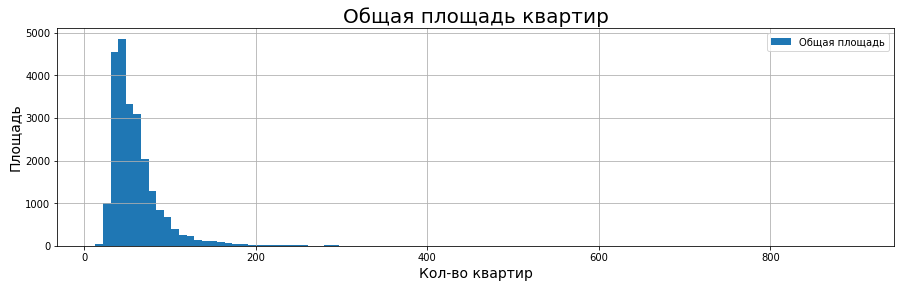

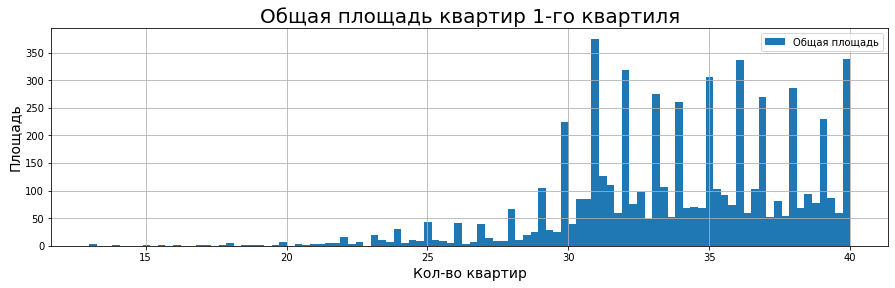

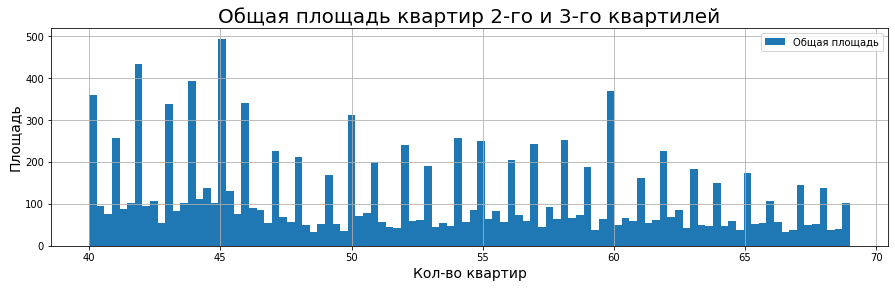

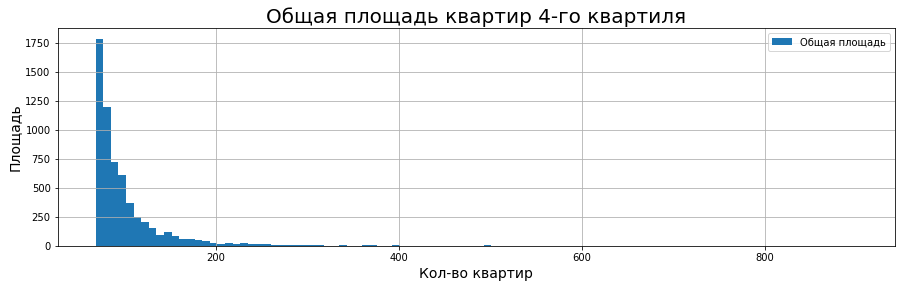

In [121]:
#изучим общую площадь
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (13,900))
plt.title('Общая площадь квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Общая площадь'])
#изучим общую площадь квартир первого квартиля 
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (13,40))
plt.title('Общая площадь квартир 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Общая площадь'])
#изучим общую площадь второго и третьего квартилей
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (40,69))
plt.title('Общая площадь квартир 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Общая площадь'])
#изучим общую площадь четвертого квартиля
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (69,900))
plt.title('Общая площадь квартир 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Общая площадь']);

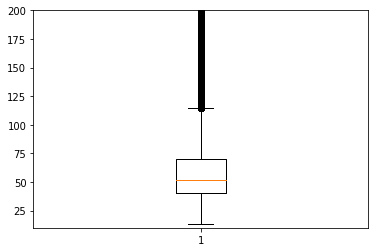

In [122]:
# диаграмма размаха
plt.boxplot(df['total_area'])
plt.ylim(10,200);

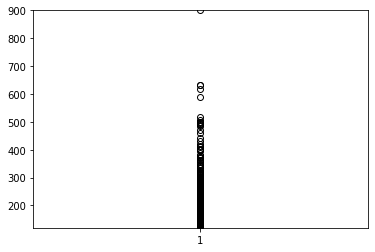

In [123]:
# диаграмма размаха
plt.boxplot(df['total_area'])
plt.ylim(120,900);

Всего на данном этапе в исследовании 23469 квартир. Их площадь варьируется от 13 до 900 кв.м. Среднее значение - 60.4 кв. м., медианное - 52 кв. м. На гистограмме можно заметить, что наибольшее число объявлений приходится на квартиры площадью 45 кв. м. и 42 кв. м. Диаграмма размаха показывает, что квартиры площадью 120 кв.м. и более встречаются реже. Самые редкие квартиры с площадью больше 550 кв.м. Это не выглядит чем-то аномальным, но их достаточно мало.

In [124]:
df.query('total_area > 550')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
3117,19,140000000,631.0,2019-03-30,7,2.55,5,322.3,5,NaN,...,210.0,0,True,221870,5,3,2019,последний,0.510777,0.095087
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,...,NaN,14,True,110169,3,2,2019,другой,0.693220,0.169492
12859,20,140000000,631.2,2019-04-09,7,3.90,4,322.3,4,NaN,...,210.0,0,True,221799,1,4,2019,последний,0.510615,0.030894
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,NaN,...,198.0,111,True,485436,0,12,2017,другой,0.417476,0.113269
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444


##### Жилая площадь

In [125]:
df['living_area'].describe()

count    23469.000000
mean        34.551220
std         22.243078
min          6.000000
25%         18.600000
50%         30.000000
75%         42.260000
max        409.700000
Name: living_area, dtype: float64

In [126]:
df['living_area'].value_counts()

18.00     966
17.00     759
30.00     653
16.00     503
28.00     495
         ... 
152.00      1
36.81       1
46.13       1
29.43       1
42.55       1
Name: living_area, Length: 1852, dtype: int64

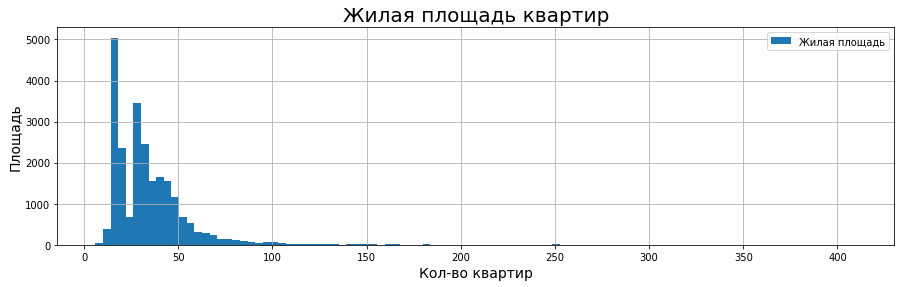

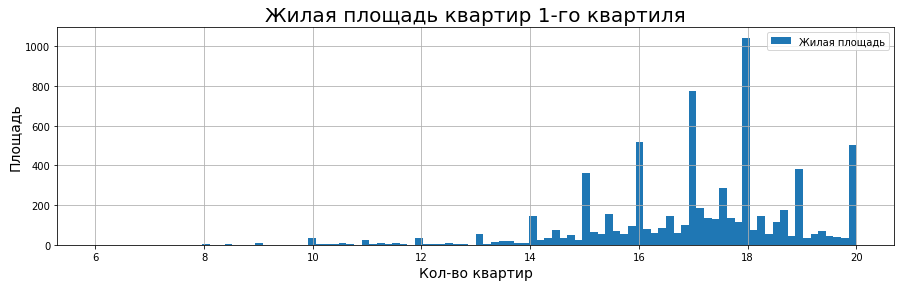

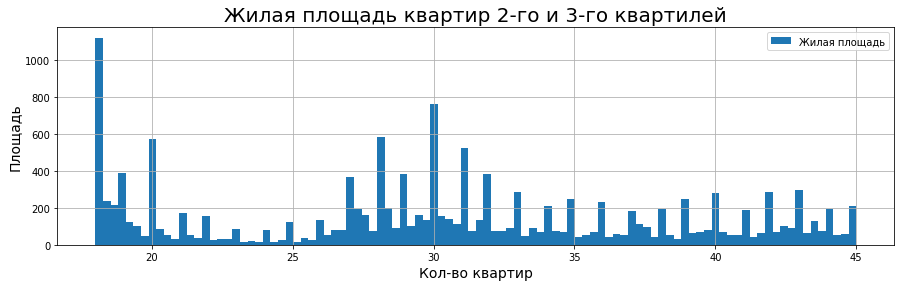

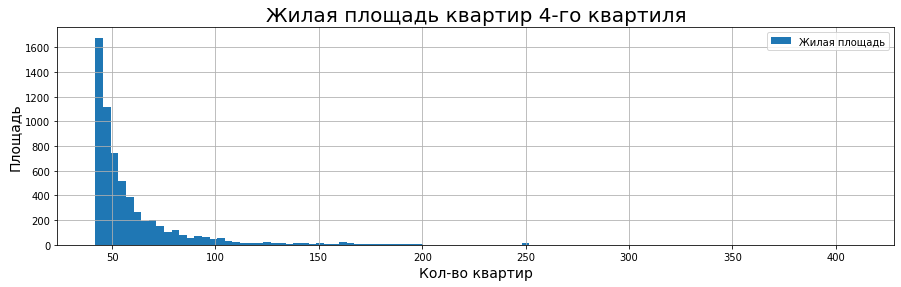

In [127]:
# изучим жилую площадь
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (6,410))
plt.title('Жилая площадь квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Жилая площадь'])
# изучим первый квартиль
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (6,20))
plt.title('Жилая площадь квартир 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Жилая площадь'])
# изучим второй и третий квартиль
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (18,45))
plt.title('Жилая площадь квартир 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Жилая площадь'])
# изучим четвёртый квартиль
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (42,410))
plt.title('Жилая площадь квартир 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Жилая площадь']);

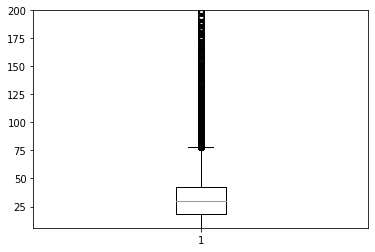

In [128]:
# диаграмма размаха
plt.boxplot(df['living_area'])
plt.ylim(6,200);

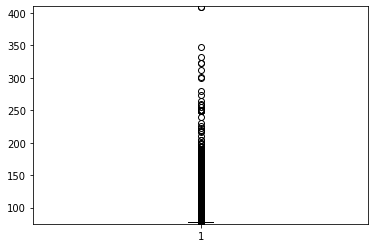

In [129]:
# диаграмма размаха
plt.boxplot(df['living_area'])
plt.ylim(75,410);

Жилая площадь варьируется от 6 до 409.7 кв. м. Среднее значение - 34.5 кв.м, медианное - 30 кв.м. Больше всего квартир имеют жилую площадь 18 или 17 кв.м.Диаграмма размаха показывает, что квартиры с жилой площадью 75 кв.м. встречаются реже. Самые редкие квартиры с площадью больше 350 кв.м.

In [130]:
df.query('living_area > 350')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
5358,20,65000000,590.0,2019-02-14,15,3.5,6,409.0,3,NaN,...,NaN,14,True,110169,3,2,2019,другой,0.693220,0.169492
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444


##### Площадь кухни

In [131]:
df[df['kitchen_area'] != 0]['kitchen_area'].describe()

count    23195.000000
mean        10.465120
std          5.787538
min          1.300000
25%          7.000000
50%          9.000000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

In [132]:
df['kitchen_area'].value_counts()

10.00    1437
6.00     1365
9.00     1360
8.00     1212
7.00     1149
         ... 
40.50       1
42.70       1
31.80       1
2.40        1
13.83       1
Name: kitchen_area, Length: 1006, dtype: int64

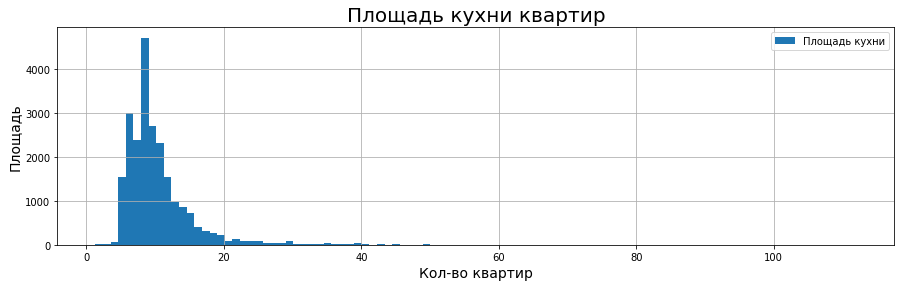

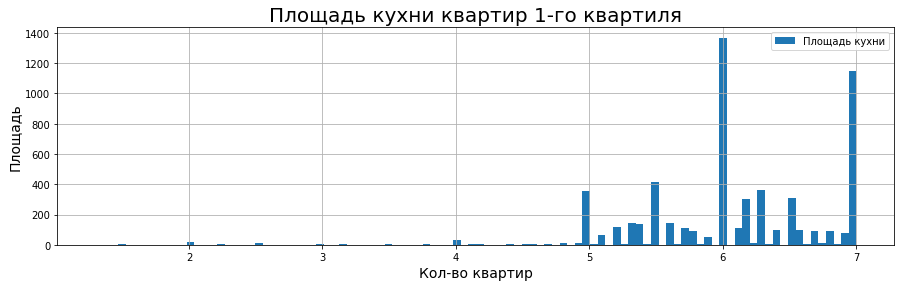

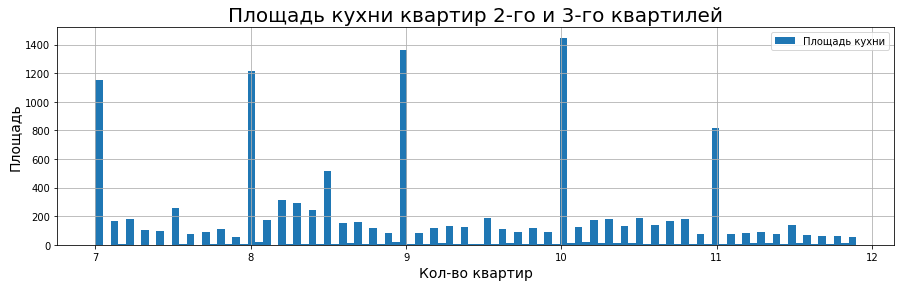

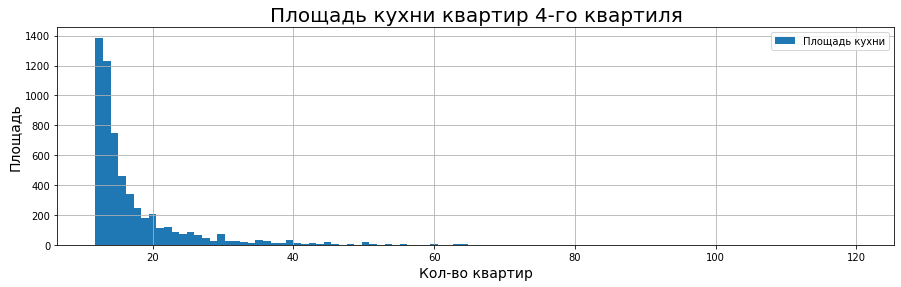

In [133]:
# изучим, квартиры с какой площадью кухни есть
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1.3,112))
plt.title('Площадь кухни квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Площадь кухни'])
# изучим первый квартиль
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1.3,7))
plt.title('Площадь кухни квартир 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Площадь кухни'])
# изучим второй и третий квартили
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (7,11.9))
plt.title('Площадь кухни квартир 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Площадь кухни'])
# изучим четвертый квартиль
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (11.9,120))
plt.title('Площадь кухни квартир 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Площадь кухни']);

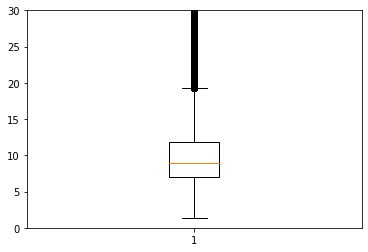

In [134]:
# диаграмма размаха
plt.boxplot(df[df['kitchen_area'] != 0]['kitchen_area'])
plt.ylim(0,30);

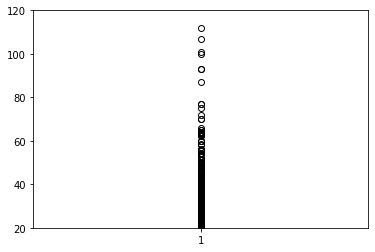

In [135]:
# диаграмма размаха
plt.boxplot(df[df['kitchen_area'] != 0]['kitchen_area'])
plt.ylim(20,120);

Нулевые значения площади кухни - это квартиры-студии, где мы не можем сказать ничего о площади кухни. Максимальная площадь кухни - 112 кв.м., минимальная 1.3 кв.м (что очень мало). Среднее значение - 10.5 кв. м, медианное - 9 кв.м. Больше всего выставлено на продажу квартир с кухней от 10, 6 и 9 кв.м. Квартиры с кухней 19 кв.м. и более встречаются реже. Самые редкие квартиры с кухней больше 80 кв.м.

In [136]:
df.query('kitchen_area > 80')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
2489,9,12500000,255.0,2017-04-21,3,2.70,2,153.9,2,NaN,...,198.0,102,True,49019,4,4,2017,последний,0.603529,0.394902
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,...,NaN,14,True,110169,3,2,2019,другой,0.693220,0.169492
10867,1,56844500,177.9,2015-01-15,3,3.00,6,87.2,5,True,...,569.0,0,True,319530,3,1,2015,другой,0.490163,0.490163
16239,5,82400000,181.1,2017-05-24,3,3.90,9,58.2,4,False,...,NaN,501,True,454997,2,5,2017,другой,0.321369,0.514633
16797,9,65850000,146.0,2017-07-14,2,2.55,9,40.0,3,NaN,...,NaN,77,True,451027,4,7,2017,другой,0.273973,0.636986
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444
20215,2,85000000,249.7,2018-02-01,3,2.60,10,72.0,9,NaN,...,99.0,26,True,340408,3,2,2018,другой,0.288346,0.428514


#### Исследовательский анализ цены квартиры

In [137]:
df['last_price'].describe()

count    2.346900e+04
mean     6.535967e+06
std      1.087553e+07
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [138]:
df.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,NaN,8,True,111,2,3,2019,последний,0.293578,0.371560
14911,5,430000,54.0,2018-06-26,2,2.80,3,31.0,3,NaN,...,NaN,44,True,7962,1,6,2018,последний,0.574074,0.166667
17456,7,430000,30.4,2019-04-22,1,2.70,2,16.0,1,NaN,...,NaN,0,True,14144,0,4,2019,первый,0.526316,0.197368
16274,18,440000,40.0,2018-07-10,1,2.55,5,18.0,1,NaN,...,NaN,45,True,11000,1,7,2018,первый,0.450000,0.250000
17676,0,450000,36.5,2018-02-01,1,2.55,5,17.3,4,NaN,...,NaN,120,True,12328,3,2,2018,другой,0.473973,0.232877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,NaN,...,198.0,111,True,485436,0,12,2017,другой,0.417476,0.113269
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,NaN,...,285.0,233,True,1736842,2,4,2018,другой,0.500000,0.210526
14706,15,401300000,401.0,2016-02-20,5,2.55,9,204.0,9,False,...,478.0,393,True,1000748,5,2,2016,последний,0.508728,0.059850
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444


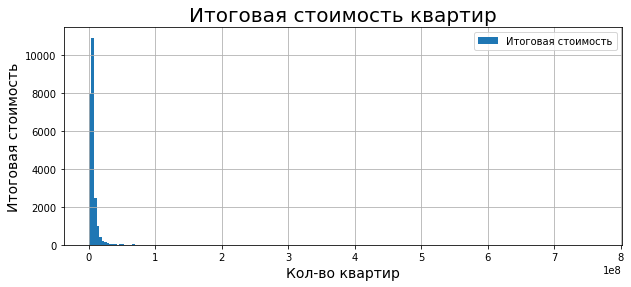

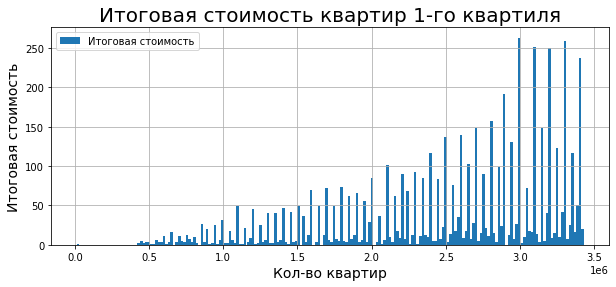

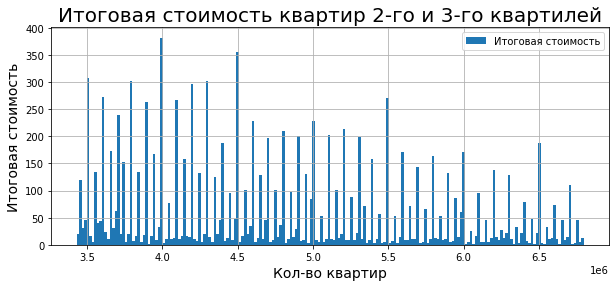

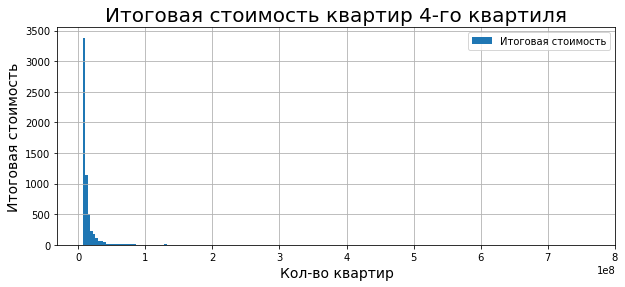

In [139]:
# общая гистограмма
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (10,4), range = (12190,763000000))
plt.title('Итоговая стоимость квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Итоговая стоимость', fontsize=14)
plt.legend(['Итоговая стоимость'])
# гистограмма первого квартиля
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (10,4), range = (12190,3430000))
plt.title('Итоговая стоимость квартир 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Итоговая стоимость', fontsize=14)
plt.legend(['Итоговая стоимость'])
# гистограмма второго и третьего квартиля
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (10,4), range = (3430000,6799000))
plt.title('Итоговая стоимость квартир 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Итоговая стоимость', fontsize=14)
plt.legend(['Итоговая стоимость'])
# гистограмма четвертого квартиля
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (10,4), range = (6799000,763000000))
plt.title('Итоговая стоимость квартир 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Итоговая стоимость', fontsize=14)
plt.legend(['Итоговая стоимость']);

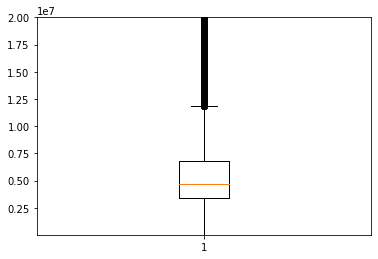

In [140]:
# диаграмма размаха
plt.boxplot(df['last_price'])
plt.ylim(12190,20000000);

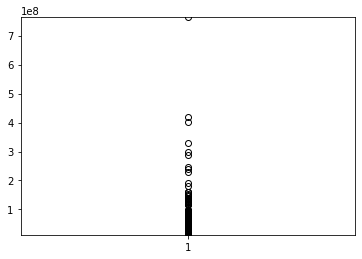

In [141]:
# диаграмма размаха
plt.boxplot(df['last_price'])
plt.ylim(12500000,763000000);

Аномально маленькой выглядит минимальная стоимость квартиры 12190, причем площадь этой двухкомнатной квартиры - 109 кв.м. Максимальная стоимость квартиры - 763000000, однако это стоимость не самой большой квартиры. Стоимость самой большой квартиры оказывается меньше. Средняя стоимость жилья - 6535967. Медианная - 4650000. Квартиры стоимостью 12000000 и более встречаются реже. Самые редкие стоимостью больше 200 млн., но это не аномально.

In [142]:
df.query('last_price > 200000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,NaN,...,285.0,233,True,1736842,2,4,2018,другой,0.500000,0.210526
5893,3,230000000,500.0,2017-05-31,6,3.00,7,248.7,7,NaN,...,198.0,50,True,460000,2,5,2017,последний,0.497400,0.080000
12971,19,763000000,400.0,2017-09-30,7,2.60,10,250.0,10,NaN,...,756.0,33,True,1907500,5,9,2017,последний,0.625000,0.125000
13749,7,240000000,410.0,2017-04-01,6,3.40,7,218.0,7,NaN,...,198.0,199,True,585365,5,4,2017,последний,0.531707,0.097561
14706,15,401300000,401.0,2016-02-20,5,2.55,9,204.0,9,False,...,478.0,393,True,1000748,5,2,2016,последний,0.508728,0.059850
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,NaN,...,198.0,111,True,485436,0,12,2017,другой,0.417476,0.113269
16461,17,245000000,285.7,2017-04-10,6,3.35,7,182.8,4,NaN,...,140.0,249,True,857542,0,4,2017,другой,0.639832,0.104305
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,NaN,...,188.0,0,True,1542604,1,3,2019,последний,0.339733,0.161067


Посмотрим сколько у нас аномальных значений по типу 12190 руб. Проанализируем квартиры стоимостью меньше 500 тысяч. Так как в датафрейме представлены не только данные Санкт-Петербурга, но и деревень и посёлков, то их стоимость может находиться в районе 500 тысяч, но точно не в районе 12190 руб.

In [143]:
# срез квартир стоимостью ниже 500 тысяч
df.query('last_price < 500000')
# проверяем, в каких населённых пунктах расположены эти квартиры
df.query('last_price < 500000')['locality_name'].value_counts() # посёлки и деревни, кроме Санкт-Петербурга
# проверяем квартиру, которая находится в САнкт-Петербурге
df.query('last_price < 500000 and locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,NaN,8,True,111,2,3,2019,последний,0.293578,0.37156


Таким образом, мы видим, что аномальное значение в столбце по стоимости квартире одно - 12190, так как вряд ли в Санкт-Петербурге есть квартиры по такой цене. Для остальных квартир стоимостью от 400 до 500 тысяч данные суммы не выглядят аномальными, поскольку расположены они не в городе. Возможно, ошибка связана с потерей одной цифры, например, 0. Но мы это точно не знаем, поэтому просто удалим эту строку.

#### Исследовательский анализ числа комнат

In [144]:
df['rooms'].describe()

count    23469.000000
mean         2.072095
std          1.078637
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [145]:
df.sort_values(by='rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
12130,4,2360000,23.50,2017-04-08,0,2.75,25,16.6,22,NaN,...,NaN,331,True,100425,5,4,2017,другой,0.706383,0.000000
6408,0,2450000,27.00,2017-11-07,0,2.75,23,14.0,22,NaN,...,NaN,66,True,90740,1,11,2017,другой,0.518519,0.000000
10606,14,2950000,25.27,2017-11-17,0,2.75,25,25.0,11,NaN,...,623.0,51,True,116739,4,11,2017,другой,0.989315,0.000000
19917,5,2340000,25.41,2017-09-29,0,2.75,25,18.5,13,NaN,...,NaN,3,True,92089,4,9,2017,другой,0.728060,0.000000
13613,16,8100000,58.40,2019-04-26,0,3.30,7,33.0,6,NaN,...,NaN,0,True,138698,4,4,2019,другой,0.565068,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20829,6,28659000,245.40,2016-03-31,14,3.00,4,168.3,2,NaN,...,118.0,95,True,116784,3,3,2016,другой,0.685819,0.105542
866,5,25000000,363.00,2017-12-23,14,3.16,5,222.0,4,NaN,...,435.0,418,True,68870,5,12,2017,другой,0.611570,0.045730
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.0,3,NaN,...,NaN,14,True,110169,3,2,2019,другой,0.693220,0.169492
18848,6,28500000,270.00,2015-03-02,16,3.00,4,180.0,4,NaN,...,NaN,1365,True,105555,0,3,2015,последний,0.666667,0.048148


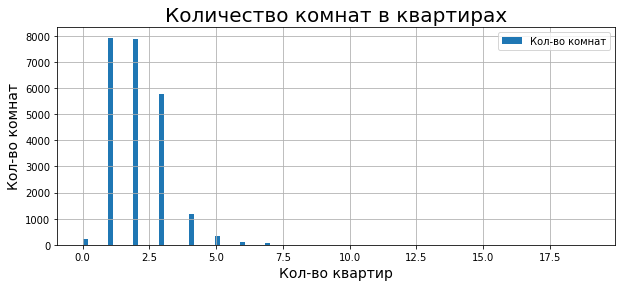

In [146]:
df.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,19))
plt.title('Количество комнат в квартирах', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во комнат', fontsize=14)
plt.legend(['Кол-во комнат']);

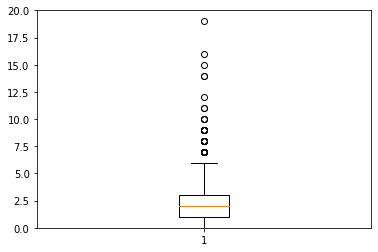

In [147]:
# диаграмма размаха
plt.boxplot(df['rooms'])
plt.ylim(0,20);

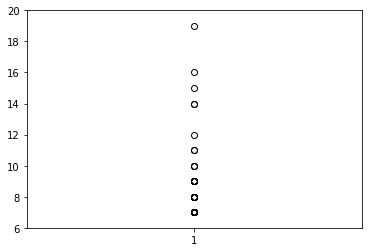

In [148]:
# диаграмма размаха
plt.boxplot(df['rooms'])
plt.ylim(6,20);

Помним, что 0 количество комнат имеют квартиры-студии. Максимальное количество комнат - 19. При этом такая квартира имеет не самую большую площадь. Больше всего в продаже квартир с одной или двумя комнатами. Меньше квартир с 7 комнатами и больше. Самые редкие квартиры с 10 комнатами и больше.

In [149]:
df.query('rooms > 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,NaN,...,NaN,0,True,95264,6,7,2018,последний,0.755580,0.072401
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,NaN,...,435.0,418,True,68870,5,12,2017,другой,0.611570,0.045730
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,...,NaN,14,True,110169,3,2,2019,другой,0.693220,0.169492
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,NaN,...,66.0,813,True,170015,1,2,2017,другой,0.664606,0.061309
14498,6,32250000,374.6,2018-06-09,19,2.55,5,264.5,2,NaN,...,548.0,114,True,86091,5,6,2018,другой,0.706086,0.073679
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,NaN,...,NaN,1365,True,105555,0,3,2015,последний,0.666667,0.048148
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,318.0,106,True,466666,2,12,2017,последний,0.455222,0.124444
20829,6,28659000,245.4,2016-03-31,14,3.00,4,168.3,2,NaN,...,118.0,95,True,116784,3,3,2016,другой,0.685819,0.105542


#### Исследовательский анализ высоты потолков

In [150]:
df['ceiling_height'].describe()

count    23469.000000
mean         2.729663
std          0.737084
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

In [151]:
df['ceiling_height'].value_counts()

2.55    4283
2.50    3488
2.70    3243
2.75    2429
2.60    2276
        ... 
3.43       1
4.30       1
3.39       1
4.65       1
3.59       1
Name: ceiling_height, Length: 181, dtype: int64

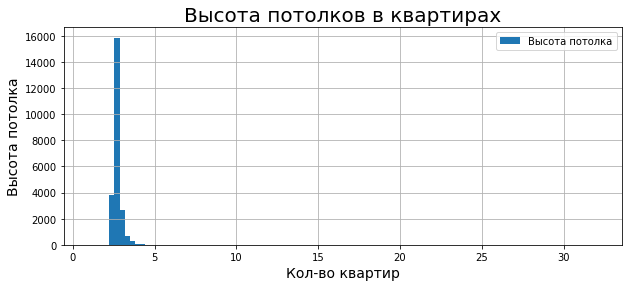

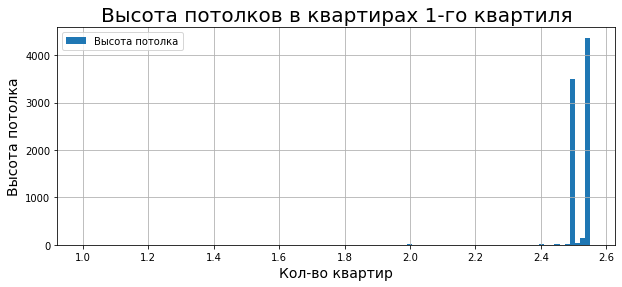

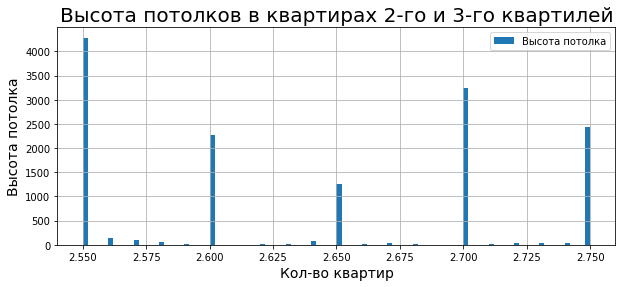

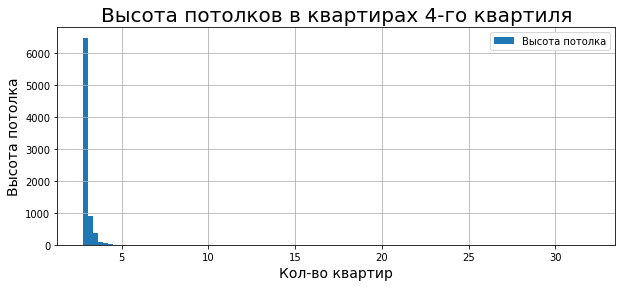

In [152]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (1,32))
plt.title('Высота потолков в квартирах', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Высота потолка', fontsize=14)
plt.legend(['Высота потолка'])
# первый квартиль
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (1,2.55))
plt.title('Высота потолков в квартирах 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Высота потолка', fontsize=14)
plt.legend(['Высота потолка'])
# второй и третий квартиль
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (2.55,2.75))
plt.title('Высота потолков в квартирах 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Высота потолка', fontsize=14)
plt.legend(['Высота потолка']);
# четвертый квартиль
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (2.75,32))
plt.title('Высота потолков в квартирах 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Высота потолка', fontsize=14)
plt.legend(['Высота потолка']);


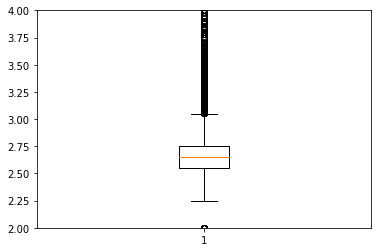

In [153]:
# диаграмма размаха
plt.boxplot(df['ceiling_height'])
plt.ylim(2,4);

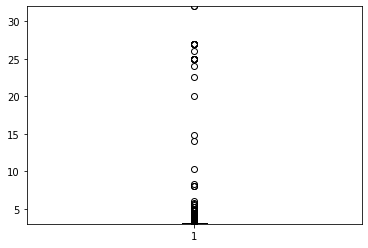

In [154]:
# диаграмма размаха
plt.boxplot(df['ceiling_height'])
plt.ylim(3,32);

Минимальная высота потолка - 2 м. Максимальная высота - 32 м, что аномально. Средняя высота потолка - 2.73 м. Медианная высота потолка - 2.65. Больше всего в продаже квартир с потолками 2.55 м. Меньше квартир с потолками 2 м и ниже и выше 3.10 м. Самые редкие квартиры с высотой больше 6 м. Предположим, что возникла какая-то ошибка с загрузкой данных, так как потолки выше 6 м аномальны так же, как и потолки ниже 2.1 м (минимальная высота потолка для частного дома).

### Время продажи квартир

In [155]:
df[df['days_exposition'] != 0]['days_exposition'].describe()

count    20314.000000
mean       181.240868
std        220.030227
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [156]:
df['days_exposition'].value_counts().head(10)

0     3155
45     873
60     533
7      227
30     208
90     200
4      175
3      156
5      150
14     146
Name: days_exposition, dtype: int64

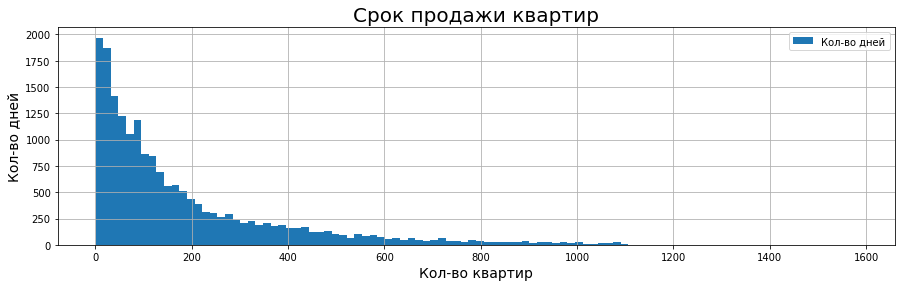

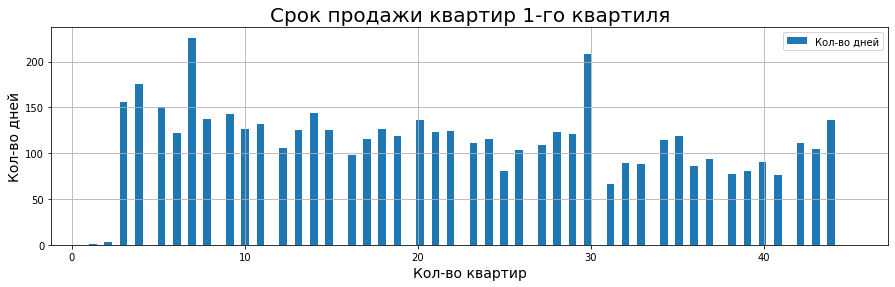

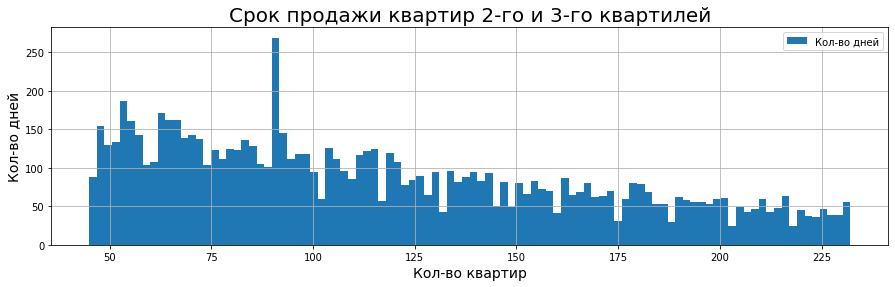

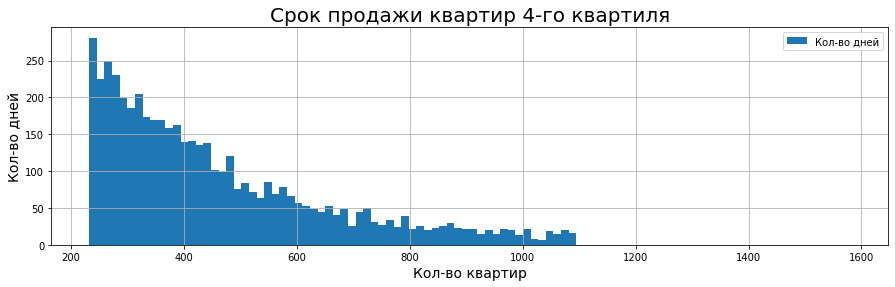

In [221]:
# гистограмма по максимальное значение
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1,1580))
plt.title('Срок продажи квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во дней', fontsize=14)
plt.legend(['Кол-во дней'])
# гистограмма по первому квартилю
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1,45))
plt.title('Срок продажи квартир 1-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во дней', fontsize=14)
plt.legend(['Кол-во дней'])
# гистограмма по второму и третьему квартилю
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (45,232))
plt.title('Срок продажи квартир 2-го и 3-го квартилей', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во дней', fontsize=14)
plt.legend(['Кол-во дней'])
# гистограмма по четвертому квартилю
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (232,1580))
plt.title('Срок продажи квартир 4-го квартиля', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во дней', fontsize=14)
plt.legend(['Кол-во дней']);


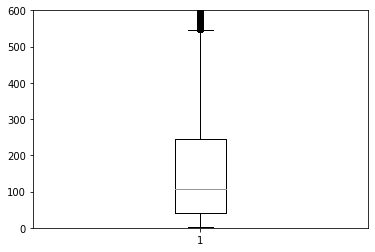

In [222]:
# диаграмма размаха
plt.boxplot(df[df['days_exposition'] != 0]['days_exposition'])
plt.ylim(0,600);

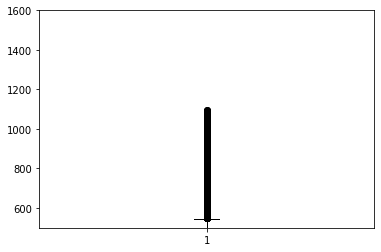

In [223]:
# диаграмма размаха
plt.boxplot(df[df['days_exposition'] != 0]['days_exposition'])
plt.ylim(500,1600);

Нам известно время снятия объявления о продаже квартиры для 20314 объектов недвижимости. Минимальный срок объявления - 1 день. Максимальный - 1580 дней, т.е. больше четырех лет. Среднее значение - 181 день, т.е. полгода. Медианное - 96 дней, примерно три месяца. Межквартильный размах - от 45 до 232 дней, т.е. можем сказать, что обычно продажа квартиры занимает от 45 дней до 232. Следовательно, продажи от 1 дня до 45 можно считать быстрыми продажами, а 233 дня и более - долгими. Реже продажи занимают больше 500 дней.  Необычно долгими кажутся продажи занимающие больше 1400 дней. Также можно отметить, что наибольшее число продаж приходится на 45 дней (полтора месяца), немного меньше на 60 дней (два месяца). Возможно, здесь есть какая-то ошибка.

In [161]:
print('продажи сроком - 45 дней')
print(df.query('days_exposition == 45')['year'].value_counts())
print('продажи сроком - 60 дней')
print(df.query('days_exposition == 60')['year'].value_counts())

продажи сроком - 45 дней
2018    478
2017    287
2016     61
2019     47
Name: year, dtype: int64
продажи сроком - 60 дней
2018    278
2017    190
2016     34
2019     31
Name: year, dtype: int64


In [162]:
# продажи за 2014 год
df.query('year == 2014 and days_exposition != 0').sort_values(by='days_exposition')
# продажи за 2015 год
df.query('year == 2015 and days_exposition != 0').sort_values(by='days_exposition')
# продажи за 2016 год
df.query('year == 2016 and days_exposition != 0').sort_values(by='days_exposition')
# продажи за 2017 год
df.query('year == 2017 and days_exposition != 0').sort_values(by='days_exposition')
# продажи за 2018 год
df.query('year == 2018 and days_exposition != 0').sort_values(by='days_exposition')
# продажи за 2019 год
df.query('year == 2019 and days_exposition != 0').sort_values(by='days_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
1632,19,4000000,49.90,2019-05-01,2,2.50,9,25.0,1,NaN,...,681.0,1,True,80160,2,5,2019,первый,0.501002,0.200401
16053,4,4070000,45.10,2019-04-30,2,2.55,5,22.7,3,NaN,...,NaN,2,True,90243,1,4,2019,другой,0.503326,0.146341
16212,0,7806000,25.00,2019-04-30,1,3.00,5,17.0,5,False,...,NaN,2,True,312240,1,4,2019,последний,0.680000,0.000000
13061,20,6100000,51.40,2019-04-29,2,3.00,5,31.7,4,NaN,...,NaN,2,True,118677,0,4,2019,другой,0.616732,0.134241
5163,18,1850000,60.96,2019-03-21,3,2.55,5,42.2,4,NaN,...,NaN,3,True,30347,3,3,2019,другой,0.692257,0.096785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,9,1100000,45.00,2019-01-07,2,2.55,5,30.0,1,NaN,...,NaN,103,True,24444,0,1,2019,первый,0.666667,0.111111
4331,14,3250000,59.10,2019-01-11,3,2.50,5,44.0,2,NaN,...,NaN,107,True,54991,4,1,2019,другой,0.744501,0.101523
14131,7,5050000,63.00,2019-01-12,3,2.53,12,40.7,3,NaN,...,NaN,108,True,80158,5,1,2019,другой,0.646032,0.112698
7323,10,1400000,62.00,2019-01-11,3,3.00,4,44.0,2,NaN,...,NaN,109,True,22580,4,1,2019,другой,0.709677,0.112903


Странно, что самые распространнёные сроки продаж встречаются не на всём временном промежутке. Получается, что ни в 2014, ни в 2015 годах квартиры не продавались за 45 или 60 дней. Но очень много продаж в эти сроки за 2017 и 2018 года. Видимо, есть какая-то ошибка, связанная с этими сроками. Кроме того, если посмотреть продажи за 2014 год, то можем увидеть, что квартиры продавались не меньше, чем за полтора года. Самый большой срок - 1580 дней. Это странно. А в 2015 не меньше, чем через полгода. Самый большой срок опять в районе 1500 дней - 1512 дней. Начиная с 2016 года срок продажи квартир значительно изменяется: с этого года квартиры продают за срок от 3-х дней и больше, самое большое - 1153 дня (3 года вместо 4 лет). В 2017 году сроки продажи сокращаются до 825 дней. В 2018 году максимальный срок продажи сокращается ещё и составляет уже 465 дней. В 2019 году сроки продаж от 1 дня до 110 дней. То есть продаж дольше 4 месяцев нет. Таким образом, в данных по срокам продаж есть какая-то ошибка, но мы ее не сможем сейчас установить.

### Удаление редких и выбивающихся значений

Уберем из датафрейма самые редкие и выбивающиеся значения. Так, мы ограничим датафрейм квартирами площадью меньше 550 кв.м., стоимостью до 200 млн (исключая значение 12190) до 10 комнат. Датафрейм ограничивается продажами до 1095 дней (3 года). Из датафрейма исключаются квартиры с потолками ниже 2.1 м и выше 6 м. Кроме того, из датафрейма мы удаляем выбивающиеся сроки продажи квартир - 45 и 60 дней.

In [163]:
df = df.query('total_area < 550 and 12190 < last_price < 200000000 and rooms < 10 and days_exposition < 1095 and 2.1 < ceiling_height < 6 and days_exposition != 45 and days_exposition != 60')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,755.0,0,True,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,NaN,...,NaN,81,True,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,NaN,...,574.0,558,True,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.60,14,95.00,9,NaN,...,234.0,424,True,408176,4,7,2015,другой,0.597484,0.094340
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,48.0,121,True,100000,1,6,2018,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,2.60,9,40.00,8,NaN,...,675.0,239,True,73717,4,8,2016,другой,0.641026,0.128205
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,NaN,...,381.0,0,True,72490,1,3,2017,другой,0.547792,0.103356
23696,18,2500000,56.70,2018-02-11,2,2.80,3,29.70,1,NaN,...,NaN,0,True,44091,6,2,2018,первый,0.523810,0.158730
23697,13,11475000,76.75,2017-03-28,2,3.00,17,38.95,12,NaN,...,196.0,602,True,149511,1,3,2017,другой,0.507492,0.303583


In [164]:
# проверка
df[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,430000.0,13.0,0.0,2.3
max,190870000.0,517.0,9.0,5.8


Таким образом мы удалили 7% от общего числа строк. Посмотрим теперь на данные.  

#### Время продажи

In [165]:
df[df['days_exposition'] != 0]['days_exposition'].describe()

count    18689.000000
mean       181.440687
std        202.139452
min          1.000000
25%         42.000000
50%        107.000000
75%        244.000000
max       1094.000000
Name: days_exposition, dtype: float64

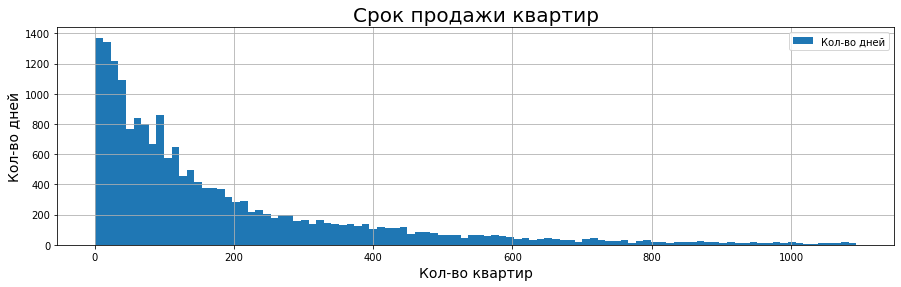

In [225]:
#гистограмма
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1,1094))
plt.title('Срок продажи квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во дней', fontsize=14)
plt.legend(['Кол-во дней']);

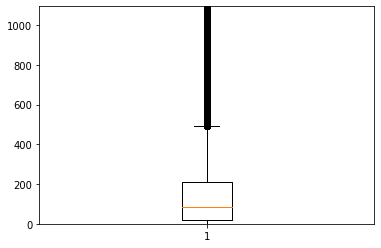

In [226]:
#диаграмма размаха
plt.boxplot(df['days_exposition'])
plt.ylim(0,1094);

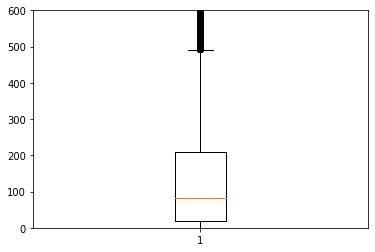

In [227]:
#диаграмма размаха
plt.boxplot(df['days_exposition'])
plt.ylim(0,600);

В очищенных данных медианное значение изменилось: в старом варианте 96, в новом - 107. Средняя продолжительность покупки практически не изменилась: 181 и 182. Минимальный срок объявления - 1 день, максимальный - 1094 дней, т.е. три года. Межквартильный размах - от 45 до 232 дней, т.е. можем сказать, что обычно продажа квартиры занимает от 42 дней до 244. Теперь быстрые продажи - это продажи от 1 до 42 дней, больше 244 дней - это долгие продажи.

#### Площадь квартиры

In [169]:
df['total_area'].describe()

count    21831.000000
mean        60.519116
std         34.469529
min         13.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        517.000000
Name: total_area, dtype: float64

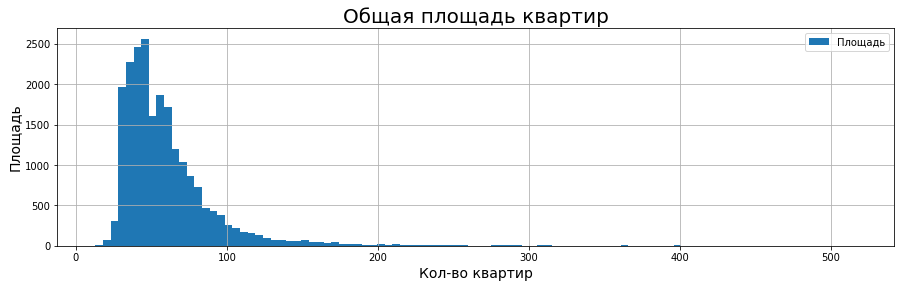

In [229]:
#гистограмма
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (13,517))
plt.title('Общая площадь квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Площадь', fontsize=14)
plt.legend(['Площадь']);

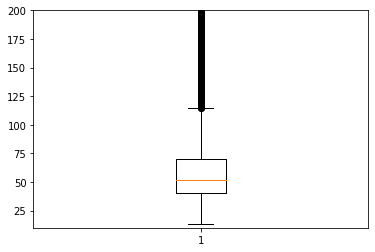

In [230]:
# диаграмма размаха
plt.boxplot(df['total_area'])
plt.ylim(10,200);

Площадь квартир в очищенном фрейме варьируется от 13 до 517 кв.м. Среднее значение - 60.5 кв.м., медианное - 52 кв. м. Т.е. данные практически не изменились.  

#### Цена квартир

In [172]:
df['last_price'].describe()

count    2.183100e+04
mean     6.487987e+06
std      7.870486e+06
min      4.300000e+05
25%      3.470000e+06
50%      4.699000e+06
75%      6.850000e+06
max      1.908700e+08
Name: last_price, dtype: float64

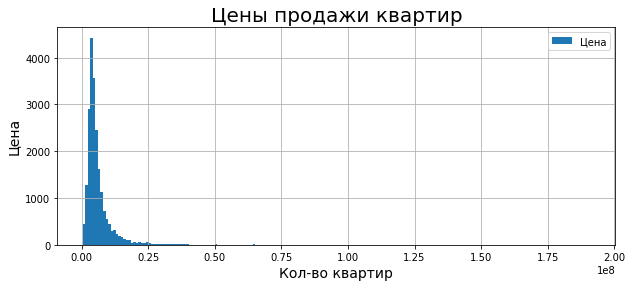

In [232]:
df.plot(y = 'last_price', kind = 'hist', bins = 200, grid=True, figsize = (10,4), range = (430000,190870000))
plt.title('Цены продажи квартир', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.legend(['Цена']);

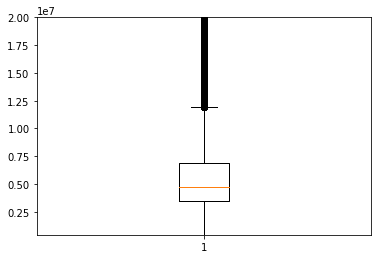

In [233]:
# диаграмма размаха
plt.boxplot(df['last_price'])
plt.ylim(430000,20000000);

Средняя стоимость жилья - 6487987 (упала на 50 тысяч по сравнению со старым вариантом). Медианная - 4699000 (выросла на 50 тысяч по сравнению со старым вариантом). Обычная стоимость квартир в диапазоне от 3 млн. 470 тысяч до 6 млн. 850 тысяч., т.е. диапазон значений расришился. Минимальная стоимость квартир - 430 тысяч.

#### Количество комнат

In [175]:
df['rooms'].describe()

count    21831.000000
mean         2.076405
std          1.056111
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

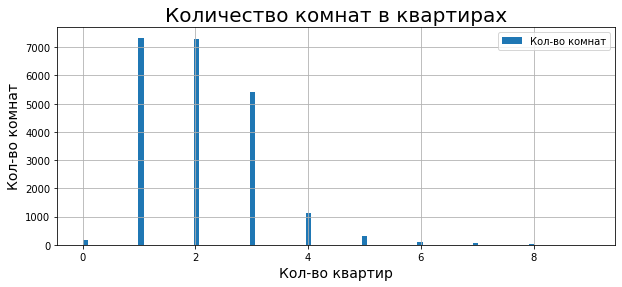

In [235]:
df.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (0,9))
plt.title('Количество комнат в квартирах', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Кол-во комнат', fontsize=14)
plt.legend(['Кол-во комнат']);

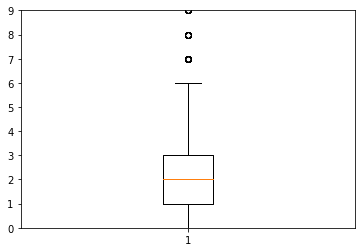

In [236]:
# диаграмма размаха
plt.boxplot(df['rooms'])
plt.ylim(0,9);

Основные данные практически не изменились. Были удалены только редкие варианты, которые не отразились на основных данных.  

#### Высота потолка

In [178]:
df['ceiling_height'].describe()

count    21831.000000
mean         2.709378
std          0.235212
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64

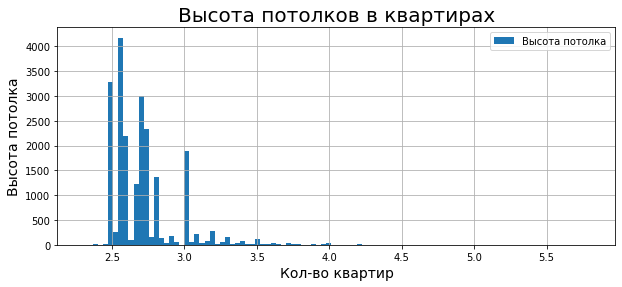

In [238]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (10,4), range = (2.3,5.8))
plt.title('Высота потолков в квартирах', fontsize=20)
plt.xlabel('Кол-во квартир', fontsize=14)
plt.ylabel('Высота потолка', fontsize=14)
plt.legend(['Высота потолка']);

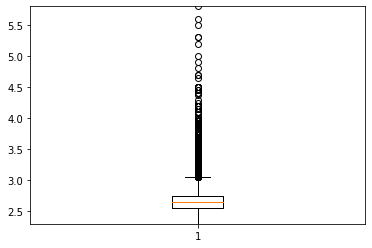

In [239]:
# диаграмма размаха
plt.boxplot(df['ceiling_height'])
plt.ylim(2.3,5.8);

После удаления аномальных значений минимальная высота потолка - 2.3 м. Максимальная высота - 5.8 м. Средняя высота потолка - 2.71 м. Медианная высота потолка - 2.65. Т.е. эти значения не изменились практически.  

### Вывод

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Таким образом, квартиры Санкт-Петербурга и населённых пунктов, расположенных рядом, представлены в достаточно широком многообразии.

Имеются как квартиры-студии, квартиры свободной планировки, так и типовые квартиры, количество комнат которых варьируется от 1 до 9. В основном в продаже однокомнатные и двухкомнатные квартиры. По площади квартиры могут быть от 13 кв.м до 520 кв.м, но больше недвижимости с площадью от 40 кв.м до 70 кв.м. Высота потолков в основном в диапазоне от 2.55 м до 2.75 м. В большинстве случаев продажа квартиры занимает от 42 до 244 дней, т.е. от полутора месяцев до 8.

Так выглядят данные после удаления редких и выбивающихся значений. Мы удалили редкие значения в столбцах по стоимости квартир, площади. Избавились от аномальных значений в столбце по высоте потолков. Исключили аномальные значения из столбца по количеству дней продажи.

### Зависимость стоимости квартиры от квадратного метра, числа комнат, этажа и удалённости от центра.

#### Зависимость стоимости квартиры от квадратного метра


**Зависимость цены квадратного метра от площади**

0.2875242698022546

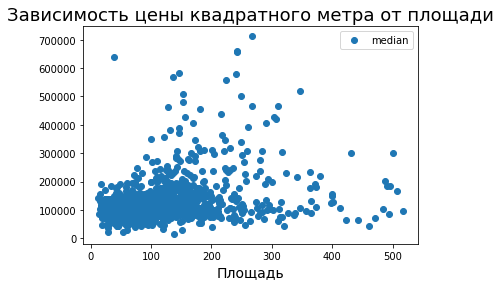

In [243]:
# сводная таблица
df_total_area = df.pivot_table(index = 'total_area', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_total_area.columns = ['mean', 'count', 'median']
df_total_area
# график
df_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квадратного метра от площади', fontsize=18)
plt.xlabel('Площадь', fontsize=14)
# сортировка
df_total_area.sort_values('median', ascending = False)
# расчёт корреляции
df['total_area'].corr(df['one_meter_price'])

**Зависимость цены квартиры от общей площади**

0.7401851907409771

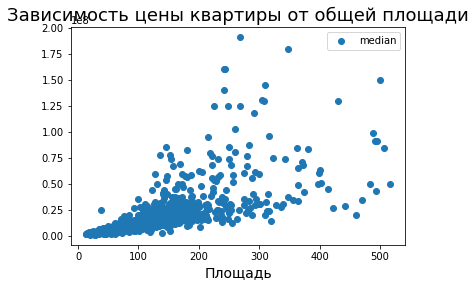

In [244]:
# сводная таблица
df_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
df_total_area.columns = ['mean', 'count', 'median']
df_total_area
# график
df_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квартиры от общей площади', fontsize=18)
plt.xlabel('Площадь', fontsize=14)
# сортировка
df_total_area.sort_values('median', ascending = False)
# расчёт корреляции
df['total_area'].corr(df['last_price'])


Видим, что стоимость квадратного метра квартиры слабо зависит от площади жилья. Коэффициент корреляции - 0.29.  
Сильная зависимость наблюдается при анализе сопоставлении цены квартиры и ее площади. Чем больше площадь, тем выше цена. В этом случае коэффициент корреляции выше - 0.74.


#### Зависимость стоимости квартиры от числа комнат

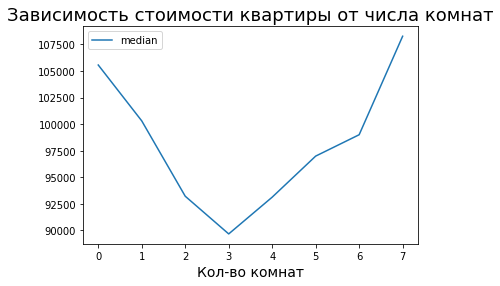

In [247]:
# сводная таблица
df_rooms = df.pivot_table(index = 'rooms', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_rooms.columns = ['mean', 'count', 'median']
df_rooms
# сортировка
df_rooms.sort_values('count', ascending = False)
# отбросим квартиры с 8 комнатами и выше (т.е. те квартиры, количество которых больше 50) 
df_rooms.query('count > 50')
df_rooms.query('count > 50').sort_values('median', ascending = False)
# график
df_rooms.query('count > 50').plot(y = 'median')
plt.title('Зависимость стоимости квартиры от числа комнат', fontsize=18)
plt.xlabel('Кол-во комнат', fontsize=14);

Видим следующую закономерность, чем ближе количество комнат квартиры к 3, тем ниже стоимость квадратного метра. Самые дорогие здесь семикомнатные квартиры, на втором месте по дороговизне квартиры-студии. Самыми дешевыми являются трехкомнатные квартиры.  

#### Зависимость стоимости квартиры от этажа

In [184]:
# сводная таблица
df_floor_id = df.pivot_table(index = 'floor_id', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_floor_id.columns = ['mean', 'count', 'median']
df_floor_id

,mean,count,median
floor_id,,,
другой,103936.901255,16092,98571
первый,82858.570893,2666,81948
последний,92516.487472,3073,88666


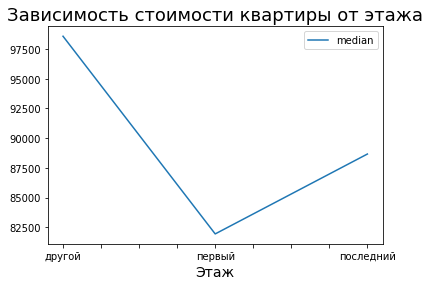

In [246]:
# график
df_floor_id.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от этажа', fontsize=18)
plt.xlabel('Этаж', fontsize=14);

Видим, что квартиры на первом этаже дешевле квартир на последнем этаже и квартир на других этажах. Квартиры на последнем этаже дороже квартир на первом этаже, но дешевле квартир на других этажах.  

#### Зависимость стоимости квартиры от удалённости от центра

-0.25190504818579124

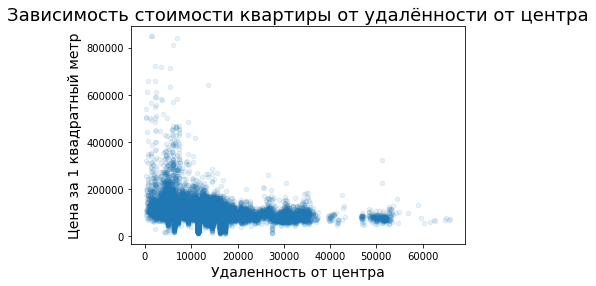

In [249]:
# сводная таблица
df_city = df.pivot_table(index = 'cityCenters_nearest', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_city.columns = ['mean', 'count', 'median']
df_city
# график
df.plot(kind = 'scatter', y = 'one_meter_price', x = 'cityCenters_nearest', alpha = 0.1)
plt.title('Зависимость стоимости квартиры от удалённости от центра', fontsize=18)
plt.xlabel('Удаленность от центра', fontsize=14)
plt.ylabel('Цена за 1 квадратный метр', fontsize=14)
# расчёт корреляции
df['cityCenters_nearest'].corr(df['one_meter_price'])

Как можно убедиться, зависимость стоимости квартиры от её удаленности от центра очень слабая. Коэффициент корреляции -0.25.

### Зависимость стоимости квартиры от даты размещения: дня недели, месяца и года  

#### Зависимость стоимости квартиры от даты размещения (дня недели)

In [187]:
# сводная таблица
df_day = df.pivot_table(index = 'day_of_week', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_day.columns = ['mean', 'count', 'median']
df_day
# сортировка
df_day.sort_values('median', ascending = False)

,mean,count,median
day_of_week,,,
1,100037.804038,3863,95918.0
2,99465.365900,3654,95797.5
0,100105.169268,3332,95552.0
3,100625.512409,3989,95264.0
4,99618.280914,3720,94858.0
6,98636.080656,1525,94718.0
5,98351.616705,1748,94159.5


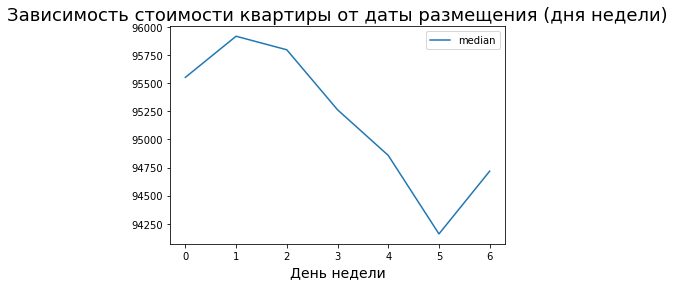

In [250]:
# график
df_day.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от даты размещения (дня недели)', fontsize=18)
plt.xlabel('День недели', fontsize=14);

Самая низкая стоимость указана в объявлениях, выставленных в субботу, самая высокая - в объявлениях, выставленных во вторник. Стоимость снижается от вторника к субботе и растёт от субботы ко вторнику. Вероятно, это связано с тем, что в выходные меньше спроса, так как люди стремятся отдохнуть, соответственно и цена недвижимости ниже. Однако, возможно, это просто случайность.  

#### Зависимость стоимости квартиры от даты размещения (месяца)

In [189]:
# сводная таблица
df_month = df.pivot_table(index = 'month', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_month.columns = ['mean', 'count', 'median']
df_month
# сортировка
df_month.sort_values('median', ascending = False)

,mean,count,median
month,,,
1,101901.106527,1333,96666.0
4,100960.028546,2277,96634.0
8,100965.163164,1618,96567.5
2,99827.676421,2392,95652.0
9,99957.775731,1846,95652.0
11,99479.119390,2228,95631.5
3,98782.366361,2402,95577.5
7,99836.084856,1532,95298.5
12,100247.283613,1428,94957.5


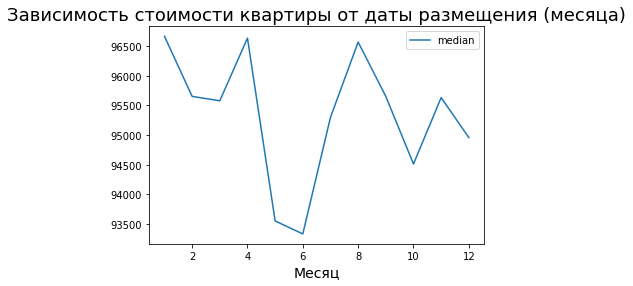

In [251]:
# график
df_month.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от даты размещения (месяца)', fontsize=18)
plt.xlabel('Месяц', fontsize=14);

Самые дешёвые квартиры выставлены мае и июне (перед периодом отпусков, возможно, чтобы быстрее продать квартиру перед отпуском). После июня цена начинает расти вплоть до августа. Период отпусков, когда у людей появляется время для решения жилищного вопроса, в этот период продавцы соответственно поднимают цену. Начиная с августа и до октября стоимость недвижимости падает. Время отпусков закончилось, соответственно спрос на квартиры падает и цена тоже снижается. С октября по ноябрь цены опять повышаются. Возможно, в это время активизируются покупатели, которые хотят приобрести жилье до новогодних праздников, поэтому продавцы поднимают стоимость квартир. В ноябрь и до декабря цена опять падает. Люди готовятся к праздникам, спрос падает, стоимость недвижимости снижается. В январе цены повышаются, но не намного, так как, возможно, в период новогодних праздников, у людей появляется время решить квартирный вопрос (спрос поднимается и цена растёт). С января по февраль цены опять снижаются. С февраля по апрель стоимость квартир растёт. Видимо, весна воспринимается как период обновления, люди начинают задумываться о жилье, соответственно стоимость на недвижимость вновь поднимается. И с апреля по май цена падает, так как в это время люди готовятся к отпускам и деньги откладывают на отпуск, а не на покупку недвижимости. Спрос падает - цена снижается.  

####  Зависимость стоимости квартиры от даты размещения (года)

In [191]:
# сводная таблица
df_year = df.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df_year.columns = ['mean', 'count', 'median']
df_year
# сортировка
df_year.sort_values('median', ascending = False)

,mean,count,median
year,,,
2014,125894.440000,100,106901.5
2019,106880.226367,2761,103703.0
2018,98863.791029,7647,96491.0
2017,97599.898518,7627,93181.0
2015,104241.755958,1049,92785.0
2016,98343.613147,2647,91836.0


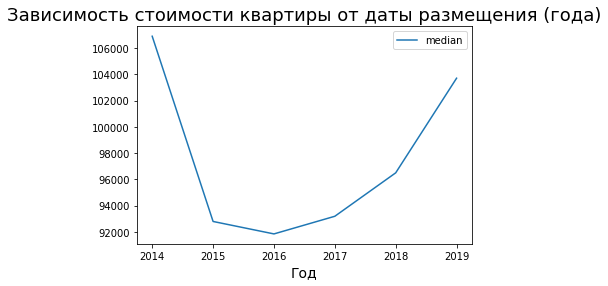

In [252]:
# график
df_year.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от даты размещения (года)', fontsize=18)
plt.xlabel('Год', fontsize=14);

Видим, что с 2014 по 2016 года цена на квартиры в целом падала. Самая низкая стоимость квартир в 2016 году. С 2016 года наблюдается рост цен на недвижимость. Интересно посмотреть, как менялась стоимость в зависимости от типа квартир: квартиры-студии, однокомнатные, двухкомнатные и трёхкомнатные.

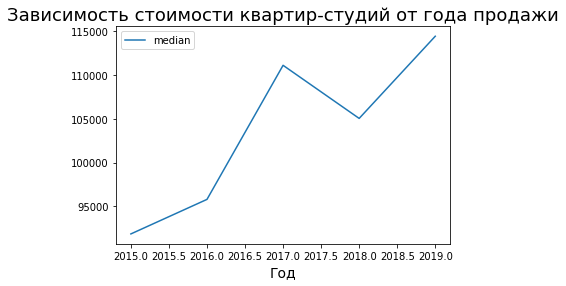

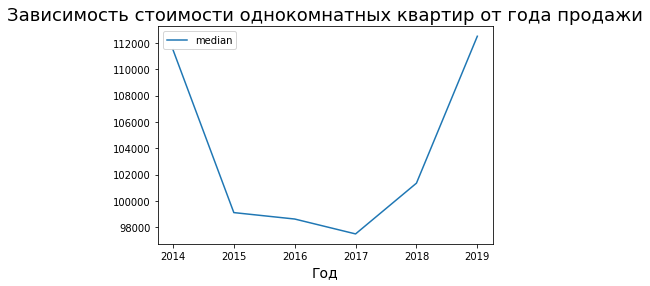

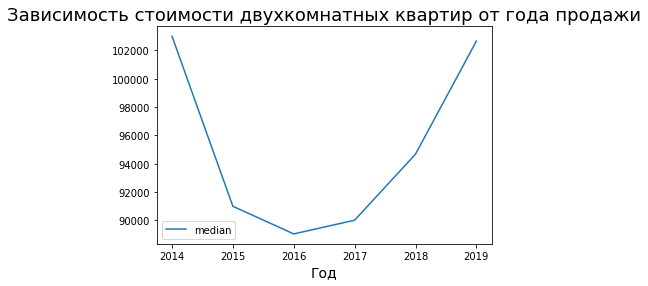

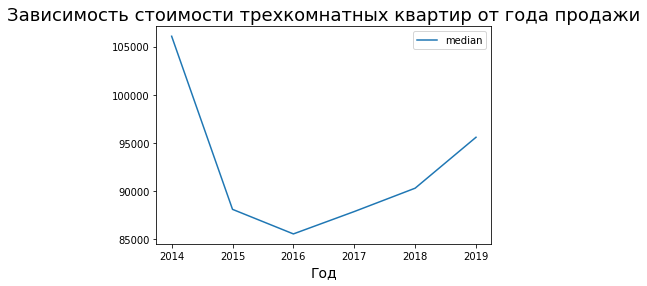

In [253]:
# сводная таблица для квартир-студий
df0room = df.query('rooms == 0 and studio == True')
df0room = df0room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df0room.columns = ['mean', 'count', 'median']
df0room
# сортировка
df0room.sort_values('median', ascending = False)

# сводная таблица для однокомнатных квартир
df1room = df.query('rooms == 1')
df1room = df1room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df1room.columns = ['mean', 'count', 'median']
df1room
# сортировка
df1room.sort_values('median', ascending = False)

# сводная таблица для двухкомнатных квартир
df2room = df.query('rooms == 2')
df2room = df2room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df2room.columns = ['mean', 'count', 'median']
df2room
# сортировка
df2room.sort_values('median', ascending = False)

# сводная таблица для трёхкомнатных квартир
df3room = df.query('rooms == 3')
df3room = df3room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
df3room.columns = ['mean', 'count', 'median']
df3room
# сортировка
df3room.sort_values('median', ascending = False)

# графики
df0room.plot(y = 'median')
plt.title('Зависимость стоимости квартир-студий от года продажи', fontsize=18)
plt.xlabel('Год', fontsize=14)
df1room.plot(y = 'median')
plt.title('Зависимость стоимости однокомнатных квартир от года продажи', fontsize=18)
plt.xlabel('Год', fontsize=14)
df2room.plot(y = 'median')
plt.title('Зависимость стоимости двухкомнатных квартир от года продажи', fontsize=18)
plt.xlabel('Год', fontsize=14)
df3room.plot(y = 'median')
plt.title('Зависимость стоимости трехкомнатных квартир от года продажи', fontsize=18)
plt.xlabel('Год', fontsize=14);


Можно увидеть, что по однокомнатным, двухкомнатным и трехкомнатным квартирам ситуацию в целом совпадает с той, что характерна для всей недвижимости.

Однако стоимость на однокомнатные квартиры падала до 2017 года и в целом была выше в своем минимуме, чем двухкомнатные и трехкомнатные квартиры. С 2017 года пошел резкий рост цент на однокомнатные квартиры.

Цена на двухкомнатные квартиры падала до 2016 года, в период с 2016 по 2017 года наблюдается очень небольшой рост цен. С 2017 года стоимость начинает расти.

Стоимость трехкомнатных квартир падала до 2016 года, с 2016 года начался плавный рост цен.

Для квартир-студий картина выглядит несколько иной. В целом можно говорит о росте цен на эту недвижимость с 2014 по 2019 год. В 2017-2018 был небольшой спад цен, но затем рост продолжился.  

### Вывод

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Таким образом, стоимость недвижимости слабо зависит от квадратных метров, удаленности от центра и общей площади и больше зависит от числа комнат, этажа квартиры и немного от площади кухни. Если говорить о дате размещения, то можно отметить, что квартиры разного типа и количества комнат имеют разную тенденцию роста стоимости по годам. 

### Наибольшее число объявлений по населённым пунктам

In [194]:
# сводная таблица
df_locality = df.pivot_table(index = 'locality_name', values = 'one_meter_price', aggfunc=['count', 'mean'])
df_locality.columns = ['count', 'mean']
df_locality
# сортировка
df_locality = df_locality.sort_values('count', ascending = False).head(10)
df_locality

,count,mean
locality_name,,
Санкт-Петербург,14735,114436.592195
Мурино,534,85714.299625
Кудрово,421,94996.700713
посёлок Шушары,403,78681.198511
Всеволожск,361,68685.204986
Пушкин,350,103447.948571
Колпино,304,75759.582237
посёлок Парголово,289,90443.332180
Гатчина,282,68457.053191


Наибольшее число объявлений по квартирам Санкт-Петербурга, Мурино, Кудрово, посёлка Шушары, Всеволожска, Пушкина, Колпино, посёлка Парголово, Гатчины и Выборга. Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая - в Выборге.

### Квартиры, входящие в центр 

,count,mean
,one_meter_price,one_meter_price
cityCenters_nearest_km,,
0,23,229965.086957
1,181,161608.055249
2,300,153405.183333
3,328,121439.594512
4,661,130589.479576
5,853,139392.569754
6,585,149312.393162
7,410,157499.278049


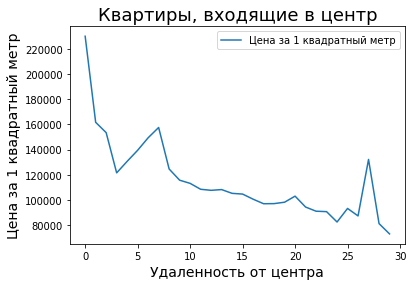

In [257]:
# создание столбца с расстоянием до центра в км
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).round()
df.head()
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
df.head()
# график по Санкт-Петербургу
df_spb = df.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'one_meter_price', aggfunc = ['count', 'mean'])
df_spb.plot(y = 'mean')
plt.title('Квартиры, входящие в центр', fontsize=18)
plt.xlabel('Удаленность от центра', fontsize=14)
plt.ylabel('Цена за 1 квадратный метр', fontsize=14)
plt.legend(['Цена за 1 квадратный метр']);
df_spb

В центр входит область первых трёх километров.

### Анализ сегмента квартир в центре

In [196]:
#выделим квартиры в центре (радиус 3 км)
spb = df.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,liv_kit_sum,one_meter_price,day_of_week,month,year,floor_id,total_liv_area,total_kit_area,cityCenters_nearest_km
24,8,6500000,97.2,2015-10-31,2,2.80,3,46.5,1,NaN,...,265,True,66872,5,10,2015,первый,0.478395,0.201646,2
99,32,9600000,90.0,2017-09-26,4,2.55,5,67.0,2,NaN,...,104,True,106666,1,9,2017,другой,0.744444,0.088889,3
138,8,4800000,40.0,2017-11-18,2,2.80,3,29.0,2,NaN,...,80,True,120000,5,11,2017,другой,0.725000,0.150000,3
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,NaN,...,38,True,102500,1,11,2018,другой,0.552500,0.152500,3
155,8,96000000,317.0,2017-07-07,4,3.50,3,183.0,3,NaN,...,62,True,302839,4,7,2017,последний,0.577287,0.157729,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23430,18,5260000,38.0,2018-11-06,1,3.30,5,16.0,1,NaN,...,12,True,138421,1,11,2018,первый,0.421053,0.315789,3
23449,4,6300000,52.6,2015-05-28,3,3.25,5,29.8,2,NaN,...,505,True,119771,3,5,2015,другой,0.566540,0.165399,3
23555,5,15350000,158.5,2019-03-07,7,2.95,7,57.4,7,NaN,...,0,True,96845,3,3,2019,последний,0.362145,0.078233,3
23602,0,8700000,73.0,2019-01-23,3,2.65,4,45.0,4,NaN,...,34,True,119178,2,1,2019,последний,0.616438,0.123288,2


#### Изучаем параметры: площадь, цена, число комнат, высота потолков

##### Площадь квартир

In [197]:
# Площадь квартир центра Санкт-Петербурга
spb['total_area'].describe()

count    832.000000
mean      98.537103
std       55.865035
min       13.000000
25%       63.925000
50%       85.000000
75%      116.525000
max      517.000000
Name: total_area, dtype: float64

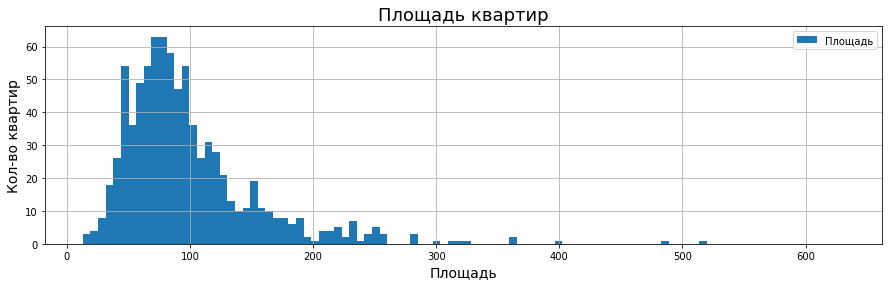

In [258]:
# гистограмма
spb.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (13,631))
plt.title('Площадь квартир', fontsize=18)
plt.xlabel('Площадь', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)
plt.legend(['Площадь']);


Минимальная площадь квартиры в центре - 13 кв.м., максимальная - 517 кв.м. Средняя площадь - 98.5 кв.м., медианная 85 кв.м. В основном продаются квартиры в диапазоне от 63.9 кв.м. до 116 кв.м. Если сравнивать данные центра со всем срезом, то можно отметить, что в общем срезе диапазон основных продаж другой с 40 до 70 кв.м. Медианная и средняя площадь тоже другие, меньше.


##### Цена недвижимости

In [199]:
# Цена квартир центра Санкт-Петербурга
spb['last_price'].describe()

count    8.320000e+02
mean     1.516814e+07
std      1.815302e+07
min      2.100000e+06
25%      7.300000e+06
50%      9.900000e+06
75%      1.496000e+07
max      1.600000e+08
Name: last_price, dtype: float64

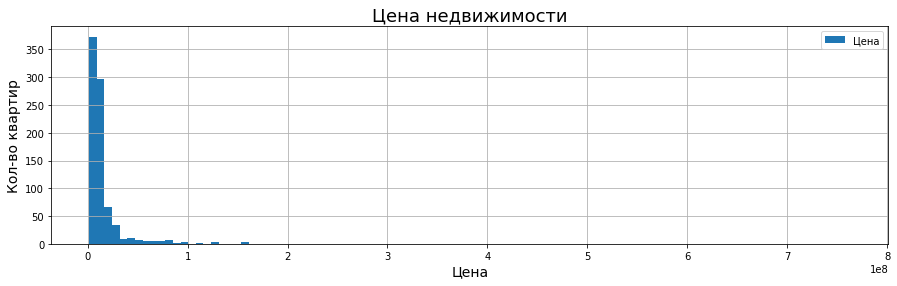

In [259]:
# гистограмма
spb.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (1600000,763000000))
plt.title('Цена недвижимости', fontsize=18)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)
plt.legend(['Цена']);


Средняя стоимость жилья чуть больше 15 млн, тогда как в общем срезе она 6.5 млн. Медианная стоимость - 9.9 млн, в общем срезе она опять же меньше - 4.7 млн. Основная стоимость квартир от 7.3 млн до 14.9 млн., т.е. почти в два раза выше стоимости квартир общего среза. Минимальная стоимость жилья в центре - 2.1 млн, максимальная - 160 млн.


##### Количество комнат

In [201]:
# Число комнат квартир центра Санкт-Петербурга
spb['rooms'].describe()

count    832.000000
mean       3.096154
std        1.398946
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        9.000000
Name: rooms, dtype: float64

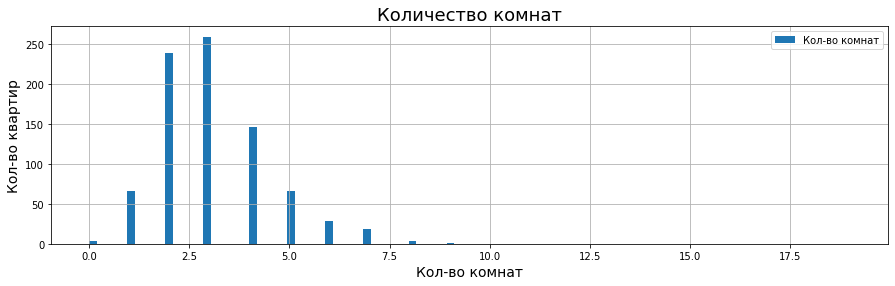

In [260]:
# гистограмма
spb.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (0,19))
plt.title('Количество комнат', fontsize=18)
plt.xlabel('Кол-во комнат', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)
plt.legend(['Кол-во комнат']);


В центре в основном продаются двухкомнатные и трехкомнатные квартиры (трехкомнатных квартир чуть больше), тогда как в общем срезе отмечено, что большинство продаж приходится на однокомнатные и двухкомнатные квартиры.  

##### Высота потолков

In [203]:
# Высота потолков квартир центра Санкт-Петербурга
spb['ceiling_height'].describe()

count    832.000000
mean       3.088149
std        0.390373
min        2.500000
25%        2.820000
50%        3.000000
75%        3.300000
max        5.800000
Name: ceiling_height, dtype: float64

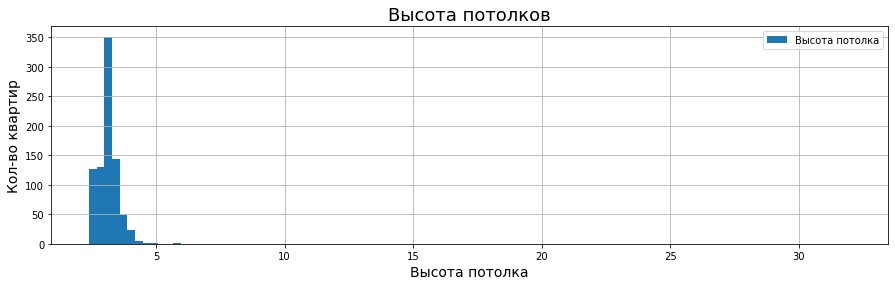

In [261]:
# гистограмма
spb.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (2.4,32))
plt.title('Высота потолков', fontsize=18)
plt.xlabel('Высота потолка', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)
plt.legend(['Высота потолка']);


Потолки в квартирах в центре выше. Если в общем срезе преобладали квартиры с потолками от 2.55 до 2.75 м., то в центре в основном в продаже квартиры с потолками от 2.82 до 3.30 м. 

  
##### Сроки продажи недвижимости

In [205]:
spb[spb['days_exposition'] != 0]['days_exposition'].describe()

count     675.000000
mean      235.042963
std       237.482811
min         3.000000
25%        63.500000
50%       143.000000
75%       346.000000
max      1089.000000
Name: days_exposition, dtype: float64

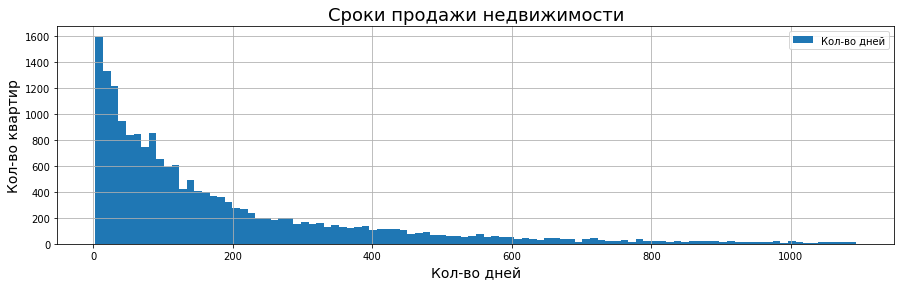

In [262]:
#гистограмма
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (15,4), range = (3,1094))
plt.title('Сроки продажи недвижимости', fontsize=18)
plt.xlabel('Кол-во дней', fontsize=14)
plt.ylabel('Кол-во квартир', fontsize=14)
plt.legend(['Кол-во дней']);


Средняя продолжительность продажи - 235 дней, т.е. больше, чем в общем срезе (182 дня). Минимальный срок объявления - 3 дня. Обычно продажа квартир в центре занимает больше времени - от 64 дней (два месяца) до 346 дней (почти год). В общем срезе продажи в основном были в диапазоне от 42 до 244 дней. 

#### Зависимость стоимости квартиры от квадратного метра, числа комнат, этажа и удалённости от центра  

##### Зависимость стоимости квартиры от квадратного метра

**Зависимость цены квадратного метра от площади**

0.17193217270140046

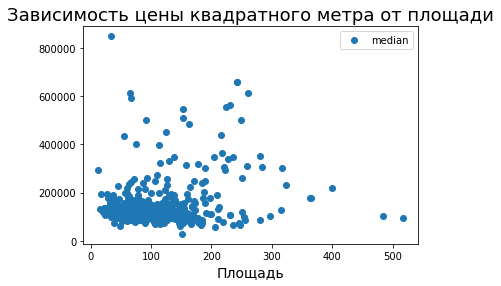

In [263]:
# сводная таблица
spb_total_area = spb.pivot_table(index = 'total_area', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_total_area.columns = ['mean', 'count', 'median']
spb_total_area
# график
spb_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квадратного метра от площади', fontsize=18)
plt.xlabel('Площадь', fontsize=14)
# сортировка
spb_total_area.sort_values('median', ascending = False)
# расчёт корреляции
spb['total_area'].corr(spb['one_meter_price'])

**Зависимость цены квартиры от площади**

0.656335633210051

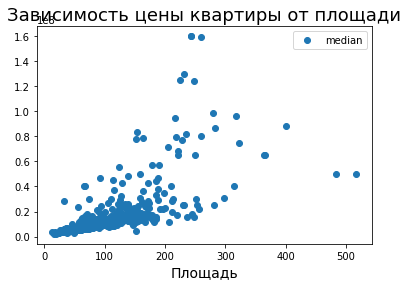

In [264]:
# сводная таблица
spb_total_area = spb.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_total_area.columns = ['mean', 'count', 'median']
spb_total_area
# график
spb_total_area.plot(y = 'median', style = 'o')
plt.title('Зависимость цены квартиры от площади', fontsize=18)
plt.xlabel('Площадь', fontsize=14)
# сортировка
spb_total_area.sort_values('median', ascending = False)
# расчёт корреляции
spb['total_area'].corr(spb['last_price'])


Стоимость квартир центра Санкт-Петербурга так же зависит от площади, как и стоимость квартир всего Санкт-Петербурга и других населённых пунктов области.  

  

##### Зависимость стоимости квартиры от количества комнат

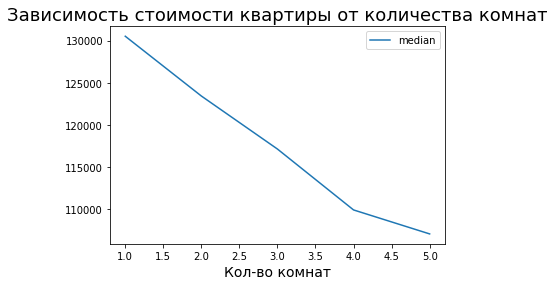

In [265]:
# сводная таблица
spb_rooms = spb.pivot_table(index = 'rooms', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_rooms.columns = ['mean', 'count', 'median']
spb_rooms
# сортировка
spb_rooms.sort_values('count', ascending = False)
# отбросим квартиры с 8 комнатами и выше (т.е. те квартиры, количество которых больше 50) 
spb_rooms.query('count >= 50')
spb_rooms.query('count >= 50').sort_values('median', ascending = False)
# график
spb_rooms.query('count >= 50').plot(y = 'median')
plt.title('Зависимость стоимости квартиры от количества комнат', fontsize=18)
plt.xlabel('Кол-во комнат', fontsize=14);

Зависимость стоимости квартиры от количества комнат для квартир центра другая, нежели для квартир всего среза. Здесь мы видим, что чем меньше комнат в квартире, тем выше стоимость. Т.е. самые дешевые квартиры имеют 6 комнат. Стоимость растёт, если комнат меньше 6 или больше 6.  

##### Зависимость стоимости квартиры от этажа

In [210]:
# сводная таблица
spb_floor_id = df.pivot_table(index = 'floor_id', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_floor_id.columns = ['mean', 'count', 'median']
spb_floor_id

,mean,count,median
floor_id,,,
другой,103936.901255,16092,98571
первый,82858.570893,2666,81948
последний,92516.487472,3073,88666


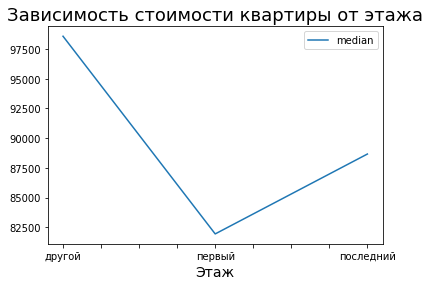

In [266]:
# график
spb_floor_id.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от этажа', fontsize=18)
plt.xlabel('Этаж', fontsize=14);

Здесь закономерность та же, что прослеживается в срезе всех квартир. Самые дешевые квартиры на первом этаже. Квартиры на последнем этаже дороже квартир на первом, но дешевле квартир, расположенных на других этажах.  

##### Зависимость стоимости квартиры от удалённости от центра

-0.1909384021037587

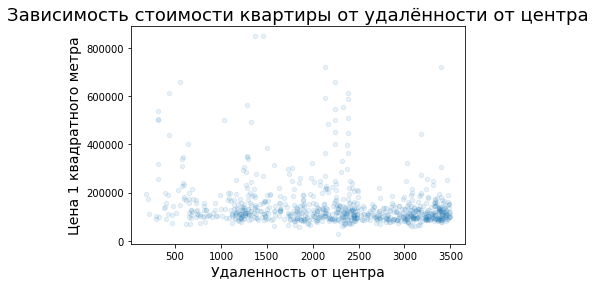

In [267]:
# сводная таблица
spb_city = spb.pivot_table(index = 'cityCenters_nearest', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_city.columns = ['mean', 'count', 'median']
spb_city
# график
spb.plot(kind = 'scatter', y = 'one_meter_price', x = 'cityCenters_nearest', alpha = 0.1)
plt.title('Зависимость стоимости квартиры от удалённости от центра', fontsize=18)
plt.xlabel('Удаленность от центра', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);
# расчёт корреляции
spb['cityCenters_nearest'].corr(spb['one_meter_price'])

Зависимость стоимости квартиры в центре Санкт-Петербурга от её удаленности от центра слабая, как и в случае квартир всего среза.

#### Зависимость стоимости квартиры от даты размещения  

##### Зависимость стоимости квартиры от дня недели

In [213]:
# сводная таблица
spb_day = spb.pivot_table(index = 'day_of_week', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_day.columns = ['mean', 'count', 'median']
spb_day
# сортировка
spb_day.sort_values('median', ascending = False)

,mean,count,median
day_of_week,,,
0,156009.572581,124,127016.5
4,140336.230769,156,122049.0
5,124966.320755,53,121136.0
2,132240.779412,136,115524.5
3,154943.830601,183,114503.0
1,144807.701613,124,110965.0
6,147098.589286,56,110366.5


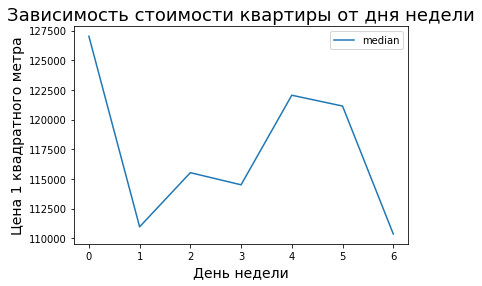

In [268]:
# график
spb_day.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от дня недели', fontsize=18)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);

Самая низкая стоимость указана в объявлениях, выставленных во вторник и в четверг, самая высокая - в субботу. В целом стоимость выставленных к выходным объявлений выше стоимости квартир, выставленных в будние дни. Это отличается от графика зависимости стоимости квартир от дня недели. Там цена квартир снижается к выходным, а не растёт.  

##### Зависимость стоимости от месяца

In [215]:
# сводная таблица
spb_month = spb.pivot_table(index = 'month', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_month.columns = ['mean', 'count', 'median']
spb_month
# сортировка
spb_month.sort_values('median', ascending = False)

,mean,count,median
month,,,
10,138947.121212,66,126872.0
4,166679.768293,82,123171.0
12,170509.476190,63,122340.0
3,135765.461538,78,120584.0
2,139581.504950,101,118556.0
1,146944.017857,56,118211.0
7,141051.125000,72,116720.0
6,139446.191489,47,116500.0
9,141747.589744,78,116438.0


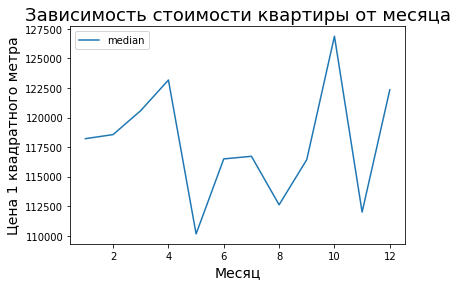

In [269]:
# график
spb_month.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от месяца', fontsize=18)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);

Зависимость от месяца выставления объявления тоже иная. Самые дешевые квартиры выставлены в июне и июле. К августу цены поднимаются и потом снижают до декабря. К январю цены повышаются, но падают к февралю. Затем к марту начинается рост. После марта стоимость к лету снижается. В целом ситуацию та же, однако роста в осенние месяцы нет, как было на графике для квартир всего среза.  
##### Зависимость стоимости от года

In [217]:
# сводная таблица
spb_year = spb.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb_year.columns = ['mean', 'count', 'median']
spb_year
# сортировка
spb_year.sort_values('median', ascending = False)

,mean,count,median
year,,,
2014,315913.250000,4,311970.0
2019,168797.287234,94,129610.0
2018,141709.403433,233,123529.0
2017,140222.496774,310,116486.0
2015,160397.634146,82,109134.5
2016,124986.495413,109,105853.0


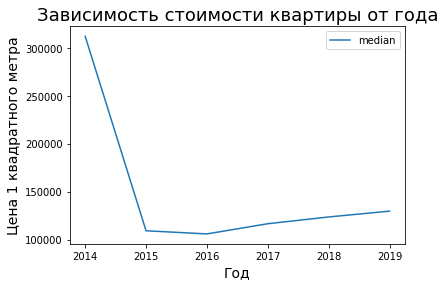

In [270]:
# график
spb_year.plot(y = 'median')
plt.title('Зависимость стоимости квартиры от года', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);

Стоимость недвижимости в центре Санкт-Петербурга падала с 2014 по 2015 года. С 2015 года по 2019 год наблюдается плавный рост стоимости жилья. Для квартир общего среза ситуация иная: снижение цен до 2016 года и рост после.

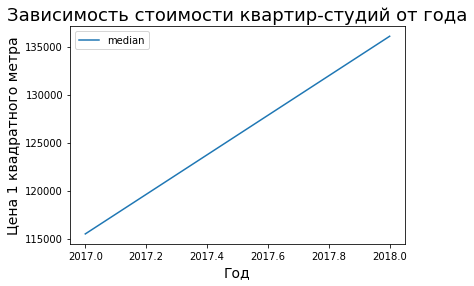

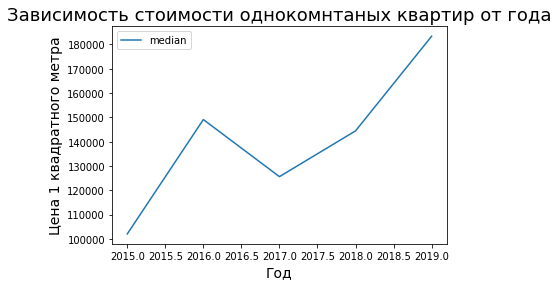

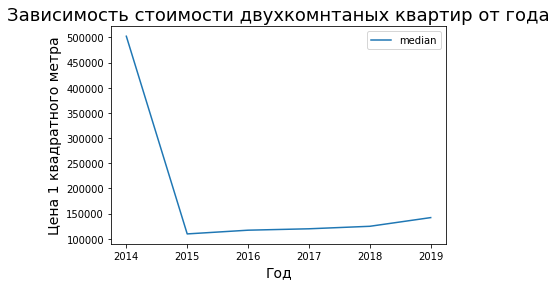

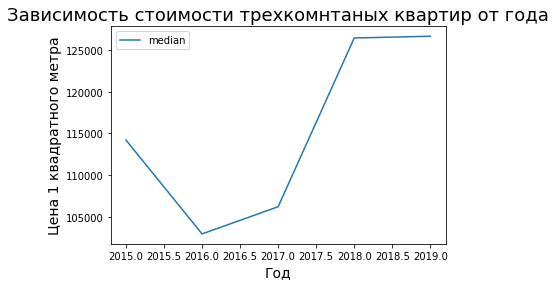

In [271]:
# сводная таблица для квартир-студий
spb0room = spb.query('rooms == 0 and studio == True')
spb0room = spb0room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb0room.columns = ['mean', 'count', 'median']
spb0room
# сортировка
spb0room.sort_values('median', ascending = False)

# сводная таблица для однокомнатных квартир
spb1room = spb.query('rooms == 1')
spb1room = spb1room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb1room.columns = ['mean', 'count', 'median']
spb1room
# сортировка
spb1room.sort_values('median', ascending = False)

# сводная таблица для двухкомнатных квартир
spb2room = spb.query('rooms == 2')
spb2room = spb2room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb2room.columns = ['mean', 'count', 'median']
spb2room
# сортировка
spb2room.sort_values('median', ascending = False)

# сводная таблица для трёхкомнатных квартир
spb3room = spb.query('rooms == 3')
spb3room = spb3room.pivot_table(index = 'year', values = 'one_meter_price', aggfunc = ['mean', 'count', 'median'])
spb3room.columns = ['mean', 'count', 'median']
spb3room
# сортировка
spb3room.sort_values('median', ascending = False)

# графики
spb0room.plot(y = 'median')
plt.title('Зависимость стоимости квартир-студий от года', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);
spb1room.plot(y = 'median')
plt.title('Зависимость стоимости однокомнтаных квартир от года', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);
spb2room.plot(y = 'median')
plt.title('Зависимость стоимости двухкомнтаных квартир от года', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);
spb3room.plot(y = 'median')
plt.title('Зависимость стоимости трехкомнтаных квартир от года', fontsize=18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена 1 квадратного метра', fontsize=14);

Если рассматривать измениения стоимости по годам квартир разного типа, то видим, что стоимость двухкомнатных и трехкомнатных квартир имеет такой же график, как в целом квартиры центра Санкт-Петербурга. Графики квартир-студий и однокомнатных отличаются. Стоимость квартир студий плавно снижается с 2014 по 2017, затем идет рост до 2018, после 2018 года цена опять начинает падать. Стоимость же однокомнатных квартир растет с 2014 по 2019 года.


### Вывод

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Стоимость квартир центра Санкт-Петербурга также слабо зависит от общей площади квартиры и удаленности от центра. Сильнее она зависит от количества комнат и этажа. Но зависимость стоимости от количества комнат прослеживается иная. Здесь мы видим, что чем меньше комнат в квартире, тем выше стоимость. Т.е. самые дешевые квартиры имеют 6 комнат. Стоимость растёт, если комнат меньше 6 или больше 6. Кроме того, есть зависимость от дня выставления объявления: стоимость квартир, выставленных к выходным, выше стоимости квартир, выставленных в будние дни. Зависимость стоимости от месяца прослеживается почти та же, что и для квартир всего среза. Траектория измения стоимости по годам иная.


## Общий вывод

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Итак, мы обработали полученные данные: заменили пропуски, где это было необходимо, избавились от дублируемых названий населенных пунктов, заменили типы данных, где это было нужно. Анализируя такие параметры, как площадь, цена, количество комнат, высота потолков, выявили аномальные и редкие значения и избавились от них. Кроме того, мы посчитали и добавили в таблицу цену квадратного метра, вывели день недели, месяц и год размещения каждого объявления, добавили категории по этажам квартир.

Проанализиров зависимость стоимости квартиры от площади, количества комнат, этажа удалённости от центра, пришли к выводу, что на цену жилья влияет его площадь, количество комнат и этаж. Кроме того, на стоимость квадратного метра влияет год размещения объявления. Причем анализируя размещение объявлений по годам с учетом типа квартиры, мы приходим к выводу, что квартиры-студии имеют другой график изменения цен по годам, нежели однокомнатные, двухкомнатные и трёхкомнатные квартиры.  

Далее мы выявили квартиры центра Санкт-Петербурга (радиус - 3 км) и сравнили их с недвижимостью всего датафрейма. Можем отметить, что квартиры в центре дороже, чем другая недвижимость. Так, их медианная стоимость - 9.9 млн (цена в основном находится в диапазоне от 7.3 млн до 14.9 млн), в то время как для жилья всей области характерны другие цифры: медианная стоимость - 4.7 млн. (диапазон цен в основном от 3.47 млн до 6.85 млн). Квартиры в центре больше по площади, их медианная площадь - 85 кв.м., когда как для общего среза квартир характерна медианная площадь - 52 кв.м. В центре в основном в продаже трехкомнатные квартиры, в общем срезе преобладают двухкомнатные квартиры. Кроме того, высота потолков в центре Санкт-Пеьербурга выше, медианное значение - 3 м. Для основного среза медианное значение - 2.65 м. Если говорить сроках продажи, то квартиры в центре Санкт-Петербурга продаются в целом дольше. Для квартир всей Ленинградской области характерно медианное значение - 107 дней продажи, для недвижимости в центре - 143 дня.

Кроме того, мы проанализировали, как влияют на стоимость жилья в центре Санкт-Петербурга площадь квартиры, этаж, количество комнат, удаленность от центра и дата размещения. Было выявлено, что для квартир Санкт-Петербурга прослеживается иная зависимость стоимости жилья от таких факторов, как количество комнат и дата размещения объявления. Таким образом, можно заключить, что если бы мы анализировали не весь срез, а разбили бы данные по всем населённым рунктам, то мы могли бы сделать другие выводы относительно того, как зависит стоимость жилья от указанных выше факторов.
